In [1]:
from utils import *
import pymongo

In [2]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["db"]
birds = mydb["electric_scooters"]

In [5]:
def get_birds_ids(birds):
    return list(birds.distinct("id"))

In [6]:
birds_ids = get_birds_ids(birds)
print(len(birds_ids))

7642


In [7]:
def get_distance_and_moves(bird_id, birds, time):
    if time == "any":
        bird_by_id = birds.find({"id": bird_id})
    else:
        #bird_by_id = birds.find({"id": bird_id},{"time": "/2019/"})
        bird_by_id = birds.find({"$and": [{"id": bird_id}, {"time":{"$regex": u"" + time +""}}]})
    bird_by_id = list(bird_by_id)
    
    #print(len(bird_by_id))
    total_distance = 0
    used = 0
    print("----------------------------------------------------------")
    print("ID: " + bird_id)
    for i in range(len(bird_by_id) - 1):
        previous = bird_by_id[i]
        actual = bird_by_id[i + 1]
        #print(calculate_distance(previous.get("location"), actual.get("location"))
        actual_distance = calculate_distance(previous.get("location"), actual.get("location"))
        if(actual_distance > 0.001 and (int(previous.get("battery_level")) > int(actual.get("battery_level")))):
            print(previous.get("time") + " " + previous.get("battery_level") + " " + actual.get("battery_level") +" " + str(actual_distance))
            used += 1
            total_distance += actual_distance
    return {"distance":total_distance, "used": used}

In [8]:
test_id = birds_ids[300]
get_distance_and_moves(test_id, birds, "2019")

----------------------------------------------------------
ID: bec01b21-283b-4313-909d-ac46b0e59dc3
2019-10-28 23:25:08 27 26 0.09666479730498245
2019-10-28 23:27:41 26 21 0.004787932682736436
2019-10-28 23:28:57 26 21 0.0066829777405319315


{'distance': 0.10813570772825082, 'used': 3}

In [9]:
all_time = "any"
days = ["2019-10-29", "2019-10-30", "2019-10-31", "2019-11-01", "2019-11-02", "2019-11-03", "2019-11-04"]

In [10]:
def get_total(bird_ids, birds, time):
    total_used = 0
    total_dist = 0
    interator = 0
    bird_ids_len = len(bird_ids)
    for bird_id in bird_ids:
        interator +=1
        dist_movs = get_distance_and_moves(bird_id, birds, time)
        print("ID number : " + str(interator) + " of " + str(bird_ids_len))
        total_used += dist_movs.get("used")
        total_dist += dist_movs.get("distance")
    return {"distance":total_dist, "used": total_used}

In [63]:
#Długi czsa wykonania
get_total(birds_ids, birds, all_time)

In [11]:
hours = [" 00:", " 01:", " 02:", " 03:", " 04:", " 05:", " 06:", " 07:", " 08:", " 09:" ," 10:", " 11:", " 12:",
        " 13:", " 14:", " 15:", " 16:", " 17:", " 18:", " 19:", " 20:", " 21:", " 22:", " 23:" ]

In [12]:
def ids_for_time(birds, time):
    if time == "any":
        return birds.distinct("id")
    else:
        return birds.find({"time":{"$regex": u"" + time +""}}).distinct("id")

In [13]:
len(ids_for_time(birds, " 03:"))

1851

In [14]:
result = list()
for day in days:
    print("Day: " + day)
    ids = ids_for_time(birds, day)
    print("Number of ids: " + str(len(ids)))
    result.append(get_total(ids, birds, day))

Day: 2019-10-29
Number of ids: 919
----------------------------------------------------------
ID: 8b6835c4-b0f4-4509-bc25-01d932f79082
2019-10-29 00:30:21 78 75 0.001210487287143155
2019-10-29 00:40:17 75 73 0.008256041758550959
ID number : 1 of 919
----------------------------------------------------------
ID: 9f40d804-6d65-4c59-9bba-44d9b1939c4d
ID number : 2 of 919
----------------------------------------------------------
ID: 911354b4-7b85-4b65-a7a0-5f7b86e5f79b
ID number : 3 of 919
----------------------------------------------------------
ID: 7d4eb88c-b7fa-4176-8325-9f0496112996
ID number : 4 of 919
----------------------------------------------------------
ID: 6d5a7ba3-525c-47fd-ae3b-849e04929ff3
ID number : 5 of 919
----------------------------------------------------------
ID: 54f6a734-bbc5-432d-a3d8-b89e99b7bc25
2019-10-29 00:40:17 31 27 0.007713316113465988
ID number : 6 of 919
----------------------------------------------------------
ID: 5a16786a-c9da-4c19-a7e1-1139308c1b9

----------------------------------------------------------
ID: 0f570251-cb60-4b79-9d86-44fcde1f183e
ID number : 42 of 919
----------------------------------------------------------
ID: 1d6064b0-874e-4447-9091-6e9935486163
2019-10-29 00:40:17 45 40 0.007144967796033937
ID number : 43 of 919
----------------------------------------------------------
ID: 81801be1-9fb7-442c-8cb7-a3a906d16034
ID number : 44 of 919
----------------------------------------------------------
ID: 0e56bd8f-c02a-4a90-89ac-ccabb100f785
2019-10-29 00:40:17 78 75 0.004817272390805281
2019-10-29 08:08:03 75 73 0.002308972993298497
2019-10-29 08:09:36 75 73 0.002308972993298497
2019-10-29 08:11:12 75 73 0.002308972993298497
ID number : 45 of 919
----------------------------------------------------------
ID: 7d7b7b12-429c-42b2-82ff-d1437072b3bf
2019-10-29 00:40:17 82 80 0.011128768015001577
2019-10-29 09:16:54 80 78 0.002450054800587024
2019-10-29 11:59:04 78 73 0.003649435151799856
2019-10-29 12:00:40 78 73 0.00272655

----------------------------------------------------------
ID: a501cf07-33ba-40b5-b836-1d084a0fcd53
2019-10-29 00:40:17 98 93 0.006321096502991002
ID number : 87 of 919
----------------------------------------------------------
ID: d90f9356-e192-4766-b748-ad3ec7ccdf9e
2019-10-29 00:40:17 76 74 0.012190906885231452
ID number : 88 of 919
----------------------------------------------------------
ID: 1107c204-d9a5-448f-8691-6f0112e6497d
ID number : 89 of 919
----------------------------------------------------------
ID: ef630d4f-e3b5-4a53-b452-df203495eae3
ID number : 90 of 919
----------------------------------------------------------
ID: a402934c-8ce1-4781-95c4-783cdd56b4a7
ID number : 91 of 919
----------------------------------------------------------
ID: 74ff0ec7-7429-4478-9716-c2133d6ac43a
ID number : 92 of 919
----------------------------------------------------------
ID: 2b795d08-de64-445e-a44d-27eab03ca33a
2019-10-29 08:08:03 74 72 0.002962227500417391
2019-10-29 08:09:36 74 72 0

----------------------------------------------------------
ID: 8aa1b1ef-f985-4182-ada2-a64f9b713cbc
ID number : 121 of 919
----------------------------------------------------------
ID: b607d81a-218f-46a7-942f-838fdf01ad98
2019-10-29 00:40:17 91 84 0.013362120360039299
2019-10-29 07:05:55 84 82 0.0018156276901443694
2019-10-29 07:07:31 84 82 0.0018156276901443694
2019-10-29 10:19:06 82 80 0.003081543989995524
2019-10-29 11:59:04 80 75 0.009014571017317423
2019-10-29 12:00:40 80 75 0.009014571017317423
2019-10-29 12:02:16 80 75 0.005975339622156029
2019-10-29 12:03:50 80 75 0.005975339622156029
ID number : 122 of 919
----------------------------------------------------------
ID: c85ffde9-ee50-4634-82b0-c773ab3b98f8
ID number : 123 of 919
----------------------------------------------------------
ID: 6fa956c6-34c8-4bde-8420-fb16e0483ab2
2019-10-29 00:40:17 98 93 0.0046096321635467
ID number : 124 of 919
----------------------------------------------------------
ID: 45d58fd3-866a-4d56-af6

----------------------------------------------------------
ID: 1aa3b6e9-eaa7-4a7e-92a7-659c0a73a92b
2019-10-29 00:40:17 93 89 0.0016111616704219689
ID number : 153 of 919
----------------------------------------------------------
ID: df7d76b0-a65a-43b9-a2e8-8b7fb9f84601
ID number : 154 of 919
----------------------------------------------------------
ID: 2a85e9e8-abf0-4219-82bd-9b5f67ba6278
ID number : 155 of 919
----------------------------------------------------------
ID: 69e4d03f-dfcc-4507-ba94-2aa16afed64e
2019-10-29 07:56:32 89 87 0.0035276707217673864
2019-10-29 07:42:12 89 87 0.008672950458121656
2019-10-29 07:53:20 89 87 0.0035276707217673864
2019-10-29 10:07:59 87 84 0.0021988354124874276
2019-10-29 11:59:04 84 78 0.004659113626581369
2019-10-29 12:00:40 84 78 0.0025357888754153047
2019-10-29 12:02:16 84 78 0.0025357888754153047
2019-10-29 12:03:50 84 78 0.0025357888754153047
ID number : 156 of 919
----------------------------------------------------------
ID: a6576a12-9d6d-4

----------------------------------------------------------
ID: 25a817e4-305b-4721-bcb0-b3fad5b512ab
2019-10-29 00:40:17 55 53 0.0026719814186479014
ID number : 196 of 919
----------------------------------------------------------
ID: 7aed8335-d9ad-4ff9-b766-8672a273bbea
2019-10-29 00:40:17 34 31 0.0046086953863811566
ID number : 197 of 919
----------------------------------------------------------
ID: bf33168f-c6b4-4bb4-958f-3affc6e3d991
ID number : 198 of 919
----------------------------------------------------------
ID: 74994f24-1101-44b5-b9ef-fcac16de093b
2019-10-29 00:40:17 38 36 0.010860211186542786
ID number : 199 of 919
----------------------------------------------------------
ID: eccba5fa-c6a7-4a23-abfd-fe43047f5711
ID number : 200 of 919
----------------------------------------------------------
ID: dc419a2f-ba0e-4813-9f55-e34ba33eea7a
ID number : 201 of 919
----------------------------------------------------------
ID: 7d359d3f-8b4a-4f9b-805a-4cbb709a600c
ID number : 202 of 

----------------------------------------------------------
ID: cfa31a3a-9814-4d97-a249-26b6630a920d
2019-10-29 08:31:54 82 81 0.4081829951487084
ID number : 245 of 919
----------------------------------------------------------
ID: 073d37f8-0c00-443f-a082-f57b75acbdea
ID number : 246 of 919
----------------------------------------------------------
ID: 973419f2-9bc2-4df0-a7f5-bb9209a9ead7
ID number : 247 of 919
----------------------------------------------------------
ID: 6837f625-1078-472d-9815-4e248e3d5074
ID number : 248 of 919
----------------------------------------------------------
ID: 62d0e6eb-5e70-495e-8783-03ccdbbac3ad
ID number : 249 of 919
----------------------------------------------------------
ID: 50570b7e-e2bb-4561-8cc5-52cf6660534f
ID number : 250 of 919
----------------------------------------------------------
ID: c14896c4-55c4-488f-b71d-ed8b47586589
ID number : 251 of 919
----------------------------------------------------------
ID: 8f3aa189-a9ca-4b17-ad8d-f0ba043

----------------------------------------------------------
ID: 959f5906-1909-40eb-bbed-b77e31fc8d77
ID number : 286 of 919
----------------------------------------------------------
ID: ae014786-5433-4303-a5e2-7b6b74d127ad
ID number : 287 of 919
----------------------------------------------------------
ID: 85a7dd7a-183e-46c4-82cf-3713b3fde46c
ID number : 288 of 919
----------------------------------------------------------
ID: e2f0d02b-0997-41b4-8c13-ce2608506092
2019-10-29 07:35:50 34 29 0.012177791170172621
ID number : 289 of 919
----------------------------------------------------------
ID: 5fa6989a-cbd6-4c25-818a-a80186827995
2019-10-29 11:59:04 93 91 0.006614492998945021
2019-10-29 12:00:40 93 91 0.006443730028741253
2019-10-29 12:02:16 93 91 0.006443730028741253
2019-10-29 12:03:50 93 91 0.00622444684578949
2019-10-29 20:03:32 91 89 0.001042644788015389
ID number : 290 of 919
----------------------------------------------------------
ID: 3263ffd9-1690-40f4-8702-9a434a8ec7d2
2019

----------------------------------------------------------
ID: c3a99135-0862-445b-8e8e-b200bcf9920e
2019-10-29 07:46:57 88 81 0.0035397319022940172
2019-10-29 07:48:34 88 81 0.0031252064062414118
ID number : 322 of 919
----------------------------------------------------------
ID: 73072cf7-accc-460c-a3b7-ce41055a1e91
ID number : 323 of 919
----------------------------------------------------------
ID: da1fdfd8-335c-4502-b882-d19a1058ef1c
ID number : 324 of 919
----------------------------------------------------------
ID: 07e8b2e3-7ae5-4831-8822-89eb9dce151a
ID number : 325 of 919
----------------------------------------------------------
ID: e2d71d9d-8d3d-4cd3-98d4-b75c722c71da
ID number : 326 of 919
----------------------------------------------------------
ID: 51ac906e-0a00-40c7-afa7-494d1773d72c
ID number : 327 of 919
----------------------------------------------------------
ID: db3a6361-52eb-40bc-aaa0-550b2f3f5262
2019-10-29 07:48:34 76 71 0.38938906380326876
ID number : 328 of 9

----------------------------------------------------------
ID: b5106bdf-1352-4c60-baa2-c6bf38a4033c
ID number : 368 of 919
----------------------------------------------------------
ID: dee904b1-c1de-4c2d-ad21-fca0152703e0
ID number : 369 of 919
----------------------------------------------------------
ID: de8ce6d3-c578-4e40-a067-26343769343d
ID number : 370 of 919
----------------------------------------------------------
ID: 92ea029b-8838-4e89-8b57-d1d79c6b18de
ID number : 371 of 919
----------------------------------------------------------
ID: 131f5782-97bc-4e27-9ea1-a7b38306dfe8
2019-10-29 11:59:04 100 96 0.003584951396961632
2019-10-29 12:00:40 100 96 0.003584951396961632
2019-10-29 12:02:16 100 96 0.003584951396961632
2019-10-29 12:03:50 100 96 0.003404401321543061
2019-10-29 21:46:51 96 93 0.0013228856772623855
ID number : 372 of 919
----------------------------------------------------------
ID: 1b86f2e1-dccb-4bbc-b982-b279114af25b
ID number : 373 of 919
----------------------

----------------------------------------------------------
ID: c8fe487b-11f5-40a3-bb9d-17e91018dce5
2019-10-29 09:28:10 79 78 0.16568708106590563
ID number : 416 of 919
----------------------------------------------------------
ID: b28d3c87-3bdc-4563-8ef2-7f79a8ee3c13
2019-10-29 09:36:10 31 29 0.0109579471701245
ID number : 417 of 919
----------------------------------------------------------
ID: 98be1b36-6085-4aab-9fc9-196e8ff80033
2019-10-29 09:32:57 28 25 0.08204784851365152
ID number : 418 of 919
----------------------------------------------------------
ID: 545a592b-b220-461f-a44e-e2a1e716fb62
2019-10-29 09:42:34 62 60 0.0038948837709206897
ID number : 419 of 919
----------------------------------------------------------
ID: 1d55c959-b769-40d6-bcc5-e79ffd9ab84d
ID number : 420 of 919
----------------------------------------------------------
ID: 696929d5-9dbf-478f-95ed-1bf83f96d5b9
2019-10-29 09:58:32 22 20 0.0014791616473376309
ID number : 421 of 919
-----------------------------

----------------------------------------------------------
ID: 97407a9f-f11c-4c67-915a-b78ba09fe508
ID number : 466 of 919
----------------------------------------------------------
ID: f4a0b284-df6d-415e-a70d-74763b6b814c
2019-10-29 11:59:04 93 91 0.006983697775856229
2019-10-29 12:00:40 93 91 0.006576734022245221
2019-10-29 12:02:16 93 91 0.006576734022245221
2019-10-29 12:03:50 93 91 0.006576734022245221
2019-10-29 20:18:57 91 89 0.0011934609900615615
ID number : 467 of 919
----------------------------------------------------------
ID: 4d1e1790-a6a7-490f-9661-c0316e1c6ac1
2019-10-29 11:59:04 96 91 0.008554144871690513
2019-10-29 12:00:40 96 91 0.008554144871690513
2019-10-29 12:02:16 96 91 0.00712889616471982
2019-10-29 12:03:50 96 91 0.007808706522098989
2019-10-29 20:48:18 91 89 0.005209094141480224
2019-10-29 20:49:34 91 89 0.005209094141480224
2019-10-29 23:13:18 89 87 0.002482766428151578
2019-10-29 23:14:34 89 87 0.0013461723238758789
ID number : 468 of 919
-------------------

----------------------------------------------------------
ID: 02138109-add9-4933-b2ae-2f4be6165e7f
ID number : 520 of 919
----------------------------------------------------------
ID: f57e1566-657b-4687-9f19-84f651d2b14f
2019-10-29 11:10:42 78 71 0.0052839114958867246
ID number : 521 of 919
----------------------------------------------------------
ID: e375a810-93b0-4ab2-a827-260962d9f7a2
2019-10-29 11:12:16 97 94 0.004046330247229466
ID number : 522 of 919
----------------------------------------------------------
ID: 76aea501-5238-4c7a-81cf-915cf00adf9a
ID number : 523 of 919
----------------------------------------------------------
ID: d625431b-e694-44f9-8b75-5fb19ca5f338
ID number : 524 of 919
----------------------------------------------------------
ID: ad318128-1d86-4aef-8055-ca525b94b5a6
2019-10-29 11:07:03 75 73 0.01827360727145938
ID number : 525 of 919
----------------------------------------------------------
ID: e26e14ac-fa98-4ab0-be9b-9194d49ffddd
ID number : 526 of 91

----------------------------------------------------------
ID: c36608c8-af2a-43b6-9f40-097ac77aaa3b
ID number : 573 of 919
----------------------------------------------------------
ID: a239c9af-dc19-4c35-a970-7ac660a3602a
ID number : 574 of 919
----------------------------------------------------------
ID: 292f2f85-1004-4a80-a672-38f0a6ee1a25
ID number : 575 of 919
----------------------------------------------------------
ID: 3696d8bf-1d48-4eb5-9c14-7675a2646618
2019-10-29 11:59:04 100 98 0.004926437726930923
2019-10-29 12:00:40 100 98 0.004926437726930923
2019-10-29 12:02:16 100 98 0.002582912736183984
2019-10-29 12:03:50 100 98 0.002582912736183984
ID number : 576 of 919
----------------------------------------------------------
ID: 5f404fd9-5e7c-4b73-b4e2-0ef966465794
ID number : 577 of 919
----------------------------------------------------------
ID: d25efa13-458c-416a-bc8b-48802abe6bdd
ID number : 578 of 919
----------------------------------------------------------
ID: b58ece0

----------------------------------------------------------
ID: 923b9030-0b28-42f5-8f43-371d0a0648a0
ID number : 628 of 919
----------------------------------------------------------
ID: f85c435b-d9c0-4ec2-91e6-667520a843ce
ID number : 629 of 919
----------------------------------------------------------
ID: eb58f574-b690-4c95-ab4b-81062358db34
2019-10-29 19:19:13 76 74 0.001845997128604528
ID number : 630 of 919
----------------------------------------------------------
ID: d1275f2c-bcc8-40c5-8e59-cbb6797c16cc
ID number : 631 of 919
----------------------------------------------------------
ID: 16d446da-4861-4c78-a376-e2cc7809859e
2019-10-29 21:38:00 79 76 0.009519210659849241
ID number : 632 of 919
----------------------------------------------------------
ID: 74f5bf26-53bc-4574-8136-c7ff5f049213
ID number : 633 of 919
----------------------------------------------------------
ID: 4888eef5-6097-43cf-a3a6-549e10f74956
ID number : 634 of 919
---------------------------------------------

----------------------------------------------------------
ID: 6338bd1a-17ba-4a80-85da-b7e95c526878
ID number : 686 of 919
----------------------------------------------------------
ID: 86d286b2-4c3f-41bc-9f25-5de22b0f3ac2
ID number : 687 of 919
----------------------------------------------------------
ID: 7b64ec78-04e3-4762-954d-33bdbf479774
ID number : 688 of 919
----------------------------------------------------------
ID: 5787b8eb-5fbb-4466-b751-2606ca42dc4a
2019-10-29 20:35:32 26 24 0.003776208985208047
ID number : 689 of 919
----------------------------------------------------------
ID: 59f0fd63-b3e2-4582-8586-7331d26e7ca2
ID number : 690 of 919
----------------------------------------------------------
ID: 4356d80c-e115-4c3e-aa09-5cce959138a5
2019-10-29 20:35:32 71 69 0.003700384366249501
ID number : 691 of 919
----------------------------------------------------------
ID: 2de871df-c327-4672-a69f-750a17d69c08
ID number : 692 of 919
---------------------------------------------

----------------------------------------------------------
ID: 6a46384f-f746-4417-b9dd-9d7f3f44b316
ID number : 752 of 919
----------------------------------------------------------
ID: f3877239-9c7e-4916-9707-78040b4cd48e
ID number : 753 of 919
----------------------------------------------------------
ID: e93c62d9-00eb-403e-91af-435b2e93bc87
ID number : 754 of 919
----------------------------------------------------------
ID: 04f3c4b6-d485-4a35-8da4-80ba8af35e5b
ID number : 755 of 919
----------------------------------------------------------
ID: 607eeb14-c8a3-46bf-8452-55e732fc0c12
ID number : 756 of 919
----------------------------------------------------------
ID: bdacea76-8779-4e98-b5fb-2047fa034c66
ID number : 757 of 919
----------------------------------------------------------
ID: 15cae3ad-f044-4da6-ab87-8ab62a622c91
ID number : 758 of 919
----------------------------------------------------------
ID: 929b3657-62ae-4ce9-850e-390d140a9836
ID number : 759 of 919
----------------

----------------------------------------------------------
ID: 5f500b6b-7baa-45d6-82f9-8b7116446e1b
2019-10-29 20:16:25 60 57 0.006368567343754452
ID number : 809 of 919
----------------------------------------------------------
ID: b3865fdb-2633-412e-a1e1-f2bda3163161
2019-10-29 20:20:12 57 53 0.008422708519645024
ID number : 810 of 919
----------------------------------------------------------
ID: 463d42db-9797-43a7-8dc1-4edf83d99ad9
2019-10-29 20:17:40 47 46 0.04521939833463186
ID number : 811 of 919
----------------------------------------------------------
ID: 412661a6-8b18-4361-a78a-87d817bc5129
ID number : 812 of 919
----------------------------------------------------------
ID: cf0ac103-f7ff-471b-9a9e-9ddc2c60171b
ID number : 813 of 919
----------------------------------------------------------
ID: 2b6697aa-7695-48eb-909f-c65ee1cc71a7
2019-10-29 20:22:44 43 39 0.21976484350867098
2019-10-29 20:24:01 42 39 0.0028374737194097307
2019-10-29 20:25:21 42 39 0.0028374737194097307
ID 

----------------------------------------------------------
ID: 91bb0c10-2d58-4c6b-9acd-2cb0527f306a
ID number : 861 of 919
----------------------------------------------------------
ID: 5fc40152-28a9-473a-82ad-f84fb4f39a2d
2019-10-29 21:35:28 18 17 0.21708509468769002
2019-10-29 21:39:17 17 12 0.002769191807679879
ID number : 862 of 919
----------------------------------------------------------
ID: c33cc72b-fb7c-48c5-b1bf-f9cb70f2f13a
2019-10-29 21:39:17 53 47 0.20437567720456082
ID number : 863 of 919
----------------------------------------------------------
ID: f4a9f03a-cd38-4441-b266-65f9939022bf
2019-10-29 21:38:00 39 38 0.1636262508348902
2019-10-29 21:41:47 38 36 0.0015461572350277352
ID number : 864 of 919
----------------------------------------------------------
ID: 45f7d85b-e9d6-4ee4-83e8-a30577a284ee
2019-10-29 21:41:47 62 60 0.004397342920005741
ID number : 865 of 919
----------------------------------------------------------
ID: 589fc62e-0a5f-4740-8cab-291a195a1d0d
ID num

----------------------------------------------------------
ID: c05c3890-e5ea-4a6d-9ea8-bbfdb618a756
ID number : 914 of 919
----------------------------------------------------------
ID: c0ebf576-c388-4cc3-a8a3-14a3de8f8561
2019-10-29 23:52:29 20 16 0.009153975145387393
2019-10-29 23:53:45 20 16 0.008377345875264324
ID number : 915 of 919
----------------------------------------------------------
ID: acf63f8a-d144-4899-a031-2a57144c7f4f
2019-10-29 23:53:45 29 25 0.024952558419410156
ID number : 916 of 919
----------------------------------------------------------
ID: 3b584247-8fc7-47fa-bb5b-b3181dc9f8f1
2019-10-29 23:56:18 44 42 0.10522905019779845
ID number : 917 of 919
----------------------------------------------------------
ID: 94250a9f-6558-4d35-9a91-4551cb6bbc26
2019-10-29 23:57:34 19 17 0.04781195576307638
ID number : 918 of 919
----------------------------------------------------------
ID: 1b3e8522-ce95-4e92-8f79-2bc14dfcfe2f
ID number : 919 of 919
Day: 2019-10-30
Number of ids

----------------------------------------------------------
ID: 9b5461f9-872b-4b72-8fe0-af8b39a33b98
2019-10-30 05:29:39 43 40 0.0012976850397103232
ID number : 41 of 1409
----------------------------------------------------------
ID: a2a4ef51-f46f-458d-91e6-10b24856e9a7
2019-10-30 15:32:05 89 87 0.002625819833426381
ID number : 42 of 1409
----------------------------------------------------------
ID: bb4cc3bf-3a08-48e5-9564-14653ca1ef80
ID number : 43 of 1409
----------------------------------------------------------
ID: 7ef0b563-8c64-4e9f-9ebf-1f531af73350
2019-10-30 04:44:06 96 93 0.0030513626727448027
ID number : 44 of 1409
----------------------------------------------------------
ID: 731e1ae3-9611-4f1d-86d5-97d1cbe92dbf
ID number : 45 of 1409
----------------------------------------------------------
ID: a5964b43-7d3e-4c96-9e77-bbeff7e00cd4
ID number : 46 of 1409
----------------------------------------------------------
ID: 486f6712-ad6c-4c09-a42e-2cd01a6c5ada
2019-10-30 17:57:21

----------------------------------------------------------
ID: 933edec0-cd35-4946-aeca-996ee22207b3
2019-10-30 01:34:55 89 87 0.0021156916288538378
ID number : 83 of 1409
----------------------------------------------------------
ID: e375a810-93b0-4ab2-a827-260962d9f7a2
2019-10-30 01:56:14 92 90 0.0013642585582724484
2019-10-30 13:00:43 83 81 0.0014659266221951459
2019-10-30 16:32:18 81 79 0.0010741990228578632
2019-10-30 20:01:56 79 76 0.006306562450316663
ID number : 84 of 1409
----------------------------------------------------------
ID: 38079017-65d9-4ed8-aec5-6b901265ad1f
2019-10-30 12:26:06 81 79 0.0010036649203263967
ID number : 85 of 1409
----------------------------------------------------------
ID: 42d36365-7c84-46d2-b81c-ebe07cc9cdf3
2019-10-30 06:45:19 84 82 0.0035277295280108493
ID number : 86 of 1409
----------------------------------------------------------
ID: 6f812218-68b2-492b-a8dc-aac346543bc9
2019-10-30 07:02:58 82 80 0.002626116698128861
ID number : 87 of 1409
---

----------------------------------------------------------
ID: b67f18a6-bbc8-4adc-a1e2-f8342e35f640
2019-10-30 01:39:54 75 73 0.0035439360178201517
2019-10-30 01:41:09 75 73 0.0035439360178201517
2019-10-30 01:42:23 75 73 0.0022752551598403063
2019-10-30 01:46:12 75 73 0.0022752551598403063
2019-10-30 06:15:06 73 71 0.0010036603613997135
ID number : 116 of 1409
----------------------------------------------------------
ID: 6ddc9316-b714-41b0-9cbb-54d9cecda70d
2019-10-30 00:50:44 72 70 0.005641587776578553
ID number : 117 of 1409
----------------------------------------------------------
ID: 7b690a81-a64e-4935-bd78-838957bf1fb0
2019-10-30 05:13:06 43 40 0.002042709887295585
ID number : 118 of 1409
----------------------------------------------------------
ID: 22a0d67a-1df2-4eb8-b5fa-3847f28f2d55
2019-10-30 14:17:49 66 64 0.016761728976652773
ID number : 119 of 1409
----------------------------------------------------------
ID: 6f65b564-e248-4173-b6e9-e1e045ea5c29
2019-10-30 03:44:53 85 

----------------------------------------------------------
ID: c33cc72b-fb7c-48c5-b1bf-f9cb70f2f13a
ID number : 162 of 1409
----------------------------------------------------------
ID: 6bc29064-9b6a-4edb-b784-ac586159a3cd
ID number : 163 of 1409
----------------------------------------------------------
ID: 59e47e41-4145-467d-ae19-6cb257627b64
ID number : 164 of 1409
----------------------------------------------------------
ID: 94c2dde3-edce-4c2d-9309-03efcf9b59aa
ID number : 165 of 1409
----------------------------------------------------------
ID: 45a1e777-5713-46a2-b92c-15947258c3bf
ID number : 166 of 1409
----------------------------------------------------------
ID: 5cb89415-c054-48be-a29d-4ec2cba56493
2019-10-30 10:38:53 37 35 0.002115787416574575
ID number : 167 of 1409
----------------------------------------------------------
ID: 82b411bb-4a1a-4c08-beb3-52232910491c
2019-10-30 04:12:36 88 87 0.0016846535052277532
2019-10-30 04:13:52 88 87 0.0016846535052277532
2019-10-30 04

----------------------------------------------------------
ID: 94250a9f-6558-4d35-9a91-4551cb6bbc26
ID number : 215 of 1409
----------------------------------------------------------
ID: c05c3890-e5ea-4a6d-9ea8-bbfdb618a756
2019-10-30 14:06:06 58 56 0.0033369089753579125
ID number : 216 of 1409
----------------------------------------------------------
ID: 98c91b14-8962-4642-852a-fcae32e63d38
ID number : 217 of 1409
----------------------------------------------------------
ID: 82ae147c-cb3b-448d-ba44-7ea8c2072fbe
2019-10-30 07:01:43 72 70 0.00783688558136602
ID number : 218 of 1409
----------------------------------------------------------
ID: e38260c7-5ce2-449b-8df0-8e0e25c50102
ID number : 219 of 1409
----------------------------------------------------------
ID: 3788ba50-14db-4c26-9cc4-3f91e42f3623
2019-10-30 02:43:11 47 45 0.0026328897342309514
2019-10-30 07:57:27 43 40 0.003308730875777569
2019-10-30 07:58:42 43 40 0.001610955274623639
2019-10-30 08:01:15 43 40 0.0016109552746236

----------------------------------------------------------
ID: 2f498195-4715-47ce-8fb5-f2aba40ab26e
ID number : 261 of 1409
----------------------------------------------------------
ID: e060a92a-5497-4f4b-b9ae-bc4c526ff23c
2019-10-30 00:24:09 29 25 0.015203986001773459
2019-10-30 00:20:21 30 25 0.09443934124562905
ID number : 262 of 1409
----------------------------------------------------------
ID: 0be70924-0041-4735-a2b3-41ed9f55819d
2019-10-30 00:36:50 31 29 0.48636947209013226
2019-10-30 00:40:39 29 25 0.0051402285538545475
ID number : 263 of 1409
----------------------------------------------------------
ID: bbf33203-784f-4dba-9f07-c60f8469c048
2019-10-30 01:26:06 53 51 0.11742963789995857
ID number : 264 of 1409
----------------------------------------------------------
ID: a6841ddf-baaf-4096-8a46-d0ec72636a96
2019-10-30 05:31:01 40 38 0.005739146905055145
ID number : 265 of 1409
----------------------------------------------------------
ID: 84029f2c-dc09-47d9-9575-85212642fd57


----------------------------------------------------------
ID: f1741882-a293-4b69-9f97-3740c326a73e
2019-10-30 06:37:45 56 52 0.004448764047934528
ID number : 308 of 1409
----------------------------------------------------------
ID: 5a335853-8a14-4bd2-a378-b81217528484
ID number : 309 of 1409
----------------------------------------------------------
ID: 7e0a25b9-3893-4a58-a375-dd2b6eb74bbb
ID number : 310 of 1409
----------------------------------------------------------
ID: 3cc3b6ee-c085-4599-a72d-f1ffc99244f5
ID number : 311 of 1409
----------------------------------------------------------
ID: 258e77b9-4707-4fba-ab59-b0f13d3dffa2
ID number : 312 of 1409
----------------------------------------------------------
ID: d23c71ff-0f9c-415a-9920-4b72352f2011
ID number : 313 of 1409
----------------------------------------------------------
ID: a9f63fc0-60ed-4858-949d-b7c385defc7b
ID number : 314 of 1409
----------------------------------------------------------
ID: dee346a7-b058-4db1-8f7

----------------------------------------------------------
ID: 574ed241-4eb3-42a8-8201-f637b754c4c3
2019-10-30 06:57:53 45 44 0.23618496309039572
2019-10-30 06:59:10 44 42 0.0038827365715623304
2019-10-30 07:00:27 44 42 0.0038827365715623304
2019-10-30 07:01:43 44 42 0.0038827365715623304
ID number : 362 of 1409
----------------------------------------------------------
ID: e2fcc9f9-b616-4b4b-9821-f938948dc5f3
ID number : 363 of 1409
----------------------------------------------------------
ID: 3f60e2f4-80f7-4056-b824-fe196dd48835
ID number : 364 of 1409
----------------------------------------------------------
ID: 40dae4c0-fc5b-456e-b0e9-63e219688c6d
2019-10-30 23:22:22 63 61 0.0027939862101636565
ID number : 365 of 1409
----------------------------------------------------------
ID: f149b181-ac05-4903-ac8e-532f5b81f1f3
2019-10-30 08:24:04 98 96 0.020913725270314924
2019-10-30 16:05:35 93 91 0.0024099868732458136
2019-10-30 20:07:06 91 89 0.0011049744341377877
2019-10-30 20:04:31 91 

----------------------------------------------------------
ID: 8655447c-4ee4-41a8-918b-cf6ebb6619ae
2019-10-30 15:56:29 100 98 0.0013911705036139602
2019-10-30 15:59:03 100 98 0.0013911705036139602
2019-10-30 20:03:12 98 96 0.004162890192322476
2019-10-30 22:59:31 96 93 0.0015517360931522413
2019-10-30 23:00:46 96 93 0.0015517360931522413
ID number : 393 of 1409
----------------------------------------------------------
ID: 10357080-93cb-4843-b264-e0127218b5fa
ID number : 394 of 1409
----------------------------------------------------------
ID: 8f12d030-1cff-4174-ac3e-d3dcd524d685
ID number : 395 of 1409
----------------------------------------------------------
ID: 86d286b2-4c3f-41bc-9f25-5de22b0f3ac2
ID number : 396 of 1409
----------------------------------------------------------
ID: b7202309-3e20-42af-beb7-3a433e2d14d4
ID number : 397 of 1409
----------------------------------------------------------
ID: b18d6d35-d310-4dc3-808a-8c28f3d3985d
ID number : 398 of 1409
---------------

----------------------------------------------------------
ID: e8637761-a37f-407a-8630-b1ab740b8dc2
ID number : 441 of 1409
----------------------------------------------------------
ID: 0f1cd4aa-0e11-4d34-8b82-6513cbf33563
2019-10-30 15:50:02 94 92 0.002022656387280823
ID number : 442 of 1409
----------------------------------------------------------
ID: 7d359d3f-8b4a-4f9b-805a-4cbb709a600c
ID number : 443 of 1409
----------------------------------------------------------
ID: 8ad46d72-edea-42f5-92da-70bd97a5a92f
2019-10-30 20:12:17 93 91 0.0017354052811824634
ID number : 444 of 1409
----------------------------------------------------------
ID: e3db4426-c33d-40ad-9b17-2f9b424c3364
2019-10-30 12:50:24 96 93 0.004944502326349351
2019-10-30 17:49:32 93 91 0.0016110780454970447
ID number : 445 of 1409
----------------------------------------------------------
ID: 854f275c-db01-41fc-99f9-d73c4ba4420d
ID number : 446 of 1409
----------------------------------------------------------
ID: 8be

----------------------------------------------------------
ID: 265b85a4-9c92-421f-9cee-8b51939b8ee0
ID number : 482 of 1409
----------------------------------------------------------
ID: 9ce58dd7-6d30-4bf0-a124-ba11df740f59
2019-10-30 07:51:06 98 96 0.0028973717466106714
2019-10-30 07:52:21 98 96 0.0039301425370980095
2019-10-30 11:45:17 96 93 0.0017719645219485588
2019-10-30 11:40:07 96 93 0.0017719645219485588
2019-10-30 15:41:01 93 91 0.0014322273606575395
ID number : 483 of 1409
----------------------------------------------------------
ID: ec537f0b-9afb-42e2-856c-0469b8120f8f
2019-10-30 13:53:09 93 91 0.014237577154076262
2019-10-30 20:35:34 89 87 0.004344903484974497
2019-10-30 20:36:52 89 87 0.004344903484974497
ID number : 484 of 1409
----------------------------------------------------------
ID: 2f897e60-715a-4927-b5e5-b31fb85e2ade
ID number : 485 of 1409
----------------------------------------------------------
ID: c360b4bb-bcc4-41d2-a309-d6737e247d15
2019-10-30 19:50:19 93 

----------------------------------------------------------
ID: c481de6f-352b-43dd-b52f-7216857417d8
2019-10-30 14:15:15 97 96 0.0011023424528680454
ID number : 528 of 1409
----------------------------------------------------------
ID: 7e5a9af4-9964-4117-8e3b-01234ed7a554
ID number : 529 of 1409
----------------------------------------------------------
ID: 431e1286-1816-401d-bab4-5a6a9450e547
2019-10-30 09:03:28 96 93 0.00354385217735852
ID number : 530 of 1409
----------------------------------------------------------
ID: ab429f08-6baf-4e6a-a848-59de250e82a6
2019-10-30 21:50:12 55 53 0.0012103945500691144
ID number : 531 of 1409
----------------------------------------------------------
ID: aa7ae01b-6a0c-43fb-848c-affd0a4d5a99
2019-10-30 08:49:32 55 51 0.005593436006888441
ID number : 532 of 1409
----------------------------------------------------------
ID: d8b34803-c50e-4ca0-8118-4d3f7eaac103
ID number : 533 of 1409
----------------------------------------------------------
ID: 0d0c

----------------------------------------------------------
ID: 8cde0e20-e9db-4f8c-9fcd-d83047d7035a
ID number : 579 of 1409
----------------------------------------------------------
ID: 577d6bdb-b9a7-4734-92ec-efee33e64e1f
2019-10-30 20:07:06 98 96 0.001105087601941947
2019-10-30 20:04:31 98 96 0.001105087601941947
2019-10-30 20:05:49 98 96 0.001105087601941947
ID number : 580 of 1409
----------------------------------------------------------
ID: 3f518c5f-05bc-4e86-b1a5-57779a182b81
ID number : 581 of 1409
----------------------------------------------------------
ID: f3c8618c-81bb-4ad0-b760-170ac62f587c
ID number : 582 of 1409
----------------------------------------------------------
ID: df335982-536c-4adb-ae4d-9cce44befde5
2019-10-30 09:41:30 35 30 0.002855181234498529
ID number : 583 of 1409
----------------------------------------------------------
ID: 80657b38-7e17-4c5f-9c5d-59e8fce19fa9
ID number : 584 of 1409
----------------------------------------------------------
ID: f610b

----------------------------------------------------------
ID: 0cbcfbc7-00d0-4fd5-b709-9f8c7a33b5d7
ID number : 631 of 1409
----------------------------------------------------------
ID: 02dd18e0-d3a8-4620-87b7-2daa7d883667
ID number : 632 of 1409
----------------------------------------------------------
ID: a6a65a80-f0f0-4c91-9632-6e82209302cc
ID number : 633 of 1409
----------------------------------------------------------
ID: 867ac3d4-9ded-4f93-bd71-0816a7c919cd
ID number : 634 of 1409
----------------------------------------------------------
ID: 8a825b7b-e2e8-46e1-9e08-86182933eea1
ID number : 635 of 1409
----------------------------------------------------------
ID: 33424b25-b42b-473c-926c-5dd1831354e6
ID number : 636 of 1409
----------------------------------------------------------
ID: d29923f3-3ee6-4433-90d6-d69fecc99317
ID number : 637 of 1409
----------------------------------------------------------
ID: 8c2fab58-68df-4a31-b5e8-811d0fe611b8
ID number : 638 of 1409
--------

----------------------------------------------------------
ID: e3076496-d0eb-483b-9012-f78761b00aee
ID number : 683 of 1409
----------------------------------------------------------
ID: 31ca1065-98f1-4dbe-8030-78bd4707f42e
ID number : 684 of 1409
----------------------------------------------------------
ID: 27a5c354-e5d4-4cb8-a4ac-79a2058221dc
ID number : 685 of 1409
----------------------------------------------------------
ID: d7c79665-50ac-4d17-8757-ba5d52b19834
ID number : 686 of 1409
----------------------------------------------------------
ID: bc7f1e73-5d86-4a9e-9f27-4f717cdd78ef
ID number : 687 of 1409
----------------------------------------------------------
ID: f05a556f-b289-45c3-8d76-5b1d8c7fbc24
ID number : 688 of 1409
----------------------------------------------------------
ID: 34c319d3-47d9-4299-a040-cdd7052bc667
ID number : 689 of 1409
----------------------------------------------------------
ID: a3459a7b-2110-4a3f-96b3-3493e0e67549
2019-10-30 10:20:56 74 73 0.1158

----------------------------------------------------------
ID: 1981c497-2313-401f-a21d-7b3d8afb4f08
2019-10-30 11:42:41 90 84 0.0039746382678706406
2019-10-30 11:40:07 90 84 0.0039746382678706406
2019-10-30 19:36:09 84 82 0.0032284001163796297
ID number : 738 of 1409
----------------------------------------------------------
ID: 811685fa-65ff-41c8-b0c6-27051ee71239
2019-10-30 11:44:00 73 69 0.0014822161350111543
2019-10-30 11:38:51 74 73 0.18384670548039284
2019-10-30 11:41:24 73 69 0.0014822161350111543
ID number : 739 of 1409
----------------------------------------------------------
ID: 898cef23-dde5-40d2-ad02-72d851c89a34
2019-10-30 15:51:18 100 98 0.0019377101647997548
ID number : 740 of 1409
----------------------------------------------------------
ID: fd88339b-c563-4c81-b565-ad3aa922360e
ID number : 741 of 1409
----------------------------------------------------------
ID: ad165f47-13bb-4a41-84ef-ce08f9773abc
2019-10-30 11:47:52 58 56 0.011189677828613388
ID number : 742 of 140

----------------------------------------------------------
ID: eaa3dba4-721e-42bb-9ba6-965fb4e2d6c6
ID number : 790 of 1409
----------------------------------------------------------
ID: 9b5e6d3d-2f9e-4ac6-8c89-50e69851605b
ID number : 791 of 1409
----------------------------------------------------------
ID: 9e3eb935-00c5-48a2-915b-aeb45f8d8e88
ID number : 792 of 1409
----------------------------------------------------------
ID: bfddb59c-02f5-4d98-95eb-6509d29d1c8f
ID number : 793 of 1409
----------------------------------------------------------
ID: a1df4c19-306c-4d20-88d8-476d2c7101bf
ID number : 794 of 1409
----------------------------------------------------------
ID: d663bea2-6c7c-4792-b712-ef0378d25a68
ID number : 795 of 1409
----------------------------------------------------------
ID: 67dc44a9-7444-491a-9b21-59d00e4870bd
2019-10-30 12:33:47 73 71 0.062474721712079864
2019-10-30 13:07:06 71 66 0.003010933414901631
2019-10-30 13:12:12 71 66 0.002712249351588718
2019-10-30 19:1

----------------------------------------------------------
ID: 731776f2-3341-4815-b2fa-a7b36407a6cc
2019-10-30 13:05:50 93 90 0.2818660359243062
2019-10-30 13:09:41 92 90 0.007921611130527294
ID number : 840 of 1409
----------------------------------------------------------
ID: 3079808d-8bbe-4f4c-a8d1-ea23d54f8549
ID number : 841 of 1409
----------------------------------------------------------
ID: 45d97d96-d80c-4be3-a2c4-d1a1242dc542
ID number : 842 of 1409
----------------------------------------------------------
ID: b672303d-d322-4f7c-9e25-5b038f40dc7d
2019-10-30 16:45:12 91 89 0.001543286377278688
2019-10-30 18:31:13 89 87 0.0011932969651318062
2019-10-30 18:32:29 89 87 0.0011932969651318062
2019-10-30 18:33:45 89 87 0.0011932969651318062
2019-10-30 18:35:05 89 87 0.002415222336562479
ID number : 843 of 1409
----------------------------------------------------------
ID: 8ed178cf-33e8-4b28-a3fc-661cf0ec6e92
ID number : 844 of 1409
--------------------------------------------------

----------------------------------------------------------
ID: e0e8e0d3-b1b6-473c-81db-34fdc4b19431
ID number : 889 of 1409
----------------------------------------------------------
ID: bfc8820f-93cc-4285-8772-8f5a03f8e0b1
2019-10-30 13:31:21 33 30 0.012325478040996839
ID number : 890 of 1409
----------------------------------------------------------
ID: 3d150db6-76bc-4e73-bb42-002877a2b6ef
2019-10-30 13:33:57 64 60 0.005713697396438889
2019-10-30 13:36:36 64 60 0.005713697396438889
ID number : 891 of 1409
----------------------------------------------------------
ID: 7ac63cd6-21b8-4821-987f-39b94cca5a66
ID number : 892 of 1409
----------------------------------------------------------
ID: 22ac33fa-e4c4-408e-b3ff-04b52b819ec1
ID number : 893 of 1409
----------------------------------------------------------
ID: b00dae92-24b6-4403-b8d1-fe6ecf339953
ID number : 894 of 1409
----------------------------------------------------------
ID: f8271ad2-2fc0-4b5e-8bf4-cbbf3b263722
2019-10-30 14:0

----------------------------------------------------------
ID: 7150481b-7d78-4f7f-bef2-f9444a6d767e
ID number : 940 of 1409
----------------------------------------------------------
ID: c85fc175-2348-4664-91c8-be4f7aee2a70
ID number : 941 of 1409
----------------------------------------------------------
ID: 52133345-23c5-430b-a5bf-475990a62fe4
2019-10-30 13:58:19 62 57 0.0035544779118823985
ID number : 942 of 1409
----------------------------------------------------------
ID: 3815df42-691e-4ac7-a88c-2294dbd7f469
ID number : 943 of 1409
----------------------------------------------------------
ID: ee484c58-8cbd-47e5-9282-722e47cd0d07
ID number : 944 of 1409
----------------------------------------------------------
ID: 882a8f5a-7b56-46cd-b567-0bd79bdb312b
2019-10-30 18:22:06 98 96 0.009897562976600098
ID number : 945 of 1409
----------------------------------------------------------
ID: 3b8653f4-db69-4504-b7c9-69eeab1149c1
2019-10-30 16:51:37 100 98 0.0012499120561149267
2019-10-30 1

----------------------------------------------------------
ID: dc6f6635-f027-47fb-b27f-c980a00b3d42
2019-10-30 20:14:54 89 87 0.0014796542104720384
ID number : 992 of 1409
----------------------------------------------------------
ID: b284d7d1-7c4e-4942-b6ac-c7c4fce37aa7
ID number : 993 of 1409
----------------------------------------------------------
ID: 04c734b7-aca8-41e9-b854-b896ee20d378
ID number : 994 of 1409
----------------------------------------------------------
ID: 2315c84c-d3c4-4eb7-809a-19293e483ae8
ID number : 995 of 1409
----------------------------------------------------------
ID: 6e2397e8-ec59-4d95-86c5-e7517cb2f310
ID number : 996 of 1409
----------------------------------------------------------
ID: 95932f81-ae60-445b-a4c5-283b29bc2bbd
ID number : 997 of 1409
----------------------------------------------------------
ID: 6df48db6-cb7b-49c9-a8bb-d3e2e3d1abf4
2019-10-30 14:37:04 76 72 0.002661506103089461
ID number : 998 of 1409
-------------------------------------

----------------------------------------------------------
ID: 874ef674-c9e9-4d75-8e27-36159d6fb6ce
2019-10-30 15:07:42 93 92 0.18471136835737997
ID number : 1048 of 1409
----------------------------------------------------------
ID: 8e5f5488-c5d2-4012-aabc-f429e4128357
2019-10-30 15:11:33 27 24 0.002412940875701078
ID number : 1049 of 1409
----------------------------------------------------------
ID: 2851daf5-f938-404a-881a-b20b3114257c
ID number : 1050 of 1409
----------------------------------------------------------
ID: 3a8e7dbf-5aba-4056-9027-df567b9e9de7
ID number : 1051 of 1409
----------------------------------------------------------
ID: b304d22b-0cd1-4222-bdae-f0054bb1bb24
ID number : 1052 of 1409
----------------------------------------------------------
ID: edc60f95-cf4a-4a9f-ab9a-1fa723110147
2019-10-30 22:23:30 42 39 0.0012477661828009454
2019-10-30 22:27:20 42 39 0.0020224949323993237
ID number : 1053 of 1409
----------------------------------------------------------
ID

----------------------------------------------------------
ID: a12b910b-f9e5-400a-8de5-5daca745bcdb
2019-10-30 15:53:51 93 91 0.029776984430372598
2019-10-30 15:57:47 93 91 0.003921339083530143
ID number : 1101 of 1409
----------------------------------------------------------
ID: f19f901c-435e-4408-b368-89e0f19591be
2019-10-30 15:52:35 25 24 0.13493283696941588
2019-10-30 15:53:51 24 19 0.003929530487113766
ID number : 1102 of 1409
----------------------------------------------------------
ID: 79f587d2-d9b6-46e4-9b4a-e69a16b77c06
ID number : 1103 of 1409
----------------------------------------------------------
ID: 03ceaa91-abee-43b8-82ee-1937db2c750d
2019-10-30 16:00:20 47 42 0.09364748958337166
2019-10-30 20:35:34 42 39 0.0021987334918403562
ID number : 1104 of 1409
----------------------------------------------------------
ID: 13082a30-83e1-498f-9941-cf76f20c300c
2019-10-30 15:59:03 96 91 0.012566189522617097
2019-10-30 16:01:39 96 91 0.001171353702500641
ID number : 1105 of 1409


----------------------------------------------------------
ID: e37a93cb-9048-49e0-9830-7ea723199b2f
2019-10-30 16:46:31 38 36 0.04919546866906792
ID number : 1154 of 1409
----------------------------------------------------------
ID: eac26fae-be53-46db-a4b9-7db1a59d47ae
2019-10-30 16:47:46 26 21 0.0453538275608003
ID number : 1155 of 1409
----------------------------------------------------------
ID: 53f06d39-cffb-40f0-b43b-54362211074c
ID number : 1156 of 1409
----------------------------------------------------------
ID: b392de9c-8979-499c-a102-229920653272
2019-10-30 16:50:21 53 48 0.007969804624760518
2019-10-30 22:01:40 48 46 0.01193002397662466
ID number : 1157 of 1409
----------------------------------------------------------
ID: ceb62ab4-4a0a-41d2-a2c0-0c671364e6d2
ID number : 1158 of 1409
----------------------------------------------------------
ID: dc35181a-3109-498f-96e6-6215edfda50d
2019-10-30 16:51:37 44 42 0.002164258665092905
2019-10-30 16:52:55 44 42 0.0021642586650929

----------------------------------------------------------
ID: c5028d55-90ce-421b-96d9-6ec13b1c0fd8
ID number : 1204 of 1409
----------------------------------------------------------
ID: 24c671b4-480f-4d74-9a55-04b1f8200101
2019-10-30 17:22:38 62 61 0.2212087029744035
2019-10-30 17:26:29 61 58 0.01436569065133581
ID number : 1205 of 1409
----------------------------------------------------------
ID: 6d088627-954d-420b-a8dd-ce327d6d37e9
2019-10-30 17:22:38 97 93 0.13146544283956105
ID number : 1206 of 1409
----------------------------------------------------------
ID: 9ef7bb21-d305-41ce-b345-c6b2aecbda96
ID number : 1207 of 1409
----------------------------------------------------------
ID: 1d1834b3-74c2-4598-b200-57d59731d66d
2019-10-30 17:26:29 56 55 0.0026199468307485743
ID number : 1208 of 1409
----------------------------------------------------------
ID: c69d0570-1687-42d9-9006-4af380aef9ae
2019-10-30 17:23:55 30 29 0.3045560827150407
2019-10-30 17:27:45 29 27 0.02797061993616215

----------------------------------------------------------
ID: 7eaa569d-b062-45c6-ac45-358dbf1d1d30
2019-10-30 18:40:12 37 35 0.006309028830854672
ID number : 1254 of 1409
----------------------------------------------------------
ID: c6b679b9-01cb-42e6-8847-106a5fbc5ec5
ID number : 1255 of 1409
----------------------------------------------------------
ID: dd82e0fc-d11d-4708-8a3c-d41824918c36
2019-10-30 18:42:44 61 58 0.007835514978295457
ID number : 1256 of 1409
----------------------------------------------------------
ID: 8191b3d0-33c1-4987-bf7d-ac9ef5832e8a
2019-10-30 18:41:27 72 70 0.0063749388491181076
ID number : 1257 of 1409
----------------------------------------------------------
ID: b1e77b39-03fb-41d1-9417-d84eb7099eaa
2019-10-30 18:45:18 66 60 0.09299513698340174
ID number : 1258 of 1409
----------------------------------------------------------
ID: b791af31-39ca-4dee-ba60-aca8c72eb65d
ID number : 1259 of 1409
----------------------------------------------------------
ID:

----------------------------------------------------------
ID: 21df6368-cbf5-4965-90a3-bba2b0e66327
2019-10-30 19:36:09 66 62 0.004540796375242413
ID number : 1308 of 1409
----------------------------------------------------------
ID: af26070d-b823-4ade-a1e4-e4072d301afc
2019-10-30 19:37:25 49 48 0.17217403277267682
ID number : 1309 of 1409
----------------------------------------------------------
ID: 0ef094a1-75ad-4159-bd1a-b91c3eaa0980
ID number : 1310 of 1409
----------------------------------------------------------
ID: 2324be57-742b-4519-a68a-03c19356bd49
2019-10-30 19:46:30 73 71 0.0013461721731441864
ID number : 1311 of 1409
----------------------------------------------------------
ID: 00e7d7f1-ad57-44dc-b011-b7476e789317
2019-10-30 19:46:30 39 37 0.002361465140413817
ID number : 1312 of 1409
----------------------------------------------------------
ID: 88b5285e-53af-4138-ad70-a72fef9eeaf4
2019-10-30 19:47:45 63 61 0.007292756451988772
ID number : 1313 of 1409
---------------

----------------------------------------------------------
ID: 6152c1e8-a2d6-4b6d-8c38-2804c74829fb
ID number : 1357 of 1409
----------------------------------------------------------
ID: 8a804ef2-cea8-449b-a229-ab8ab433b201
ID number : 1358 of 1409
----------------------------------------------------------
ID: e7b56e56-408f-4955-84c2-7324d477d479
2019-10-30 21:13:01 21 17 0.013460216380227626
ID number : 1359 of 1409
----------------------------------------------------------
ID: 18e4678d-72fe-40d3-a149-381648d527ca
2019-10-30 21:15:36 58 56 0.0016126715715649362
ID number : 1360 of 1409
----------------------------------------------------------
ID: 7052675e-f927-4919-9f8a-3ddb76251e03
ID number : 1361 of 1409
----------------------------------------------------------
ID: ab64f88a-8699-4372-ae39-6f8df9f3dc37
ID number : 1362 of 1409
----------------------------------------------------------
ID: 547cf773-0f53-4453-ab51-5ae2bc5e48f7
ID number : 1363 of 1409
------------------------------

----------------------------------------------------------
ID: 7823fbd8-d0a4-412a-94b9-3c3d50adc0b2
2019-10-30 23:31:16 43 40 0.014138183974521797
ID number : 1405 of 1409
----------------------------------------------------------
ID: 725e5241-c6e9-4929-aa1d-6053cdad7735
2019-10-30 23:31:16 80 73 0.005989894900947107
ID number : 1406 of 1409
----------------------------------------------------------
ID: cd100e9c-a6e3-426e-891a-a40328c08dc8
2019-10-30 23:31:16 69 66 0.5425097514014949
2019-10-30 23:35:05 66 63 0.01592204608674913
ID number : 1407 of 1409
----------------------------------------------------------
ID: 0e895a88-8e78-41f7-8193-9bc8d1911558
ID number : 1408 of 1409
----------------------------------------------------------
ID: 5ee6f6aa-2729-4e23-b06f-5cc2677397ea
ID number : 1409 of 1409
Day: 2019-10-31
Number of ids: 1421
----------------------------------------------------------
ID: c4010e93-554d-463f-af95-804acda89268
ID number : 1 of 1421
--------------------------------

----------------------------------------------------------
ID: 3fb6eab3-cae6-471c-8712-d4a81d80b629
2019-10-31 06:13:54 91 89 0.003593836737030816
2019-10-31 12:12:15 89 87 0.001346186068434037
2019-10-31 17:26:04 82 80 0.010918085738894296
ID number : 40 of 1421
----------------------------------------------------------
ID: 663f0bf5-bec0-4e05-9281-a5bf4fe1893b
2019-10-31 17:26:04 84 82 0.004123697025922785
ID number : 41 of 1421
----------------------------------------------------------
ID: 882a8f5a-7b56-46cd-b567-0bd79bdb312b
2019-10-31 07:54:07 89 87 0.003010995021745043
ID number : 42 of 1421
----------------------------------------------------------
ID: d597d33b-1ac8-43fa-b368-472dd63def56
2019-10-31 07:54:07 75 73 0.007979526543402275
2019-10-31 17:26:04 71 69 0.004519769633316492
ID number : 43 of 1421
----------------------------------------------------------
ID: 7a155748-b149-4e88-9716-811bbfb77a63
2019-10-31 12:31:10 82 80 0.0022309577711545733
ID number : 44 of 1421
--------

----------------------------------------------------------
ID: b42dc792-c11a-4ee0-997f-246a887576bf
2019-10-31 01:43:27 30 28 0.0034740556916398016
ID number : 77 of 1421
----------------------------------------------------------
ID: 1cac08d9-5f15-40e3-886f-dae9a67d2140
2019-10-31 05:22:27 78 75 0.0017354142893580946
2019-10-31 07:54:07 75 73 0.003684965236511806
2019-10-31 17:26:04 71 69 0.004886556574400282
ID number : 78 of 1421
----------------------------------------------------------
ID: d2ae3e14-27ee-4220-a82d-eab9759cab19
2019-10-31 17:26:04 15 12 0.0035850468860220046
ID number : 79 of 1421
----------------------------------------------------------
ID: 923b9030-0b28-42f5-8f43-371d0a0648a0
2019-10-31 06:46:18 64 62 0.002535865447866595
ID number : 80 of 1421
----------------------------------------------------------
ID: 6ec904c6-4204-4d22-ba13-2d0c7531fb6c
2019-10-31 02:16:45 93 91 0.0024209152481472866
ID number : 81 of 1421
----------------------------------------------------

----------------------------------------------------------
ID: db689ff0-3ca9-442a-a4b2-232251b1828c
ID number : 120 of 1421
----------------------------------------------------------
ID: c56d2283-99d5-4a22-a2c8-78932502d3d9
2019-10-31 04:30:25 52 49 0.0010426314619441776
ID number : 121 of 1421
----------------------------------------------------------
ID: bbf4ff47-82ba-47ce-8750-7881cdbad92b
2019-10-31 03:02:35 63 61 0.001364234940887893
2019-10-31 06:46:18 61 58 0.004638927754023377
2019-10-31 17:26:04 54 52 0.0022037308216369487
ID number : 122 of 1421
----------------------------------------------------------
ID: 4ae75e97-b887-45ca-a1db-d657697580b0
2019-10-31 06:13:54 71 69 0.0030111526213280875
2019-10-31 12:36:59 69 66 0.0015434442782518122
ID number : 123 of 1421
----------------------------------------------------------
ID: 3ba96fc8-4de4-4f72-a547-bbda116e73a8
2019-10-31 06:13:54 83 81 0.0013827138355682154
ID number : 124 of 1421
----------------------------------------------

----------------------------------------------------------
ID: a59a22cc-d37a-4fd3-afdd-26632d3e1647
2019-10-31 02:05:25 38 36 0.0034185930022096827
2019-10-31 07:54:07 34 31 0.014554966368533644
2019-10-31 15:01:25 31 29 0.0014322255249861323
2019-10-31 17:26:04 29 27 0.004864131354108323
ID number : 158 of 1421
----------------------------------------------------------
ID: e0691761-0036-453e-a160-81802177f952
ID number : 159 of 1421
----------------------------------------------------------
ID: b79d6586-fa61-49ab-8496-0cd8f80e2bed
2019-10-31 05:31:17 49 47 0.0023032616381287096
2019-10-31 07:54:07 47 43 0.006401134672410425
ID number : 160 of 1421
----------------------------------------------------------
ID: 81091f1a-1b38-449b-9d07-12c2b16f892e
2019-10-31 01:31:58 75 73 0.004114456677814098
ID number : 161 of 1421
----------------------------------------------------------
ID: 46d82ad8-f4fa-434e-a02d-5183ccb5e28f
2019-10-31 01:15:29 63 61 0.007703443790623548
2019-10-31 04:48:08 61 58

----------------------------------------------------------
ID: 0f21470d-13d2-4285-8c73-535b71986fc8
2019-10-31 04:15:11 85 83 0.0013031622320053495
2019-10-31 04:16:28 85 83 0.0013031622320053495
ID number : 187 of 1421
----------------------------------------------------------
ID: 7b82ec6c-cf2b-49b7-b418-1d062d6f806f
ID number : 188 of 1421
----------------------------------------------------------
ID: 13c083ee-6f8d-4141-871c-61df8e274ce6
2019-10-31 07:54:07 91 89 0.007487064663113595
2019-10-31 16:58:06 84 82 0.005708632899019317
2019-10-31 17:26:04 82 80 0.002793704104762592
ID number : 189 of 1421
----------------------------------------------------------
ID: edb438e0-e74a-4d08-af75-575831835bae
2019-10-31 02:06:40 96 93 0.001319455405462131
2019-10-31 06:13:54 93 91 0.005214944297090358
2019-10-31 15:31:12 87 84 0.00291224884602577
2019-10-31 17:26:04 84 82 0.008209737838782833
ID number : 190 of 1421
----------------------------------------------------------
ID: 665a067f-b847-4a4

----------------------------------------------------------
ID: b7161fd7-9d49-46bc-856e-9fd1bde4234d
ID number : 226 of 1421
----------------------------------------------------------
ID: b1fa3994-8516-4e61-8e6f-af9750595b5e
2019-10-31 16:20:42 36 34 0.001322893599371616
ID number : 227 of 1421
----------------------------------------------------------
ID: c39d6f6d-0314-4675-ac73-0458b61546ea
2019-10-31 05:00:49 93 92 0.003974629306506853
2019-10-31 07:54:07 92 90 0.0037382783750349864
2019-10-31 12:26:47 90 89 0.0010308157584477471
2019-10-31 13:53:09 88 87 0.001735398452830801
2019-10-31 15:43:08 85 84 0.002595372739161164
2019-10-31 16:46:10 84 83 0.003441205201999781
2019-10-31 17:26:04 83 81 0.006159771887047213
ID number : 228 of 1421
----------------------------------------------------------
ID: 7544d71f-87db-41d6-8f5b-bc19710588c7
2019-10-31 12:26:47 89 87 0.007969451291956076
2019-10-31 16:02:34 84 82 0.0013826995991586817
2019-10-31 17:26:04 82 80 0.0022674430400700567
ID numb

----------------------------------------------------------
ID: 1b4c8441-6737-44c1-9c36-7d76bfd2d3bc
2019-10-31 07:54:07 89 87 0.005283644361342374
2019-10-31 13:29:27 87 84 0.0020161696262101475
ID number : 267 of 1421
----------------------------------------------------------
ID: 5787b8eb-5fbb-4466-b751-2606ca42dc4a
2019-10-31 05:13:36 89 87 0.0026364715450075665
2019-10-31 07:54:07 87 84 0.0035859309973935187
2019-10-31 12:36:59 84 82 0.003347512430703238
2019-10-31 17:26:04 80 78 0.001482196388805545
ID number : 268 of 1421
----------------------------------------------------------
ID: 8f12d030-1cff-4174-ac3e-d3dcd524d685
2019-10-31 07:54:07 87 84 0.0016315621971818327
2019-10-31 17:26:04 80 78 0.0034093807404452507
ID number : 269 of 1421
----------------------------------------------------------
ID: 5411e825-017c-4c0d-a512-09f52b41fb9b
2019-10-31 05:31:17 91 89 0.0022980273375212746
ID number : 270 of 1421
----------------------------------------------------------
ID: b95ee773-cff

----------------------------------------------------------
ID: a6c83b59-46ee-48fe-89ee-6112e5ab6026
2019-10-31 01:48:53 84 82 0.005204074876368233
2019-10-31 01:53:55 84 82 0.0045399105877177715
2019-10-31 01:52:39 84 82 0.007782212578711797
2019-10-31 07:54:07 80 78 0.010648107510567084
ID number : 312 of 1421
----------------------------------------------------------
ID: 509e0194-9a6f-4d0a-9896-c02586231282
ID number : 313 of 1421
----------------------------------------------------------
ID: aa681dc5-6d98-4104-a293-63ed802229a9
ID number : 314 of 1421
----------------------------------------------------------
ID: 06dc8d2a-5a82-4956-ab36-d1fafc88e4cb
2019-10-31 07:54:07 38 36 0.00964068977865742
ID number : 315 of 1421
----------------------------------------------------------
ID: bde6e865-052f-4185-9387-a202bf326ede
2019-10-31 03:02:35 89 87 0.0027200410302468093
2019-10-31 06:46:18 84 82 0.0060758031433478885
2019-10-31 07:54:07 82 80 0.010419951492053214
2019-10-31 17:26:04 78 75 

----------------------------------------------------------
ID: 7451aba6-ca92-42fc-8010-cf7a724dc39a
ID number : 348 of 1421
----------------------------------------------------------
ID: 85fef6f9-5c71-4d3c-b23b-e5316a1969df
ID number : 349 of 1421
----------------------------------------------------------
ID: c7bd69e3-84dd-45a8-96b6-dd638c897a07
ID number : 350 of 1421
----------------------------------------------------------
ID: b392de9c-8979-499c-a102-229920653272
2019-10-31 00:43:41 46 44 0.0015108589001695356
2019-10-31 03:48:26 44 42 0.003607446880104039
ID number : 351 of 1421
----------------------------------------------------------
ID: df5f8fe4-3e73-4c6f-80cf-d011ad7d0f9b
ID number : 352 of 1421
----------------------------------------------------------
ID: 848180ce-7a5c-4845-a58b-8b84a8fcd661
2019-10-31 02:46:07 25 22 0.0023626971173880762
2019-10-31 02:47:24 25 22 0.0023626971173880762
2019-10-31 02:49:53 25 22 0.0023626971173880762
2019-10-31 06:13:54 22 20 0.0122546030588

----------------------------------------------------------
ID: 8ff2bd37-45e4-4b72-9c18-7b1433e0b87b
2019-10-31 01:33:14 78 75 0.0014185545528979224
ID number : 388 of 1421
----------------------------------------------------------
ID: f089fcfa-650b-49a5-8bf9-43ac0acd8553
ID number : 389 of 1421
----------------------------------------------------------
ID: 547cf773-0f53-4453-ab51-5ae2bc5e48f7
ID number : 390 of 1421
----------------------------------------------------------
ID: fb87f833-ed08-4ded-b290-7859e162b144
2019-10-31 05:38:51 72 71 0.0012093838733408277
2019-10-31 07:54:07 71 69 0.01007819262888797
2019-10-31 14:25:55 69 67 0.13010665280066408
2019-10-31 15:58:13 67 66 0.01844166064440379
ID number : 391 of 1421
----------------------------------------------------------
ID: 8eee0c47-5349-41c3-90c6-5562dcfbbdd3
2019-10-31 06:04:26 67 65 0.00181557387748695
2019-10-31 07:54:07 65 63 0.0050280721284279755
ID number : 392 of 1421
----------------------------------------------------

----------------------------------------------------------
ID: 7d9e059f-2765-45c9-ae20-92e4ce096419
ID number : 432 of 1421
----------------------------------------------------------
ID: a566986a-1a14-4d5a-a6b7-b06aad2c1316
2019-10-31 07:54:07 98 96 0.004579637177019894
2019-10-31 13:48:40 96 93 0.0035939003449693115
ID number : 433 of 1421
----------------------------------------------------------
ID: f38987bf-be62-4bd6-a1e1-072028097a1f
2019-10-31 07:54:07 99 97 0.002408765507072649
ID number : 434 of 1421
----------------------------------------------------------
ID: e4d4b752-00f5-46e5-b794-cbee82998d8c
2019-10-31 07:54:07 98 96 0.0014796705771369563
2019-10-31 13:01:51 96 93 0.0021229928508415515
ID number : 435 of 1421
----------------------------------------------------------
ID: aa59b87b-a1c6-4bef-ace5-0ba8965bcc33
2019-10-31 07:54:07 99 98 0.015199009867809404
2019-10-31 13:30:54 97 96 0.0011364977364307404
2019-10-31 15:55:07 94 93 0.0037869395457397572
2019-10-31 17:26:04 93 

----------------------------------------------------------
ID: 3cf612a3-df44-49a3-8bf0-8a6669aa3e78
ID number : 478 of 1421
----------------------------------------------------------
ID: c27a7059-195a-475f-9499-1c16b861ca61
2019-10-31 07:54:07 98 96 0.004305384533379515
ID number : 479 of 1421
----------------------------------------------------------
ID: 1020b688-2e6d-49e8-963c-236c42aa60dc
2019-10-31 07:54:07 98 93 0.009034653385434322
ID number : 480 of 1421
----------------------------------------------------------
ID: a23fdbca-913d-4f7a-9fe1-373009baf0fe
ID number : 481 of 1421
----------------------------------------------------------
ID: 984f8e98-aa75-4de7-a37b-ce150e206593
ID number : 482 of 1421
----------------------------------------------------------
ID: fee7fdfa-2539-4c71-ade6-df9d8f25adb3
2019-10-31 13:01:51 97 94 0.0013031622187247955
ID number : 483 of 1421
----------------------------------------------------------
ID: 11cf8fb2-a1f8-4f69-b869-f6eaed716fcc
2019-10-31 07:

----------------------------------------------------------
ID: 24f9f4ce-b49a-4001-912b-5d84441d7002
ID number : 528 of 1421
----------------------------------------------------------
ID: 4b3a310c-2667-4fd0-bb4d-c3842e869d7d
2019-10-31 07:50:02 65 64 0.0695253874367588
2019-10-31 07:54:07 64 60 0.020063702668266122
ID number : 529 of 1421
----------------------------------------------------------
ID: f20c68bd-c950-4faf-87b2-a2e4e6354e97
2019-10-31 07:54:07 98 96 0.0024716714479297865
2019-10-31 16:01:06 96 93 0.007277933507362189
2019-10-31 16:02:34 96 93 0.007277933507362189
ID number : 530 of 1421
----------------------------------------------------------
ID: dc4792c1-cbd1-4e28-b202-2c2ffb5e32a0
2019-10-31 07:54:07 98 96 0.013074271658817103
2019-10-31 13:29:27 96 93 0.0011713329623344593
ID number : 531 of 1421
----------------------------------------------------------
ID: ad23fe70-72a7-4a7d-a9f0-cdcd41dd5207
2019-10-31 07:54:07 98 96 0.012447800827104815
2019-10-31 17:26:04 93 91 0.

----------------------------------------------------------
ID: 39839401-49ee-4f12-a9fc-d2062e98d8bc
ID number : 583 of 1421
----------------------------------------------------------
ID: 272a4f3c-6021-463f-9e23-ca502a75aa9b
ID number : 584 of 1421
----------------------------------------------------------
ID: 0c03bd0a-97a9-4066-9edb-12b57c2ffbc0
ID number : 585 of 1421
----------------------------------------------------------
ID: b7bed752-218b-4670-b331-2155db7fe2ab
ID number : 586 of 1421
----------------------------------------------------------
ID: dbe38429-c3d4-4a7d-bd21-ab641689b5e3
2019-10-31 17:26:04 100 98 0.004265489575302794
ID number : 587 of 1421
----------------------------------------------------------
ID: c0170b23-48c7-4d0d-af7b-b934e0531a11
ID number : 588 of 1421
----------------------------------------------------------
ID: 34d9f21c-389c-4519-890c-938287dacb00
ID number : 589 of 1421
----------------------------------------------------------
ID: 09aeed53-b169-4434-99

----------------------------------------------------------
ID: 87aad382-360d-42bd-a7cc-338922a7b702
2019-10-31 11:38:43 57 55 0.002808746419880509
ID number : 636 of 1421
----------------------------------------------------------
ID: ab82a9e6-07ac-42d8-89c9-656ecbfa382f
2019-10-31 17:26:04 52 47 0.012276490367251909
ID number : 637 of 1421
----------------------------------------------------------
ID: db8ede40-0d7c-4e68-b6a0-541619c92941
ID number : 638 of 1421
----------------------------------------------------------
ID: f96c4985-f0c1-43bd-b10d-34ebf1910ed7
ID number : 639 of 1421
----------------------------------------------------------
ID: 53c9885a-4173-4da7-ae2b-73b985676635
ID number : 640 of 1421
----------------------------------------------------------
ID: 2606a225-7728-4b96-9874-f2e606e953a6
ID number : 641 of 1421
----------------------------------------------------------
ID: 9cc94bb9-3d99-4863-9d43-f57655a5d21f
ID number : 642 of 1421
--------------------------------------

----------------------------------------------------------
ID: be17a7ec-49ae-403e-9e25-d75c1bd28039
2019-10-31 11:53:26 90 85 0.022632111081110632
2019-10-31 11:56:21 90 85 0.022632111081110632
2019-10-31 15:34:06 85 71 1.6022428371490312
ID number : 685 of 1421
----------------------------------------------------------
ID: 39000073-994d-42a2-8114-0f14b43f0de0
ID number : 686 of 1421
----------------------------------------------------------
ID: e1232d1d-a5c4-42cf-a2be-66b9320bbe92
2019-10-31 21:02:36 91 89 0.003929968410618758
ID number : 687 of 1421
----------------------------------------------------------
ID: aad063cb-44f4-4384-a021-070b0adbd98c
2019-10-31 17:26:04 100 98 0.0018459330950918416
ID number : 688 of 1421
----------------------------------------------------------
ID: 2ccccb48-69ab-47b3-aff7-ba34fc1cf17e
ID number : 689 of 1421
----------------------------------------------------------
ID: c732c475-1631-4b98-a376-09c5b2f88077
ID number : 690 of 1421
---------------------

----------------------------------------------------------
ID: e17e5b7a-7380-4822-8f4d-5ad492bf1f03
2019-10-31 12:10:49 90 88 0.008673466418620449
ID number : 737 of 1421
----------------------------------------------------------
ID: 3ca77d04-ad96-4a07-a45c-ed7f20aaf7d4
2019-10-31 12:09:22 91 87 0.005145679406996806
2019-10-31 12:15:10 87 84 0.005322852379259045
ID number : 738 of 1421
----------------------------------------------------------
ID: 4c6f4995-9b40-40a6-a3b3-ae8c0ceb8709
2019-10-31 16:10:03 85 83 0.0019456637283094334
ID number : 739 of 1421
----------------------------------------------------------
ID: a68c5f50-d26f-4a35-a6cf-0cf57c50fe71
2019-10-31 12:10:49 65 63 0.032868957569618884
2019-10-31 12:15:10 63 61 0.005012513486347742
ID number : 740 of 1421
----------------------------------------------------------
ID: 94f30c39-638d-497a-b3c9-cbbdfef0207f
2019-10-31 17:26:04 92 90 0.009936859107504973
2019-10-31 23:38:47 87 85 0.010142674309077553
ID number : 741 of 1421
---

----------------------------------------------------------
ID: 70022e39-8e85-454b-9dfa-421ff1eb4e3e
2019-10-31 17:26:04 100 98 0.0024470486195154063
2019-10-31 21:13:55 98 96 0.008363582486166749
2019-10-31 21:15:21 98 96 0.008363582486166749
ID number : 793 of 1421
----------------------------------------------------------
ID: 0fb5948c-cb2e-4131-b70c-689d72a1dce4
2019-10-31 17:26:04 100 98 0.0049655142352048875
ID number : 794 of 1421
----------------------------------------------------------
ID: c254e600-1edc-42c4-b2cc-736e5d215aea
2019-10-31 17:26:04 42 39 0.003116057152982247
ID number : 795 of 1421
----------------------------------------------------------
ID: 6d7526bf-8f48-4ae4-9e9b-9aacbc502689
ID number : 796 of 1421
----------------------------------------------------------
ID: 87ae8513-f651-4f94-af49-6e61cddff403
ID number : 797 of 1421
----------------------------------------------------------
ID: 2f8ac273-a30f-4041-8733-86ac6282166e
ID number : 798 of 1421
-----------------

----------------------------------------------------------
ID: 69e6faaa-5559-4660-953d-608e5a8879ab
2019-10-31 13:01:51 63 61 0.005006783068975428
ID number : 845 of 1421
----------------------------------------------------------
ID: 90c5e9c2-e317-433a-892c-8db77cde6efc
2019-10-31 13:04:50 75 66 0.004742357084140437
ID number : 846 of 1421
----------------------------------------------------------
ID: 0d999f68-852a-40c3-bcf4-c3ceb17cec6f
ID number : 847 of 1421
----------------------------------------------------------
ID: be5c2a36-8e55-460e-a57a-9e7105dbe9a0
2019-10-31 13:01:51 36 34 0.09746211281460783
2019-10-31 13:04:50 34 31 0.009345689691148082
ID number : 848 of 1421
----------------------------------------------------------
ID: c70ec94b-74e8-4cd7-91e1-6d63c199435e
2019-10-31 13:03:21 76 75 0.1849898418667467
2019-10-31 13:07:43 75 73 0.005664482828769232
ID number : 849 of 1421
----------------------------------------------------------
ID: bfe5b14a-535b-46f1-9cdb-91a5b03ae190
2

----------------------------------------------------------
ID: 01d71c37-1569-45d9-878b-886099e22bf3
ID number : 899 of 1421
----------------------------------------------------------
ID: f7d6def3-276d-40dd-af1f-3dca0aa2eb61
ID number : 900 of 1421
----------------------------------------------------------
ID: ecfa1f33-9f00-404c-9482-f02f166b4343
2019-10-31 13:48:40 65 58 0.010288292674309274
ID number : 901 of 1421
----------------------------------------------------------
ID: 2cc9e5a3-573c-4c83-aa65-f2f51b34da3c
ID number : 902 of 1421
----------------------------------------------------------
ID: b40bc5b3-1e33-4bba-9167-e04f23b644e4
ID number : 903 of 1421
----------------------------------------------------------
ID: bc25a260-8b1d-4071-b482-9ca7616afb99
2019-10-31 13:45:43 96 94 0.1269016563804245
ID number : 904 of 1421
----------------------------------------------------------
ID: c269ef6a-d0b2-41f6-97f3-c575dc13ea92
2019-10-31 13:47:10 43 42 0.0712712795543834
2019-10-31 13:51:40

----------------------------------------------------------
ID: ead20674-fc5f-484b-9886-ded983e96738
2019-10-31 14:31:43 76 74 0.002053142617407024
ID number : 956 of 1421
----------------------------------------------------------
ID: f5bf7a4a-3542-47e2-bca8-a543c9d699f7
ID number : 957 of 1421
----------------------------------------------------------
ID: c3c50c1d-15eb-4539-8695-f6dda4f47526
ID number : 958 of 1421
----------------------------------------------------------
ID: 3a945b8f-79d2-4867-812c-cddd27024788
ID number : 959 of 1421
----------------------------------------------------------
ID: a55e176d-43ba-48a8-944b-abbe1804904f
2019-10-31 14:30:17 78 76 0.06953311635350197
2019-10-31 14:34:37 76 74 0.003505561516911413
ID number : 960 of 1421
----------------------------------------------------------
ID: 529318ef-1a58-44ce-96c3-520d5b95f055
2019-10-31 14:34:37 81 79 0.008169492577941891
ID number : 961 of 1421
----------------------------------------------------------
ID: 82eb87

----------------------------------------------------------
ID: 532fca88-baf8-4788-87e8-bda0cfe146e6
ID number : 1008 of 1421
----------------------------------------------------------
ID: 91f16b99-e84e-4b83-a2b9-fd6442d935f3
2019-10-31 15:14:41 70 67 0.006131775465589218
ID number : 1009 of 1421
----------------------------------------------------------
ID: 0adac2d0-560e-4cae-9934-c85e24d381e8
ID number : 1010 of 1421
----------------------------------------------------------
ID: e0b96921-5bdf-4cea-92a6-e29792cf1c39
ID number : 1011 of 1421
----------------------------------------------------------
ID: da588d1c-129e-4ab2-bd6e-3611df7dc0ff
ID number : 1012 of 1421
----------------------------------------------------------
ID: 357f64de-8bd0-44fd-8bb0-6d760208a77c
ID number : 1013 of 1421
----------------------------------------------------------
ID: 64e97a46-d00a-4df4-a4a7-8673f27eaad6
2019-10-31 15:17:45 90 85 0.003115935672443761
2019-10-31 15:19:11 90 85 0.003115935672443761
ID number

----------------------------------------------------------
ID: 77afc169-4702-4f08-b327-66e5478f6935
2019-10-31 15:59:39 36 31 0.009849956946100554
ID number : 1058 of 1421
----------------------------------------------------------
ID: bba581e3-c876-4926-8ad3-b18a72dd8646
ID number : 1059 of 1421
----------------------------------------------------------
ID: 4444abc1-cf3d-4adc-b132-fa08bda053fa
2019-10-31 16:01:06 19 17 0.005492054576755667
ID number : 1060 of 1421
----------------------------------------------------------
ID: 20206ab0-3975-4e1c-b224-1374970ce371
ID number : 1061 of 1421
----------------------------------------------------------
ID: 7f79dc9c-5dc4-4584-817f-81ff8fbf4eb1
2019-10-31 16:01:06 78 75 0.005162226882417416
2019-10-31 16:02:34 78 75 0.005162226882417416
ID number : 1062 of 1421
----------------------------------------------------------
ID: 5e76900d-9917-4f6b-b7d1-6dc8b9862277
2019-10-31 15:59:39 27 24 0.08006458168783488
2019-10-31 16:02:34 24 21 0.0046361287432

----------------------------------------------------------
ID: 0a046100-aac9-4369-b6a9-f5d3ae1613f0
ID number : 1112 of 1421
----------------------------------------------------------
ID: 157529e4-bc57-42f2-b615-fee129f98b53
2019-10-31 16:38:41 83 81 0.005018914543261329
ID number : 1113 of 1421
----------------------------------------------------------
ID: 265dc5fe-6f30-4323-822a-5be8a5675537
2019-10-31 16:38:41 85 83 0.0027840228523073724
ID number : 1114 of 1421
----------------------------------------------------------
ID: cc599fea-2412-4770-a750-d967b95b63e4
2019-10-31 16:38:41 81 79 0.00384449181334706
ID number : 1115 of 1421
----------------------------------------------------------
ID: f546614b-f778-444c-9e17-55ba2b95d5f2
2019-10-31 16:40:16 67 65 0.009843428556312565
2019-10-31 16:41:42 67 65 0.009843428556312565
ID number : 1116 of 1421
----------------------------------------------------------
ID: fb8d946b-f766-4eb9-a84c-f1e67bc40b18
2019-10-31 16:40:16 78 75 0.006834950362

----------------------------------------------------------
ID: d9b7b0c5-e53b-4870-b105-a38a5b83ee88
2019-10-31 17:09:45 40 36 0.0034466178231040466
2019-10-31 17:12:39 40 36 0.0034466178231040466
ID number : 1161 of 1421
----------------------------------------------------------
ID: 92c85174-5a25-48b1-98e2-de9240a12096
ID number : 1162 of 1421
----------------------------------------------------------
ID: a80cf469-050a-4d3b-b1d7-3c6a77e07bd3
ID number : 1163 of 1421
----------------------------------------------------------
ID: f80184c3-fdc2-4df0-8987-9d24ac0dcfc7
ID number : 1164 of 1421
----------------------------------------------------------
ID: 2ccc1eb4-70b1-47dc-944c-32956930a087
ID number : 1165 of 1421
----------------------------------------------------------
ID: 6b081191-80eb-4e45-ab7a-7d98be1e1c45
2019-10-31 17:20:11 28 24 0.036101125978168565
ID number : 1166 of 1421
----------------------------------------------------------
ID: e70ea57f-8c4c-4ea1-aaae-167d911135f2
2019-10

----------------------------------------------------------
ID: ff0f33bf-ec02-41a5-ac98-9a8ca27a7aad
ID number : 1224 of 1421
----------------------------------------------------------
ID: 972a999d-0130-462b-8a57-65eb25090e54
ID number : 1225 of 1421
----------------------------------------------------------
ID: fadffe86-77d5-4da9-83af-c28213e56e77
ID number : 1226 of 1421
----------------------------------------------------------
ID: d487c967-db6c-4062-b185-8f0d0a9a68b9
ID number : 1227 of 1421
----------------------------------------------------------
ID: 6b06a126-3c3a-4929-9177-81bebe6aa95a
ID number : 1228 of 1421
----------------------------------------------------------
ID: 3a7e8bda-7808-47d8-b57a-2679455b957d
ID number : 1229 of 1421
----------------------------------------------------------
ID: 56365cc8-d2e5-46f0-baa7-7cd6fa619da9
ID number : 1230 of 1421
----------------------------------------------------------
ID: ab82aea7-154c-41dc-a9fc-bd3bdd3bb6c4
ID number : 1231 of 1421


----------------------------------------------------------
ID: f963a0d4-2109-4af3-9cd1-2f973498d610
ID number : 1289 of 1421
----------------------------------------------------------
ID: 6041f2ce-891d-4fd3-b6cb-84cf7beda1d7
ID number : 1290 of 1421
----------------------------------------------------------
ID: c1b041b8-7515-4f21-8f0e-84b51798eae9
ID number : 1291 of 1421
----------------------------------------------------------
ID: 31a857ff-c54f-4174-831a-5651c9abb08d
ID number : 1292 of 1421
----------------------------------------------------------
ID: 0e2edd96-ffb3-493f-917e-3213b5543a84
ID number : 1293 of 1421
----------------------------------------------------------
ID: 51e1ab2c-4e0c-4213-a029-156430154617
2019-10-31 20:24:32 48 46 0.0035236278719302317
ID number : 1294 of 1421
----------------------------------------------------------
ID: c248f30b-77c2-43cb-b748-e37850434abf
2019-10-31 20:27:09 48 46 0.005566636508774964
ID number : 1295 of 1421
------------------------------

----------------------------------------------------------
ID: 090babaa-c0fd-4120-b330-5d56f0fe98d1
2019-10-31 21:29:14 37 33 0.0018880980252425734
ID number : 1344 of 1421
----------------------------------------------------------
ID: 754223ce-cd1a-4f29-a529-d84dd40c0a94
2019-10-31 21:29:14 46 44 0.008205612508061367
ID number : 1345 of 1421
----------------------------------------------------------
ID: c5119047-5025-487b-a69c-b30558ed47d2
2019-10-31 21:25:08 56 53 0.2604284392901625
ID number : 1346 of 1421
----------------------------------------------------------
ID: 231c5304-b430-4352-a502-7210df54bebe
2019-10-31 21:32:13 51 48 0.011222927694146932
2019-10-31 21:36:33 48 46 0.0031106875534751307
ID number : 1347 of 1421
----------------------------------------------------------
ID: e383219c-bdc8-4514-9241-27e0ad72ad7d
ID number : 1348 of 1421
----------------------------------------------------------
ID: 674e52db-c5ae-44b8-a1ee-016e0575a046
ID number : 1349 of 1421
---------------

----------------------------------------------------------
ID: 77539940-3c18-4632-a626-b0b074b69946
ID number : 1398 of 1421
----------------------------------------------------------
ID: 0e1a99a3-0e41-4c0a-adf2-2ddb54760d87
2019-10-31 23:04:43 47 46 0.011389526521116505
ID number : 1399 of 1421
----------------------------------------------------------
ID: 544e312a-42f9-4795-82d7-fb7ecdad7312
2019-10-31 23:09:58 36 34 0.006075802810218912
ID number : 1400 of 1421
----------------------------------------------------------
ID: 38357f39-8734-472f-a8b7-2fc8b37bbad1
ID number : 1401 of 1421
----------------------------------------------------------
ID: 9f5847bb-83ca-4ff0-a0f6-b776b18e68ac
ID number : 1402 of 1421
----------------------------------------------------------
ID: cf6e41c7-50f2-4bd9-99db-171d708994ee
ID number : 1403 of 1421
----------------------------------------------------------
ID: f79e1dcc-76b6-46c0-82d5-1fa100ace47c
2019-10-31 23:17:52 69 64 0.07933207437016611
ID number 

----------------------------------------------------------
ID: 560e6e0d-1cde-42c6-895e-5e81f7038505
2019-11-01 01:31:49 78 76 0.0010426771544527534
2019-11-01 01:33:07 78 76 0.0010426771544527534
2019-11-01 05:22:22 75 74 0.004265487018190606
ID number : 30 of 1643
----------------------------------------------------------
ID: 3fb6eab3-cae6-471c-8712-d4a81d80b629
ID number : 31 of 1643
----------------------------------------------------------
ID: 2a018387-880c-4749-aed7-0e3a5d0d0f4e
ID number : 32 of 1643
----------------------------------------------------------
ID: 471a3c2e-ed43-427a-a652-45a1852be5e7
2019-11-01 02:38:39 46 44 0.0011376311700554882
2019-11-01 05:40:29 44 42 0.0032389573576225663
ID number : 33 of 1643
----------------------------------------------------------
ID: 3815df42-691e-4ac7-a88c-2294dbd7f469
ID number : 34 of 1643
----------------------------------------------------------
ID: 663f0bf5-bec0-4e05-9281-a5bf4fe1893b
ID number : 35 of 1643
-----------------------

----------------------------------------------------------
ID: 090babaa-c0fd-4120-b330-5d56f0fe98d1
ID number : 86 of 1643
----------------------------------------------------------
ID: 787af554-3af0-4d9f-9b5e-5de8d84b9474
ID number : 87 of 1643
----------------------------------------------------------
ID: f7a31610-3ea0-4894-a72f-7da6d4009fb2
2019-11-01 04:34:38 87 84 0.002843564536169502
2019-11-01 10:49:18 82 80 0.0017719692996992415
ID number : 88 of 1643
----------------------------------------------------------
ID: 3194dc37-d167-4e63-9884-1ad120238e4c
ID number : 89 of 1643
----------------------------------------------------------
ID: 45aad4ec-7055-4e3b-a1f1-7355b3770f5d
2019-11-01 00:01:04 74 72 0.004894448778906174
2019-11-01 04:04:56 72 70 0.005593584130814814
2019-11-01 07:55:58 70 67 0.0015364284812217337
2019-11-01 11:54:00 67 65 0.002148359199186535
2019-11-01 15:26:26 65 63 0.021495167893095093
2019-11-01 18:23:07 63 61 0.01621925175694749
2019-11-01 21:21:17 61 58 0.004

----------------------------------------------------------
ID: 37e534d9-faa5-46f2-b99b-e3890dcbf1ce
ID number : 133 of 1643
----------------------------------------------------------
ID: 10f9412f-5c74-4a8c-b3fa-0593f698d220
ID number : 134 of 1643
----------------------------------------------------------
ID: aa59b87b-a1c6-4bef-ace5-0ba8965bcc33
2019-11-01 01:52:25 89 88 0.001874912493672762
2019-11-01 01:53:42 89 88 0.001874912493672762
2019-11-01 08:02:28 83 82 0.02573192192671694
ID number : 135 of 1643
----------------------------------------------------------
ID: 4f6efe46-028b-4ab3-b5a4-a833412616b5
2019-11-01 03:48:11 84 82 0.002016225837542095
ID number : 136 of 1643
----------------------------------------------------------
ID: e322b88e-4a1f-47de-b022-04d2d1b77b5b
2019-11-01 04:12:42 63 61 0.0030497721778139386
ID number : 137 of 1643
----------------------------------------------------------
ID: fa374a5e-7d52-4d8d-b595-42ffa14b18e4
2019-11-01 09:35:43 39 37 0.00615825010869242

----------------------------------------------------------
ID: dea19bb2-0dbd-4cc5-92c4-951ce29320a1
ID number : 181 of 1643
----------------------------------------------------------
ID: 80d7775f-50f0-4ac2-b7f8-b1fa89493781
2019-11-01 01:52:25 52 49 0.002122701241249686
ID number : 182 of 1643
----------------------------------------------------------
ID: 79c763c5-c605-4418-a68b-eaa2ce9454bd
2019-11-01 14:49:41 100 98 0.0020704208011431417
2019-11-01 21:32:05 96 93 0.0023370460428860616
ID number : 183 of 1643
----------------------------------------------------------
ID: eac55bf6-44bf-4dc4-aa99-e4494e5ce457
2019-11-01 09:04:51 33 30 0.0019456412693011741
2019-11-01 09:03:32 33 30 0.0019456412693011741
ID number : 184 of 1643
----------------------------------------------------------
ID: a59a22cc-d37a-4fd3-afdd-26632d3e1647
2019-11-01 02:10:28 25 22 0.00834999069439524
2019-11-01 05:58:26 22 20 0.0047884609502355955
ID number : 185 of 1643
----------------------------------------------

----------------------------------------------------------
ID: ef9cea5a-e635-42fd-8fa5-4a3dbe0975cb
2019-11-01 18:07:19 87 84 0.0020704134278107544
2019-11-01 18:08:41 87 84 0.0020704134278107544
2019-11-01 20:52:06 84 82 0.0012622621737593937
ID number : 224 of 1643
----------------------------------------------------------
ID: 117487d6-9f56-480f-b138-fb93b435d63f
2019-11-01 00:33:33 98 96 0.0026256279135280043
2019-11-01 17:30:32 89 87 0.0016110797220597137
ID number : 225 of 1643
----------------------------------------------------------
ID: aad063cb-44f4-4384-a021-070b0adbd98c
2019-11-01 01:12:25 96 93 0.0014821469484332498
2019-11-01 05:41:45 93 91 0.003594342181369133
2019-11-01 14:39:18 89 87 0.004755858856391866
ID number : 226 of 1643
----------------------------------------------------------
ID: 376a815a-77ab-4dba-bd74-9dc08a22d594
2019-11-01 22:04:06 93 91 0.006240842478123584
ID number : 227 of 1643
----------------------------------------------------------
ID: 6a442950-f0a

----------------------------------------------------------
ID: a4c289d9-f05c-4116-93e8-68a50b63ba72
2019-11-01 17:50:05 42 39 0.0012090198597917553
ID number : 272 of 1643
----------------------------------------------------------
ID: 15fc175c-21ad-4323-b8ac-dbed4914249e
2019-11-01 07:35:21 84 82 0.0013031622167833218
ID number : 273 of 1643
----------------------------------------------------------
ID: 027545b4-e66b-44bd-b870-63161d8dd567
2019-11-01 05:44:18 66 64 0.002033413122727025
ID number : 274 of 1643
----------------------------------------------------------
ID: 8094a446-b535-4091-96dd-96833eb5965b
2019-11-01 07:48:12 58 56 0.00419087931167079
ID number : 275 of 1643
----------------------------------------------------------
ID: 49f1cdc1-5e31-4014-a0e3-1c4e48d8da27
2019-11-01 08:37:37 58 56 0.0030109777262300468
ID number : 276 of 1643
----------------------------------------------------------
ID: cefd9c81-c229-41d3-9d71-406ec3d98099
2019-11-01 00:37:27 55 53 0.001208949060620

----------------------------------------------------------
ID: 6c76b036-4364-48d6-b541-594a4c538c75
ID number : 320 of 1643
----------------------------------------------------------
ID: 03afc041-3cdc-40e6-9e41-a45accfbaf54
2019-11-01 03:49:27 65 63 0.001042619976101117
ID number : 321 of 1643
----------------------------------------------------------
ID: 947c795c-fd0f-46a2-8cca-bc68dce4c696
2019-11-01 03:39:10 70 67 0.0022246047873274327
2019-11-01 07:53:20 67 65 0.0011712831194820208
2019-11-01 12:30:27 65 63 0.0022752461913076267
2019-11-01 16:19:55 63 61 0.0026389079528125908
2019-11-01 16:21:35 63 61 0.0026389079528125908
ID number : 322 of 1643
----------------------------------------------------------
ID: 85196f8f-d031-4b6b-8df6-27ec81a25f09
ID number : 323 of 1643
----------------------------------------------------------
ID: 8d4b2eb2-c5b7-4a05-a027-b1eb398732e1
2019-11-01 05:45:36 93 91 0.007265337911594074
ID number : 324 of 1643
----------------------------------------------

----------------------------------------------------------
ID: 0d999f68-852a-40c3-bcf4-c3ceb17cec6f
2019-11-01 00:52:53 52 49 0.0012478406687657984
ID number : 370 of 1643
----------------------------------------------------------
ID: 75e1d602-1b6b-49a9-8034-d6541d3401fc
ID number : 371 of 1643
----------------------------------------------------------
ID: f8271ad2-2fc0-4b5e-8bf4-cbbf3b263722
ID number : 372 of 1643
----------------------------------------------------------
ID: cd9c3e66-9460-4f1c-b84e-065f9c3c2746
2019-11-01 20:39:07 71 69 0.0023032496960550394
ID number : 373 of 1643
----------------------------------------------------------
ID: 9ec23afb-98a9-4e92-9862-2af39eb52aba
ID number : 374 of 1643
----------------------------------------------------------
ID: bde6e865-052f-4185-9387-a202bf326ede
ID number : 375 of 1643
----------------------------------------------------------
ID: 0dbbae82-2ed5-46ba-9150-a208205022a3
ID number : 376 of 1643
------------------------------------

----------------------------------------------------------
ID: 4a88726a-3d1b-4f33-994a-9b836d18531a
ID number : 417 of 1643
----------------------------------------------------------
ID: f05a556f-b289-45c3-8d76-5b1d8c7fbc24
2019-11-01 01:51:07 97 96 0.011444640363323341
2019-11-01 12:43:25 92 91 0.01013514009127571
2019-11-01 14:10:35 91 90 0.003968519465304131
2019-11-01 14:57:40 90 89 0.0018280529642174918
2019-11-01 20:05:16 84 83 0.00449788574141669
ID number : 418 of 1643
----------------------------------------------------------
ID: 0fb5948c-cb2e-4131-b70c-689d72a1dce4
2019-11-01 01:48:31 96 93 0.0014821204870113659
ID number : 419 of 1643
----------------------------------------------------------
ID: e2f3054c-c4da-4659-ad2b-d297db935a3b
ID number : 420 of 1643
----------------------------------------------------------
ID: e3cc8758-078e-4534-8a00-49244cc53466
2019-11-01 01:35:44 93 91 0.0011170054672526707
2019-11-01 05:50:46 91 89 0.00124964323608166
ID number : 421 of 1643
----

----------------------------------------------------------
ID: bae6ac58-6f48-4927-9180-b0d2265b28c3
ID number : 466 of 1643
----------------------------------------------------------
ID: 293c2aa7-6693-4c10-a27d-088b183459d9
2019-11-01 03:00:37 91 89 0.004038478804180465
2019-11-01 03:01:54 91 89 0.004038478804180465
ID number : 467 of 1643
----------------------------------------------------------
ID: b14756ca-a467-44cd-9b82-a98bda37c691
2019-11-01 11:34:36 76 74 0.003631177092906605
ID number : 468 of 1643
----------------------------------------------------------
ID: 02a80273-1978-41a8-83c4-d6032cb692cb
2019-11-01 00:17:54 65 63 0.0023344680410870328
2019-11-01 03:58:26 63 61 0.0010739644773469217
2019-11-01 07:21:09 61 58 0.0059514562965724905
2019-11-01 11:32:01 58 56 0.001116960525108819
2019-11-01 14:57:40 56 54 0.01678918529007437
ID number : 469 of 1643
----------------------------------------------------------
ID: fc28d051-1769-4043-9c6e-2e667eda5688
2019-11-01 01:57:36 69 66 

----------------------------------------------------------
ID: 74d6e305-f68e-4569-9cde-3f3991270456
2019-11-01 01:13:41 28 24 0.0036964997437817235
ID number : 509 of 1643
----------------------------------------------------------
ID: 4ccc4a37-1712-42a7-94c0-e01e54eda660
2019-11-01 01:16:20 37 33 0.004145468996753336
2019-11-01 14:01:32 33 30 0.001482034726620538
ID number : 510 of 1643
----------------------------------------------------------
ID: fbb95ded-c115-4bdc-949d-76adf6bdcf78
2019-11-01 01:17:37 53 44 0.0087747247479359
ID number : 511 of 1643
----------------------------------------------------------
ID: 95c8b262-b7bd-42e0-b013-347b719bdc14
2019-11-01 01:15:01 21 16 0.04519868311374098
ID number : 512 of 1643
----------------------------------------------------------
ID: a099e4b9-24c4-4740-84af-e5d86a9f1ed7
2019-11-01 01:24:01 39 35 0.00572972999542292
ID number : 513 of 1643
----------------------------------------------------------
ID: 8e6e550d-8851-4c50-a834-5e82babc6e95
I

----------------------------------------------------------
ID: fbf2a245-b1bb-4dfa-ab2d-a7ddb70b5d4c
2019-11-01 06:10:02 29 28 0.018124097187946137
2019-11-01 06:13:52 28 24 0.0012090199122400495
ID number : 555 of 1643
----------------------------------------------------------
ID: f6c9e938-bfea-4874-8ed6-9616b1ae738e
2019-11-01 17:43:31 98 96 0.0029876697950404004
2019-11-01 17:44:50 98 96 0.0029876697950404004
2019-11-01 21:22:46 96 93 0.002808856881394459
ID number : 556 of 1643
----------------------------------------------------------
ID: 4fa5214f-2a32-483c-acf7-89df85877245
ID number : 557 of 1643
----------------------------------------------------------
ID: 8ff2bd37-45e4-4b72-9c18-7b1433e0b87b
2019-11-01 17:51:22 97 94 0.006028734430730487
2019-11-01 19:40:53 94 92 0.0010036122355219013
ID number : 558 of 1643
----------------------------------------------------------
ID: ae60c392-235a-4e5e-baf9-23fd6c8ac4cc
ID number : 559 of 1643
-----------------------------------------------

----------------------------------------------------------
ID: e05e818f-94e1-438b-9190-38599ed93372
2019-11-01 07:06:52 64 62 0.11828477795294187
ID number : 605 of 1643
----------------------------------------------------------
ID: 1683e926-7302-4da5-abbf-6e170f848c85
2019-11-01 07:13:24 47 46 0.21221689709687291
ID number : 606 of 1643
----------------------------------------------------------
ID: faca9d18-58f8-4468-8fa9-06c0a0a52f5a
2019-11-01 13:04:18 100 98 0.01125875783736523
2019-11-01 16:03:49 98 96 0.003909486721230711
ID number : 607 of 1643
----------------------------------------------------------
ID: 29ed816c-e3e2-45a6-8ba9-3d468ddd7df2
2019-11-01 23:47:34 96 93 0.0013130467078602847
ID number : 608 of 1643
----------------------------------------------------------
ID: 06cdf2c9-a154-4839-863d-830440fea766
2019-11-01 18:21:48 96 93 0.005095631361899123
ID number : 609 of 1643
----------------------------------------------------------
ID: 454df7fb-ba3a-4954-9338-f1df4be1fb29

----------------------------------------------------------
ID: 57b648c9-62eb-4ca4-95ba-d7644981e85d
2019-11-01 08:41:30 65 64 0.2191561790438898
2019-11-01 08:42:47 64 61 0.7159151591148011
2019-11-01 08:45:26 61 57 0.4139212215175889
2019-11-01 08:46:43 57 53 0.0025094125261636486
ID number : 661 of 1643
----------------------------------------------------------
ID: 2caf4aac-3017-4c07-9444-eecf8e8dceaf
2019-11-01 08:40:12 51 48 0.016340679954273962
2019-11-01 08:45:26 48 44 0.0010740413977456196
ID number : 662 of 1643
----------------------------------------------------------
ID: b9688942-c8c2-489a-92a1-cdef2a273f67
2019-11-01 08:42:47 84 80 0.010759858179823504
ID number : 663 of 1643
----------------------------------------------------------
ID: 78f92d19-223d-400c-b765-b7e3986ea9ed
2019-11-01 08:45:26 73 69 0.0017061611824996815
ID number : 664 of 1643
----------------------------------------------------------
ID: 961f82a1-02d7-4251-a8fd-17f85ec1ce11
2019-11-01 08:45:26 97 92 0.003

----------------------------------------------------------
ID: 1c812b39-6be8-41b2-8063-f0c61294b8c6
2019-11-01 10:00:01 34 31 0.010157345636603352
ID number : 710 of 1643
----------------------------------------------------------
ID: 931ed32d-31a1-4963-990f-a0c64d8dc9a4
2019-11-01 10:01:18 63 61 0.006877402191141236
ID number : 711 of 1643
----------------------------------------------------------
ID: 165ff798-5892-4678-bae4-22644355dea2
ID number : 712 of 1643
----------------------------------------------------------
ID: 1adfcee0-c06b-45cc-95df-af95c8b2d81c
2019-11-01 10:01:18 73 72 0.03690372434671671
2019-11-01 10:05:12 72 70 0.001611036162472129
ID number : 713 of 1643
----------------------------------------------------------
ID: 90e030d5-00b3-4d12-a323-72e9c563fc7f
ID number : 714 of 1643
----------------------------------------------------------
ID: b3ee69ce-5f75-4dc9-82c7-febab9448fae
ID number : 715 of 1643
----------------------------------------------------------
ID: 8d58bc

----------------------------------------------------------
ID: f49c1c60-7534-4052-b48f-a1e4ba8bbb61
ID number : 768 of 1643
----------------------------------------------------------
ID: 4efd7b4e-41f6-482a-92e0-91073246a73d
ID number : 769 of 1643
----------------------------------------------------------
ID: 27888485-6a23-4be8-923d-feb0b9eddc54
ID number : 770 of 1643
----------------------------------------------------------
ID: d9df8c63-22d2-4ce7-811f-97f286c12a0c
ID number : 771 of 1643
----------------------------------------------------------
ID: 50f8cfc0-91e6-414c-84c2-ae106af87c2c
ID number : 772 of 1643
----------------------------------------------------------
ID: 06bbbeff-59ab-4c78-a986-6e20b4050812
2019-11-01 21:14:25 31 29 0.0013461733634689717
ID number : 773 of 1643
----------------------------------------------------------
ID: cede17ae-1fe1-4a76-b959-66345eb3a377
2019-11-01 10:44:06 37 35 0.0014187764621485222
2019-11-01 18:10:01 35 33 0.012459589186758963
ID number : 7

----------------------------------------------------------
ID: e70aab38-9986-48df-91ee-515de2b8b5d5
2019-11-01 11:25:31 88 85 0.004323530169839576
2019-11-01 11:26:51 88 85 0.004323530169839576
ID number : 825 of 1643
----------------------------------------------------------
ID: f14b9875-003f-424f-8c74-ad64fc04e0c0
ID number : 826 of 1643
----------------------------------------------------------
ID: 294d9f4f-ddbd-4081-a54c-7992c0918038
ID number : 827 of 1643
----------------------------------------------------------
ID: 3794b3f1-768b-449c-95fd-690e4ba50825
ID number : 828 of 1643
----------------------------------------------------------
ID: 643ee79c-bbf3-41f7-b26a-b041ad718955
ID number : 829 of 1643
----------------------------------------------------------
ID: 322c158a-2968-4e50-bde3-89f0f9e5e7b1
ID number : 830 of 1643
----------------------------------------------------------
ID: de45d570-9496-4cc9-889b-30a4a9676a78
ID number : 831 of 1643
--------------------------------------

----------------------------------------------------------
ID: 3829530a-e51b-40b7-9865-1a5315b45ce6
ID number : 882 of 1643
----------------------------------------------------------
ID: b025dfa5-9cf0-4220-b2b8-2ddbc84ff894
2019-11-01 11:47:32 25 24 0.005302322695274583
2019-11-01 11:56:35 25 24 0.0018156763129516644
ID number : 883 of 1643
----------------------------------------------------------
ID: e5733278-1894-42ec-9553-d6814c9ca31d
2019-11-01 11:48:49 97 92 0.013172166465070774
ID number : 884 of 1643
----------------------------------------------------------
ID: 1d90cd03-475e-4510-9d3d-351f26a63052
2019-11-01 16:19:55 89 87 0.006224593515903
2019-11-01 16:21:35 89 87 0.006224593515903
2019-11-01 23:34:41 82 80 0.003231350950321434
ID number : 885 of 1643
----------------------------------------------------------
ID: 218413ab-1d22-4b46-9532-0b4d45fd3125
ID number : 886 of 1643
----------------------------------------------------------
ID: 19593547-e078-4d41-84af-fe80a5973e6d
ID 

----------------------------------------------------------
ID: df9260eb-2119-4291-a923-f7c69268455e
2019-11-01 17:03:36 55 53 0.002122822658876844
ID number : 936 of 1643
----------------------------------------------------------
ID: 8d6aa531-19b3-4050-b7ab-1727e4da0e42
2019-11-01 12:17:30 55 54 0.121236694465932
2019-11-01 12:21:21 54 52 0.003921128991630242
ID number : 937 of 1643
----------------------------------------------------------
ID: 1815d47b-d6e0-4852-93a8-07a6d7f56a50
ID number : 938 of 1643
----------------------------------------------------------
ID: e845a987-04fe-4501-b3e0-3854f0397640
2019-11-01 12:18:47 44 43 0.12156751800983855
ID number : 939 of 1643
----------------------------------------------------------
ID: 03281962-8edf-4dbc-8eec-2e27a7cb0ab1
2019-11-01 12:22:39 21 19 0.0035054743167482897
ID number : 940 of 1643
----------------------------------------------------------
ID: 1503e0e6-c38f-44d5-8389-66bed223c5b1
2019-11-01 12:23:56 69 66 0.0029834513253267645


----------------------------------------------------------
ID: 0c9cb9ff-f844-4e9b-9ad6-eec65de1acb9
ID number : 986 of 1643
----------------------------------------------------------
ID: 28c1c4fe-6161-4690-b1f4-031eac5cbd7f
ID number : 987 of 1643
----------------------------------------------------------
ID: e7dae729-958d-40e0-b6b0-d40a787cc031
2019-11-01 12:40:48 64 62 0.001247871793542869
ID number : 988 of 1643
----------------------------------------------------------
ID: 40e06d6e-03b5-4ccf-aa27-36ded596e38a
ID number : 989 of 1643
----------------------------------------------------------
ID: 63ba3747-7430-4a0b-8d40-c1d46c1cb550
ID number : 990 of 1643
----------------------------------------------------------
ID: 0e8d76a7-58c3-4b56-8b11-df43d263b61a
ID number : 991 of 1643
----------------------------------------------------------
ID: a25d83db-e792-4c52-b097-b6ac519694fc
2019-11-01 12:42:07 63 62 0.4034325940528415
ID number : 992 of 1643
----------------------------------------

----------------------------------------------------------
ID: 22ad3071-e967-4c80-b935-e42f34d7d100
2019-11-01 13:19:59 93 91 0.002103463896473163
2019-11-01 17:22:18 91 89 0.002782057087074682
2019-11-01 19:35:32 89 87 0.0011023479247762025
ID number : 1039 of 1643
----------------------------------------------------------
ID: f0153f83-5d1d-4802-afa8-3007cb0ea004
ID number : 1040 of 1643
----------------------------------------------------------
ID: 2a2c6fa8-fcf9-4017-ae32-b35739f6e389
ID number : 1041 of 1643
----------------------------------------------------------
ID: 3353aa59-d777-41e6-a8eb-36770cd4dcac
ID number : 1042 of 1643
----------------------------------------------------------
ID: 70a803e6-453e-4d2d-a274-c7adb3189585
ID number : 1043 of 1643
----------------------------------------------------------
ID: 229319ce-e5da-4910-b1f1-872a85b2a7cf
ID number : 1044 of 1643
----------------------------------------------------------
ID: 5779f471-7ad1-415a-afe8-3a2f3943652b
2019-11-

----------------------------------------------------------
ID: d53ac639-5f4d-4c08-853a-2ba97cce0d99
2019-11-01 13:47:13 73 72 0.0032435793090385343
ID number : 1095 of 1643
----------------------------------------------------------
ID: 6a14aa8e-3f34-4ce9-92c6-6404287afaee
2019-11-01 13:48:31 82 80 0.007689271357310374
ID number : 1096 of 1643
----------------------------------------------------------
ID: 29498237-51f5-4df4-91f2-260da01d2da7
ID number : 1097 of 1643
----------------------------------------------------------
ID: ea340447-a45e-4e54-93e2-fc4c07ba5afa
ID number : 1098 of 1643
----------------------------------------------------------
ID: 2856a069-3975-4c6f-9631-5bf92b11366a
2019-11-01 19:24:52 45 43 0.0024497504906970404
ID number : 1099 of 1643
----------------------------------------------------------
ID: 599518b5-7934-4f7a-8c0e-a7ca5106f4cd
ID number : 1100 of 1643
----------------------------------------------------------
ID: 2603a489-2be4-4420-84c7-4649abb9d916
ID numb

----------------------------------------------------------
ID: 34596302-1606-410c-8a7c-2307a9be8da4
ID number : 1152 of 1643
----------------------------------------------------------
ID: d1f480b1-eef4-4a7f-898e-3456d12904ea
ID number : 1153 of 1643
----------------------------------------------------------
ID: 3da4e29b-f228-4ecc-8da9-d3727c31bf84
2019-11-01 21:32:05 75 73 0.0030043096608935696
ID number : 1154 of 1643
----------------------------------------------------------
ID: 627ca79c-ff5f-4d2f-82ae-bcae5a1e4ed1
ID number : 1155 of 1643
----------------------------------------------------------
ID: 434fc629-0875-41c1-ba82-de759645e2a6
ID number : 1156 of 1643
----------------------------------------------------------
ID: 9be9ce91-90fc-4806-beaf-2e689eec7abf
ID number : 1157 of 1643
----------------------------------------------------------
ID: 148627cb-9b7f-4316-8155-d584462fdbb7
ID number : 1158 of 1643
----------------------------------------------------------
ID: 86bcbdc4-71c5-

----------------------------------------------------------
ID: 4a4221a4-bbae-46f9-bd8f-aed91d68edac
2019-11-01 15:01:34 74 70 0.008640989874628427
ID number : 1209 of 1643
----------------------------------------------------------
ID: daf3cbdd-d0ff-4da0-a92a-2c7c9f2b9c50
ID number : 1210 of 1643
----------------------------------------------------------
ID: 76f8abc2-e6b0-4237-861d-882b7704ddc8
2019-11-01 15:02:51 44 43 0.08016365626238925
ID number : 1211 of 1643
----------------------------------------------------------
ID: a99a3b92-6c0b-4372-95dc-3c1ef43f67d5
ID number : 1212 of 1643
----------------------------------------------------------
ID: d4936f21-8b2f-4726-bf84-43119eb3ba9f
ID number : 1213 of 1643
----------------------------------------------------------
ID: b2050777-be7f-430d-a07b-a643408f36fd
ID number : 1214 of 1643
----------------------------------------------------------
ID: 715559fb-5ca8-495f-b13e-a0cc7483cef9
ID number : 1215 of 1643
--------------------------------

----------------------------------------------------------
ID: b3bfc9e3-f87e-42b3-8ac7-b52504f6b5f7
2019-11-01 15:39:27 20 19 0.0482182033470091
2019-11-01 15:42:29 19 15 0.02088706927021218
2019-11-01 15:43:51 19 15 0.02088706927021218
ID number : 1267 of 1643
----------------------------------------------------------
ID: a504d551-88ef-4a03-b89d-0a60a9e6fb9f
2019-11-01 15:48:10 27 24 0.006769602610912261
ID number : 1268 of 1643
----------------------------------------------------------
ID: b2094db7-a47c-4610-ac11-aa464fb059f6
2019-11-01 15:45:14 29 25 0.007660451200978674
2019-11-01 15:43:51 29 25 0.007660451200978674
ID number : 1269 of 1643
----------------------------------------------------------
ID: 970891a6-ef66-437c-90d3-df02a1295936
ID number : 1270 of 1643
----------------------------------------------------------
ID: a9111285-c80e-4841-ae42-4a6ceff7c8b0
2019-11-01 15:43:51 12 11 0.1975673160422148
ID number : 1271 of 1643
----------------------------------------------------

----------------------------------------------------------
ID: 1cdef92c-247f-4cda-846f-09fa316d7b1b
ID number : 1317 of 1643
----------------------------------------------------------
ID: ad4025cf-006e-488d-b04e-11a1224a1416
ID number : 1318 of 1643
----------------------------------------------------------
ID: e92a99a3-de4e-4c79-8070-6578a2daa53b
2019-11-01 16:27:09 38 36 0.008957758460351415
ID number : 1319 of 1643
----------------------------------------------------------
ID: 839abe08-4071-41a4-9b0f-8e7b1f47baa4
2019-11-01 16:31:18 60 57 0.0038951035926977047
ID number : 1320 of 1643
----------------------------------------------------------
ID: 9044916f-d666-413b-91a3-f0f273ae2254
2019-11-01 16:29:55 29 25 0.004217571290429774
ID number : 1321 of 1643
----------------------------------------------------------
ID: 59b70342-c00f-4c02-b714-1bbe351c1efb
2019-11-01 16:31:18 65 63 0.0050257234289652125
ID number : 1322 of 1643
----------------------------------------------------------
I

----------------------------------------------------------
ID: e59fb26a-1a21-47c2-ba99-026cf1ea413f
ID number : 1370 of 1643
----------------------------------------------------------
ID: c1ffe2dc-185a-4e4e-a289-2bcdff49674b
ID number : 1371 of 1643
----------------------------------------------------------
ID: 290d453e-ac93-4140-8fdf-11d0f6b4179a
ID number : 1372 of 1643
----------------------------------------------------------
ID: 84687374-25b6-42e3-8a45-20855775d17e
ID number : 1373 of 1643
----------------------------------------------------------
ID: ac056ff2-04b4-467d-9d24-437b7176fb93
2019-11-01 17:26:35 19 18 0.3140150467096539
ID number : 1374 of 1643
----------------------------------------------------------
ID: 37b61ee4-3b7e-48a0-aac6-d6254d493ec6
2019-11-01 17:27:55 38 29 0.34801657383648543
ID number : 1375 of 1643
----------------------------------------------------------
ID: 7ae18f1d-8e1c-40f9-9bcd-1aa76ce42992
ID number : 1376 of 1643
----------------------------------

----------------------------------------------------------
ID: 2883b20f-8ca8-4df5-8f0a-a17eac4cc801
2019-11-01 18:12:38 65 61 0.003347448352774344
ID number : 1426 of 1643
----------------------------------------------------------
ID: 0ada081d-d2b9-442f-9dcb-f31d7bfed40e
2019-11-01 18:12:38 66 64 0.03687558354971482
ID number : 1427 of 1643
----------------------------------------------------------
ID: 612b708d-2ccf-4695-b303-ea3e379ed9f7
2019-11-01 18:10:01 31 30 0.1721462440015261
2019-11-01 18:15:15 30 28 0.007057417304093459
ID number : 1428 of 1643
----------------------------------------------------------
ID: ba7dc152-3cda-446f-8028-6ac26d2327fb
2019-11-01 18:12:38 37 36 0.0267571966664263
ID number : 1429 of 1643
----------------------------------------------------------
ID: d2dfebd2-edc4-4455-b164-775fadf8541d
2019-11-01 18:17:53 20 18 0.005593883785366176
ID number : 1430 of 1643
----------------------------------------------------------
ID: 4354a94d-343a-4285-aa5a-54376c1e7a5

----------------------------------------------------------
ID: 9e559005-94fa-4e27-87c9-8ef7c8bdcec5
2019-11-01 19:20:55 52 51 0.18977412252556208
ID number : 1480 of 1643
----------------------------------------------------------
ID: 491c32ac-a14a-46fc-a04a-177be73d0d39
2019-11-01 19:27:30 54 52 0.003691509085245106
ID number : 1481 of 1643
----------------------------------------------------------
ID: 12a620f0-b49d-4a83-a962-6960718aaf54
ID number : 1482 of 1643
----------------------------------------------------------
ID: eacccda9-b41c-4f15-b537-188d3780046e
2019-11-01 19:30:11 30 28 0.0017061418006272117
ID number : 1483 of 1643
----------------------------------------------------------
ID: a2b78187-0df0-44e1-9e39-c7657f8ad98d
2019-11-01 19:30:11 31 29 0.007215779525514493
ID number : 1484 of 1643
----------------------------------------------------------
ID: 5f13675f-74c2-4307-9516-a4189f3bfa36
2019-11-01 19:27:30 39 37 0.0025061740466432976
ID number : 1485 of 1643
--------------

----------------------------------------------------------
ID: 920c7079-586d-4d39-a804-49bdf0ff4ff7
2019-11-01 20:40:24 49 48 0.109432635330992
ID number : 1533 of 1643
----------------------------------------------------------
ID: add62744-9441-44cb-8664-5d678ded9c70
2019-11-01 20:41:40 51 47 0.3577447593754092
ID number : 1534 of 1643
----------------------------------------------------------
ID: ff4338c6-c7de-45de-a4f0-fb5b0600065b
2019-11-01 20:46:56 74 70 0.006304187461474229
ID number : 1535 of 1643
----------------------------------------------------------
ID: 185dc1d1-30e1-4f8f-9971-0492ba91568d
2019-11-01 20:42:57 53 47 0.4695776650002153
ID number : 1536 of 1643
----------------------------------------------------------
ID: aaf2fa99-e3a9-4130-bf56-5b21deee203b
2019-11-01 20:45:36 21 15 0.00610267653006331
2019-11-01 20:42:57 21 15 0.00610267653006331
ID number : 1537 of 1643
----------------------------------------------------------
ID: 1273d02a-1ee4-46a6-b408-efffc9075626
ID

----------------------------------------------------------
ID: 3fa42419-dd6e-48fb-a4b5-2e385759569d
ID number : 1586 of 1643
----------------------------------------------------------
ID: f4a20413-a0ce-4482-98dd-04fa4e8d7e29
2019-11-01 22:24:46 42 40 0.08919685575925226
ID number : 1587 of 1643
----------------------------------------------------------
ID: 95be2e1d-bbcc-480a-9e46-cb2dc9db6c64
2019-11-01 22:24:46 45 44 0.07312731993012513
ID number : 1588 of 1643
----------------------------------------------------------
ID: f937605a-8031-4400-bb45-d9eb27571e5d
ID number : 1589 of 1643
----------------------------------------------------------
ID: 8b1208d9-dbe8-451c-bc13-47a14f8a6ba2
2019-11-01 22:28:39 51 49 0.15052128269400633
2019-11-01 22:32:33 49 47 0.00593707423402703
ID number : 1590 of 1643
----------------------------------------------------------
ID: 3f369c3d-3b45-4e9b-9405-9acbc5900e36
2019-11-01 22:29:56 22 21 0.3186777252878813
2019-11-01 22:33:49 21 17 0.003649409304433154

----------------------------------------------------------
ID: 71c36ac2-b043-44e1-9c96-b9654fe94581
2019-11-01 23:53:57 65 58 0.002931802935489822
ID number : 1641 of 1643
----------------------------------------------------------
ID: 67d08464-e58b-4e4b-8914-03c77b28aa8f
ID number : 1642 of 1643
----------------------------------------------------------
ID: 62b746ff-9310-4fd6-9ca3-1015d9267e8f
ID number : 1643 of 1643
Day: 2019-11-02
Number of ids: 1927
----------------------------------------------------------
ID: 91c6aac6-a364-4302-b9eb-2043564563ef
2019-11-02 06:15:44 89 87 0.002782420018757885
2019-11-02 06:18:19 89 87 0.002782420018757885
2019-11-02 13:38:50 84 82 0.0018660059547415421
ID number : 1 of 1927
----------------------------------------------------------
ID: e1c9a6f0-dbd0-405b-b8ef-92ef902d7768
2019-11-02 02:53:40 79 76 0.0011171952912810092
2019-11-02 02:54:59 79 76 0.0011171952912810092
2019-11-02 20:34:09 70 67 0.0030928751328823914
ID number : 2 of 1927
------------

----------------------------------------------------------
ID: 1e0bec70-19ad-4f84-aefc-7d8d66465ab9
2019-11-02 02:52:23 63 61 0.003599795934853917
2019-11-02 06:44:01 61 58 0.0011363819254247235
2019-11-02 11:29:27 58 56 0.0010308812356310038
2019-11-02 18:15:47 54 52 0.001711609275249246
2019-11-02 20:51:08 52 49 0.002211164675334217
2019-11-02 23:16:19 49 47 0.0011363830508642563
ID number : 44 of 1927
----------------------------------------------------------
ID: e84bc203-7e87-46ee-aa45-7704866a16d1
ID number : 45 of 1927
----------------------------------------------------------
ID: faca9d18-58f8-4468-8fa9-06c0a0a52f5a
2019-11-02 11:11:24 89 87 0.0038076020899153362
ID number : 46 of 1927
----------------------------------------------------------
ID: 5896e39a-8047-474a-b2fd-7c5dd0539d82
ID number : 47 of 1927
----------------------------------------------------------
ID: c07e407b-52cb-4ff1-a7a8-fde34ed923ce
2019-11-02 07:39:16 33 30 0.0010426451406551553
ID number : 48 of 1927
----

----------------------------------------------------------
ID: 237257aa-cb0c-4f02-bc7a-36208c53a64d
2019-11-02 12:50:47 27 25 0.0016684506903718408
ID number : 92 of 1927
----------------------------------------------------------
ID: 5900233c-7bf4-490e-a91f-2b98f8cfe627
ID number : 93 of 1927
----------------------------------------------------------
ID: f96d6ee3-e241-4e14-acc4-6782ba799f50
2019-11-02 09:14:46 54 52 0.0026389194704340654
ID number : 94 of 1927
----------------------------------------------------------
ID: 0b0ca18a-c8cd-4db1-bdc9-71a7963debac
ID number : 95 of 1927
----------------------------------------------------------
ID: 7965a2c4-2320-4e22-a9b2-219533cdf12d
2019-11-02 05:55:08 49 47 0.0010243556296706076
2019-11-02 08:51:29 47 45 0.0033534396701834254
2019-11-02 12:34:00 45 43 0.0014795602761178042
ID number : 96 of 1927
----------------------------------------------------------
ID: f52cd579-35c7-4d41-b90f-62dfefe3d373
2019-11-02 13:01:14 66 65 0.00465911381270145

----------------------------------------------------------
ID: 61fe7de3-7f1f-479d-94ee-e37974682174
2019-11-02 00:45:12 55 53 0.0029291462241741134
2019-11-02 07:14:52 51 48 0.0010037164997008703
ID number : 146 of 1927
----------------------------------------------------------
ID: 1adfcee0-c06b-45cc-95df-af95c8b2d81c
2019-11-02 09:27:47 61 58 0.0013166021631391613
ID number : 147 of 1927
----------------------------------------------------------
ID: 1503e0e6-c38f-44d5-8389-66bed223c5b1
2019-11-02 10:35:05 62 60 0.0026923328060446056
ID number : 148 of 1927
----------------------------------------------------------
ID: 3f6a1fad-6849-4dbd-86af-25bfbbd05792
ID number : 149 of 1927
----------------------------------------------------------
ID: e9c3ac79-0704-496c-8a09-31272778de64
ID number : 150 of 1927
----------------------------------------------------------
ID: d1c3a198-2539-40de-b09e-5282793212ed
ID number : 151 of 1927
----------------------------------------------------------
ID: e

----------------------------------------------------------
ID: 75d4a202-73bc-4e5d-bad0-4a31e8502c93
2019-11-02 06:27:20 89 87 0.00130316220630262
ID number : 196 of 1927
----------------------------------------------------------
ID: 8ff2bd37-45e4-4b72-9c18-7b1433e0b87b
2019-11-02 01:41:42 92 90 0.00182818512751827
2019-11-02 06:19:36 90 88 0.0026063244085287227
ID number : 197 of 1927
----------------------------------------------------------
ID: e375a810-93b0-4ab2-a827-260962d9f7a2
ID number : 198 of 1927
----------------------------------------------------------
ID: 6f6bb8f8-d5ed-461c-893b-28eadc5b387b
2019-11-02 00:54:11 93 91 0.003238484341244227
ID number : 199 of 1927
----------------------------------------------------------
ID: 06bbbeff-59ab-4c78-a986-6e20b4050812
ID number : 200 of 1927
----------------------------------------------------------
ID: 09b38986-ac26-47f1-99cf-936615fd1bd2
2019-11-02 00:56:47 94 92 0.0032384850626381682
ID number : 201 of 1927
---------------------

----------------------------------------------------------
ID: 5dba5aa2-101f-4221-bb76-e51f77ac9c7d
ID number : 247 of 1927
----------------------------------------------------------
ID: 82b6dd03-faf8-4c5c-b9fa-893164fc67fb
ID number : 248 of 1927
----------------------------------------------------------
ID: ec2859da-99ed-4f35-a19f-f525bb9d3cfb
ID number : 249 of 1927
----------------------------------------------------------
ID: 046717ea-c06e-4609-b6cc-83308e5d4f86
ID number : 250 of 1927
----------------------------------------------------------
ID: 500c97aa-b864-4110-85bd-9b9b3d5b70c3
ID number : 251 of 1927
----------------------------------------------------------
ID: 3a1683cd-7c5d-4f67-ac0c-17c782a889c2
2019-11-02 10:41:34 60 57 0.004938211518247162
ID number : 252 of 1927
----------------------------------------------------------
ID: 61a2731f-7d33-48db-91be-cbc5448063b3
ID number : 253 of 1927
----------------------------------------------------------
ID: f5533552-f1df-4460-91b

----------------------------------------------------------
ID: ff4338c6-c7de-45de-a4f0-fb5b0600065b
ID number : 296 of 1927
----------------------------------------------------------
ID: 4b82f678-8a77-4b06-a250-8a228be466de
2019-11-02 00:58:05 21 20 0.0040408024669205825
2019-11-02 00:59:21 21 20 0.0040408024669205825
2019-11-02 05:19:10 19 18 0.0017064175884486865
2019-11-02 06:47:52 18 17 0.0014317003552681733
2019-11-02 14:34:24 12 11 0.014830732984170298
2019-11-02 15:56:19 11 10 0.0019322951388967258
ID number : 297 of 1927
----------------------------------------------------------
ID: 37e32c0b-96e3-4bf5-8e57-8174f6f43c52
ID number : 298 of 1927
----------------------------------------------------------
ID: ec207f01-7689-4498-a028-4257b6c153e3
2019-11-02 04:05:51 35 33 0.003115931998562527
2019-11-02 09:06:59 33 30 0.0011022906980432813
2019-11-02 14:03:18 30 28 0.010697457765563887
2019-11-02 14:05:57 30 28 0.010697457765563887
2019-11-02 18:13:07 28 26 0.0011711634987629912
2019

----------------------------------------------------------
ID: 7ae18f1d-8e1c-40f9-9bcd-1aa76ce42992
ID number : 349 of 1927
----------------------------------------------------------
ID: 56c8c118-1c5c-452b-8305-88b3af68cf3f
ID number : 350 of 1927
----------------------------------------------------------
ID: 2644827e-fe51-49a7-a083-864be583541d
2019-11-02 21:04:17 26 24 0.006331230097938557
ID number : 351 of 1927
----------------------------------------------------------
ID: 21a97005-3169-4668-8200-4ed4fa30115b
2019-11-02 18:18:20 100 98 0.0015952439753135399
2019-11-02 23:13:43 98 96 0.015767370834368556
ID number : 352 of 1927
----------------------------------------------------------
ID: 0394da15-c2e9-4f1d-a73d-0a63047ccdff
ID number : 353 of 1927
----------------------------------------------------------
ID: e70ea57f-8c4c-4ea1-aaae-167d911135f2
2019-11-02 04:17:25 24 21 0.005920959377891722
ID number : 354 of 1927
----------------------------------------------------------
ID: 66c

----------------------------------------------------------
ID: ac6f1b81-abf6-4b1f-b174-14d91f45640d
2019-11-02 00:32:24 82 79 0.016170294689331777
2019-11-02 00:33:42 82 79 0.016170294689331777
ID number : 393 of 1927
----------------------------------------------------------
ID: 924ffac0-e8b9-4aba-b076-92ab915b05db
2019-11-02 00:42:37 55 51 0.0032941748612680794
ID number : 394 of 1927
----------------------------------------------------------
ID: de2ba62e-0bcf-4f6c-9853-47c52c976fd3
2019-11-02 00:35:02 47 45 0.001428357502250233
2019-11-02 15:26:27 43 40 0.0021247656654465666
2019-11-02 19:03:56 40 38 0.0027823776883471305
ID number : 395 of 1927
----------------------------------------------------------
ID: 752770a0-44c3-47ab-9f26-a04ae81be880
ID number : 396 of 1927
----------------------------------------------------------
ID: ed70e5cc-ea57-43dc-b8cb-235630aa556e
2019-11-02 00:38:50 15 12 0.023549697443961598
ID number : 397 of 1927
------------------------------------------------

----------------------------------------------------------
ID: 26775307-73ac-4dda-a91a-48b4c9b42d7b
2019-11-02 06:28:37 15 13 0.20233975588020828
ID number : 442 of 1927
----------------------------------------------------------
ID: 2fd7eff6-0b90-4862-8c19-b0d77a0b1df8
ID number : 443 of 1927
----------------------------------------------------------
ID: fd804730-b289-4cc8-87f8-13690be90ea6
ID number : 444 of 1927
----------------------------------------------------------
ID: 9d166726-9556-4128-b39c-ebfc261e8474
2019-11-02 07:21:16 52 49 0.1384361971513133
2019-11-02 07:22:31 52 49 0.1384361971513133
ID number : 445 of 1927
----------------------------------------------------------
ID: 1117236f-f201-483c-a56f-18b300d82595
ID number : 446 of 1927
----------------------------------------------------------
ID: 51b2e451-a728-4a95-8ad9-d9b87fc4bb46
ID number : 447 of 1927
----------------------------------------------------------
ID: f608c0c9-7876-4f0c-bbfe-6c821e456ce5
ID number : 448 of 1

----------------------------------------------------------
ID: 6aae34c0-7e79-4f12-b994-21fc5e2054d5
ID number : 502 of 1927
----------------------------------------------------------
ID: 43a80ce2-b2a8-42aa-8ed4-ed048fc8603d
ID number : 503 of 1927
----------------------------------------------------------
ID: 4c6f45cb-2462-45d3-9fb8-de447c8cc4e3
2019-11-02 16:49:37 94 92 0.0033059437367164253
2019-11-02 16:48:20 94 92 0.006814850991975375
ID number : 504 of 1927
----------------------------------------------------------
ID: c98ebf8d-7a0c-4ed3-8b3a-d81657a2795b
ID number : 505 of 1927
----------------------------------------------------------
ID: 39756f29-4d50-4b7c-8c24-871c89a078c2
ID number : 506 of 1927
----------------------------------------------------------
ID: bce4441e-8461-4384-837f-7d7cd887f271
ID number : 507 of 1927
----------------------------------------------------------
ID: d3e5713d-be48-45cf-96df-918f3392dae2
ID number : 508 of 1927
-------------------------------------

----------------------------------------------------------
ID: cff0e96d-2cee-4c89-87dc-d7b91b0dbc6f
2019-11-02 08:37:14 73 71 0.004505476821706696
ID number : 557 of 1927
----------------------------------------------------------
ID: 7d18db12-a1b3-44ae-9773-374518a9efb8
ID number : 558 of 1927
----------------------------------------------------------
ID: c9d997bf-afb2-4835-8a56-617a1a84fc46
2019-11-02 08:42:21 64 60 0.009685702805130762
ID number : 559 of 1927
----------------------------------------------------------
ID: b86cab31-379a-49ff-907e-a224a610772f
2019-11-02 08:43:40 82 73 0.02555926649067972
ID number : 560 of 1927
----------------------------------------------------------
ID: a14dbbf5-1814-4bcb-8d92-204fddf4e896
ID number : 561 of 1927
----------------------------------------------------------
ID: ca44c7d0-c19d-4187-a0e3-dba876ddb610
2019-11-02 08:45:01 81 74 0.0018156759672640342
ID number : 562 of 1927
----------------------------------------------------------
ID: 64571

----------------------------------------------------------
ID: 5e38b06c-cf28-44ff-88b3-432ad564fc64
ID number : 618 of 1927
----------------------------------------------------------
ID: b008fb0f-26d8-45a2-bceb-329b159aca61
ID number : 619 of 1927
----------------------------------------------------------
ID: cbacd899-b01f-4c20-ba4e-105a19ca2f59
ID number : 620 of 1927
----------------------------------------------------------
ID: ae63d0dd-37c5-4750-ac28-f8e4ea8886ff
2019-11-02 21:10:54 98 97 0.0011186864452528789
ID number : 621 of 1927
----------------------------------------------------------
ID: 66f66ff9-ff4e-43a5-8072-fa685a929c11
ID number : 622 of 1927
----------------------------------------------------------
ID: 9034cd52-90b1-4915-9cd6-c7700c10f4b2
ID number : 623 of 1927
----------------------------------------------------------
ID: 12834e7e-d4f6-43b3-a3eb-160d8bdbb32d
ID number : 624 of 1927
----------------------------------------------------------
ID: cdc35c30-3104-4022-92

----------------------------------------------------------
ID: 0fe399ad-42f0-4755-a6c1-bdb9ff2471b7
ID number : 674 of 1927
----------------------------------------------------------
ID: 4b537983-fe09-4a37-b36f-706c0f0f9b1f
2019-11-02 09:49:47 83 81 0.001073977837335103
ID number : 675 of 1927
----------------------------------------------------------
ID: 8c0b04c7-33db-4b8f-b3ce-814c287d8dde
2019-11-02 09:56:19 54 45 0.0043471755740482005
ID number : 676 of 1927
----------------------------------------------------------
ID: 240dd6de-d3ea-4492-93a6-ae13155150b3
ID number : 677 of 1927
----------------------------------------------------------
ID: 8221f818-efe9-4ed4-8779-2307f419b6b9
2019-11-02 10:00:13 21 15 0.00185767428262851
ID number : 678 of 1927
----------------------------------------------------------
ID: f142bd5a-6fa0-4153-957e-9c5a26e96492
2019-11-02 09:57:37 72 71 0.08920475698833054
2019-11-02 10:01:29 71 69 0.004278976802909822
ID number : 679 of 1927
----------------------

----------------------------------------------------------
ID: 430e05b2-4801-4f75-ab68-f4d3357977f5
ID number : 730 of 1927
----------------------------------------------------------
ID: cd699d5a-56bf-40ad-a34e-bd52370edecf
ID number : 731 of 1927
----------------------------------------------------------
ID: 6d7846bb-d937-4af4-87d9-762d0cc0b38a
ID number : 732 of 1927
----------------------------------------------------------
ID: c25bb2d9-0d7e-4324-995e-f156792246bf
2019-11-02 18:48:24 99 97 0.0010741564553492491
2019-11-02 18:49:43 99 97 0.0010741564553492491
2019-11-02 18:51:01 99 97 0.0010741564553492491
2019-11-02 22:28:24 97 94 0.0013461754465428988
ID number : 733 of 1927
----------------------------------------------------------
ID: 05d9be6e-8967-434c-8ed0-a662ddfe5ee7
2019-11-02 10:58:25 100 98 0.002897337093725354
ID number : 734 of 1927
----------------------------------------------------------
ID: ee1ea27e-6cab-402f-a283-a85ebc93cbc6
ID number : 735 of 1927
----------------

----------------------------------------------------------
ID: 8a11f85e-a3b4-4100-b9e2-a41e79487499
2019-11-02 10:46:44 78 73 0.0010740987045027598
ID number : 786 of 1927
----------------------------------------------------------
ID: aaef1ee9-1299-440f-ab0b-cff8bc5b3f57
2019-11-02 10:51:56 54 52 0.01577386948437515
ID number : 787 of 1927
----------------------------------------------------------
ID: 9db18b63-e435-47d1-ae04-bf7d6a3e18fb
2019-11-02 10:51:56 27 22 0.0044302824564639316
ID number : 788 of 1927
----------------------------------------------------------
ID: c2e29b40-ac18-4b23-b353-4c65d7dd91a9
2019-11-02 10:54:31 62 60 0.00869407143926819
ID number : 789 of 1927
----------------------------------------------------------
ID: 6a4a08fb-f961-453e-856f-181be6cedfe0
2019-11-02 10:50:39 17 16 0.1426062617179239
2019-11-02 10:54:31 16 13 0.0039542564854725985
ID number : 790 of 1927
----------------------------------------------------------
ID: 8db6b83c-3401-40fd-8989-b9a189a7d64c

----------------------------------------------------------
ID: 0ae0104d-6edc-4e33-9b3f-a378e4210fae
2019-11-02 11:32:05 19 15 0.0019887128245036968
ID number : 842 of 1927
----------------------------------------------------------
ID: 2d175558-99dc-48a8-9d94-c2635b36b24e
ID number : 843 of 1927
----------------------------------------------------------
ID: a9787ec3-556d-4843-ae7c-6d35f251d822
ID number : 844 of 1927
----------------------------------------------------------
ID: c74a3c7d-dabd-4be2-a3d1-ee764984da15
2019-11-02 11:32:05 25 20 0.002625370124586469
2019-11-02 11:33:23 25 20 0.002625370124586469
ID number : 845 of 1927
----------------------------------------------------------
ID: 6f7a7f9c-d3d2-42b7-8027-a9102386fe94
2019-11-02 11:32:05 49 45 0.004671820660884367
2019-11-02 11:33:23 49 45 0.004671820660884367
ID number : 846 of 1927
----------------------------------------------------------
ID: cd0534e1-267c-4443-ab32-3b9c86f49a8e
ID number : 847 of 1927
--------------------

----------------------------------------------------------
ID: 4f4be28e-6c28-4327-a5d1-0979f29fb42e
ID number : 899 of 1927
----------------------------------------------------------
ID: 4c59d731-af92-4168-9e25-9344e4bf7a41
ID number : 900 of 1927
----------------------------------------------------------
ID: e8d74a97-2e6e-4f23-aed5-501e150e48ae
ID number : 901 of 1927
----------------------------------------------------------
ID: 6f4b93f2-e3f4-4834-a3fd-9ca711bc0df2
2019-11-02 11:54:02 45 40 0.002837212142056803
ID number : 902 of 1927
----------------------------------------------------------
ID: d2b0bbf1-497e-4794-bbe9-4ec811337a57
2019-11-02 11:54:02 33 31 0.10390651663776543
ID number : 903 of 1927
----------------------------------------------------------
ID: 22a8bcee-22fc-4fd0-a2e9-362d7ff06247
2019-11-02 12:01:43 38 37 0.004177778222043216
ID number : 904 of 1927
----------------------------------------------------------
ID: 207899da-e20e-4cf0-bbd8-b92824549a53
2019-11-02 11:56

----------------------------------------------------------
ID: 09d7988f-74e0-4b0e-8c96-bdb824390f4d
2019-11-02 12:12:06 64 58 0.004821457128438523
ID number : 957 of 1927
----------------------------------------------------------
ID: 4823c1b8-c09d-4482-8971-aa609612ba45
2019-11-02 12:30:08 63 58 0.004123152704710194
ID number : 958 of 1927
----------------------------------------------------------
ID: 9e0da62d-ce4f-445c-9cb0-22a9f4349b9c
2019-11-02 12:13:24 97 94 0.016961660495928964
ID number : 959 of 1927
----------------------------------------------------------
ID: 27c11fd2-5c04-4602-a97e-faaf86e2495e
ID number : 960 of 1927
----------------------------------------------------------
ID: 8516f744-6329-4fbb-b808-a63bfc58f2e6
ID number : 961 of 1927
----------------------------------------------------------
ID: 78fdec19-873b-4fb6-be55-b62ae34ed8a1
ID number : 962 of 1927
----------------------------------------------------------
ID: 23ffa40d-cfec-44bd-aed3-3187e91ffaef
ID number : 963

----------------------------------------------------------
ID: ca444765-503b-4ed4-9406-d60d97b38bb8
ID number : 1015 of 1927
----------------------------------------------------------
ID: 973aacb7-fce0-4b7b-8156-9a74b7b8b955
ID number : 1016 of 1927
----------------------------------------------------------
ID: 615e526c-2001-45ba-b4bc-54982be45d9b
ID number : 1017 of 1927
----------------------------------------------------------
ID: 3565dc36-4e87-4b5e-a380-bf99ef33c01b
ID number : 1018 of 1927
----------------------------------------------------------
ID: 06fdc024-27ca-4d80-87b2-8b9e164b8891
ID number : 1019 of 1927
----------------------------------------------------------
ID: 24d7d34b-90bb-4999-81ad-78cce1caa245
2019-11-02 12:34:00 81 80 0.10587548948802719
2019-11-02 12:32:41 81 80 0.10587548948802719
2019-11-02 12:36:36 80 78 0.003369390330204261
ID number : 1020 of 1927
----------------------------------------------------------
ID: 4f390f84-27d6-4cd4-9fdf-f7110a4008e1
ID number :

----------------------------------------------------------
ID: 26b47c47-cc10-4d4f-8997-62765ea1c65b
ID number : 1072 of 1927
----------------------------------------------------------
ID: 079c6e9c-0194-4100-88a0-cca4a01b9c78
ID number : 1073 of 1927
----------------------------------------------------------
ID: 46883aee-8096-4c14-843e-ddb40fd1b1fc
2019-11-02 13:12:54 75 73 0.0031908996698669307
ID number : 1074 of 1927
----------------------------------------------------------
ID: fe629136-61bc-42a5-b136-58fd448cee77
ID number : 1075 of 1927
----------------------------------------------------------
ID: 39ea1e94-3f90-4afc-9c74-6cdd7813de16
ID number : 1076 of 1927
----------------------------------------------------------
ID: 1cb3c222-3e05-4849-9309-8ec2bfc2c80e
ID number : 1077 of 1927
----------------------------------------------------------
ID: d7bbbb79-d42f-4e96-8825-0863da0604dd
ID number : 1078 of 1927
----------------------------------------------------------
ID: d3c83731-fa7e-

----------------------------------------------------------
ID: 8bca4f66-e806-4899-b709-6f79faeec978
2019-11-02 13:38:50 34 33 0.15676599876000596
2019-11-02 13:42:42 33 30 0.004926477043540969
ID number : 1129 of 1927
----------------------------------------------------------
ID: 1a40b746-7089-4a58-b983-ac1b386d0aba
ID number : 1130 of 1927
----------------------------------------------------------
ID: 67c7acbb-86e0-4d1f-bccb-c8d3505021d1
ID number : 1131 of 1927
----------------------------------------------------------
ID: 650e8ad3-da46-498e-9c77-f03dffcc2a3c
ID number : 1132 of 1927
----------------------------------------------------------
ID: c492874f-caa0-4a0f-82ac-46738c018718
ID number : 1133 of 1927
----------------------------------------------------------
ID: 6d7df416-5784-4bdc-aab2-b9703aaecad2
ID number : 1134 of 1927
----------------------------------------------------------
ID: e071eb91-3fdf-4957-941b-6aac2f25a1eb
ID number : 1135 of 1927
--------------------------------

----------------------------------------------------------
ID: c838853c-7fe1-48a2-8e38-61f9408c9d13
ID number : 1186 of 1927
----------------------------------------------------------
ID: 5c209c92-aa95-4711-abbb-eacf814f12b9
2019-11-02 14:18:58 38 36 0.3478613563612147
2019-11-02 14:27:57 36 34 0.010865393891357116
2019-11-02 22:54:15 34 31 0.002692352319928229
ID number : 1187 of 1927
----------------------------------------------------------
ID: d4f907e5-3503-434a-b3c8-6b120ce019c2
ID number : 1188 of 1927
----------------------------------------------------------
ID: dfb4de66-1f0f-43cd-9dc2-1794bd6ccc15
ID number : 1189 of 1927
----------------------------------------------------------
ID: 7dd353f7-a9f9-4b4f-8414-6434025c3add
ID number : 1190 of 1927
----------------------------------------------------------
ID: 4b27a5bc-c7e8-4485-ae12-4c4f91e343c1
ID number : 1191 of 1927
----------------------------------------------------------
ID: 8faa3fe9-63cd-4f11-85d1-288e1a13424c
2019-11-02 

----------------------------------------------------------
ID: 4c48969c-fbeb-40b2-b438-49c1d108a015
ID number : 1243 of 1927
----------------------------------------------------------
ID: 60f96651-73e5-4410-b8f9-7db98e58ddc2
2019-11-02 14:40:51 31 30 0.027379749288494896
ID number : 1244 of 1927
----------------------------------------------------------
ID: 03653738-a3ee-4b71-b403-c6580a1d0671
2019-11-02 14:40:51 26 24 0.007628225595233789
ID number : 1245 of 1927
----------------------------------------------------------
ID: dd542ed6-0c8a-494f-8f75-c9006d9c9e20
ID number : 1246 of 1927
----------------------------------------------------------
ID: 4a64aba0-660c-4f8b-b0d3-dfbe3d556c39
ID number : 1247 of 1927
----------------------------------------------------------
ID: 21eea5b0-6623-4059-a8ea-e793afe6b690
ID number : 1248 of 1927
----------------------------------------------------------
ID: 31698295-af7f-4996-9eb9-9ec198ba7ad8
2019-11-02 14:42:10 69 67 0.2136486690045917
ID number :

----------------------------------------------------------
ID: 6831f317-784f-412b-9661-46c61e679962
ID number : 1300 of 1927
----------------------------------------------------------
ID: 1bd107cd-4011-467f-90f8-20096bee5dfe
ID number : 1301 of 1927
----------------------------------------------------------
ID: 80746e22-098c-4610-a88a-c4702a3cfb8c
2019-11-02 15:25:09 12 11 0.0030365009260510728
ID number : 1302 of 1927
----------------------------------------------------------
ID: 08fb8760-8080-4367-971a-f7cdccaa3d60
ID number : 1303 of 1927
----------------------------------------------------------
ID: bebfa3e8-853c-4b30-ba8b-7f784fbec278
ID number : 1304 of 1927
----------------------------------------------------------
ID: 52f83a88-d11e-4357-93f6-f038993106fd
ID number : 1305 of 1927
----------------------------------------------------------
ID: d952bbb6-5a77-4b7b-9b73-8ddb67aa128d
ID number : 1306 of 1927
----------------------------------------------------------
ID: dabe9ac4-ffa4-

----------------------------------------------------------
ID: fb0191fb-e129-4759-88ce-8fb633251f02
ID number : 1359 of 1927
----------------------------------------------------------
ID: 8630894f-70a8-45e8-8c95-39d1ea14dfc5
ID number : 1360 of 1927
----------------------------------------------------------
ID: 11175842-adb1-4831-8a5e-4f457c92c011
2019-11-02 15:25:09 60 58 0.0013546357511215403
ID number : 1361 of 1927
----------------------------------------------------------
ID: 2a54d912-7ed5-40fd-a544-3f276a43be47
ID number : 1362 of 1927
----------------------------------------------------------
ID: 6362f7f1-a90a-4fae-8275-32b3def64d87
ID number : 1363 of 1927
----------------------------------------------------------
ID: 7abd320c-62cd-4e21-a3f1-a2f75ea4c595
2019-11-02 15:22:30 83 82 0.1909123606376702
2019-11-02 15:26:27 82 78 0.007467633146827403
ID number : 1364 of 1927
----------------------------------------------------------
ID: 02ae6e15-8d1a-41e1-bc2e-a95059892ca7
2019-11-02

----------------------------------------------------------
ID: a6c93fe9-dd3c-4655-bb3b-571cbbce9cf3
ID number : 1413 of 1927
----------------------------------------------------------
ID: b28b6f7e-3f8e-468a-9b1b-8a9b06a25f20
2019-11-02 21:38:35 78 75 0.001042638509344125
ID number : 1414 of 1927
----------------------------------------------------------
ID: b34582e9-1f58-471f-8c94-657682cc59a8
ID number : 1415 of 1927
----------------------------------------------------------
ID: 14a4c819-112e-4b60-9df9-d813b1320309
ID number : 1416 of 1927
----------------------------------------------------------
ID: cd774ae7-d950-422f-b584-e3fbdd0d83ba
ID number : 1417 of 1927
----------------------------------------------------------
ID: 9d927ab2-66b3-4767-a7d4-c8c773300ddb
ID number : 1418 of 1927
----------------------------------------------------------
ID: 558e2867-272b-41f4-ade2-b6e6b5f12eee
2019-11-02 15:55:01 67 65 0.010478138002028105
ID number : 1419 of 1927
-------------------------------

----------------------------------------------------------
ID: 5af1a34a-c61d-4eb6-bb2b-94e9b2ee7422
ID number : 1469 of 1927
----------------------------------------------------------
ID: 7dadab76-235b-4087-bfe0-9c3ae71215fe
2019-11-02 16:13:11 71 69 0.0030926636925148036
ID number : 1470 of 1927
----------------------------------------------------------
ID: 1e7f544c-08b1-469b-8398-61b0c48be22a
2019-11-02 16:10:35 65 62 0.13625010785070324
ID number : 1471 of 1927
----------------------------------------------------------
ID: 682b5ced-48ee-4471-b93c-e2db94f94f85
ID number : 1472 of 1927
----------------------------------------------------------
ID: b10f4be2-771f-42ab-a176-61c82df93cc8
2019-11-02 16:15:48 30 29 0.003939185688181121
ID number : 1473 of 1927
----------------------------------------------------------
ID: 901f371b-a5d0-4114-b291-e05d5337bc51
ID number : 1474 of 1927
----------------------------------------------------------
ID: 624b6272-3e03-4f9d-a25c-ba298ea3b020
ID number

----------------------------------------------------------
ID: 481fe8aa-7db4-488e-b2f5-80c2ce6e0870
2019-11-02 23:47:31 33 30 0.003190599975519393
ID number : 1525 of 1927
----------------------------------------------------------
ID: 4b385527-eedf-4011-9715-9c654bd1178b
ID number : 1526 of 1927
----------------------------------------------------------
ID: d8fcf6b7-6b22-44d4-9353-981b411fb792
ID number : 1527 of 1927
----------------------------------------------------------
ID: 0848015e-fa20-4bcf-b7aa-3cbae23d7f63
ID number : 1528 of 1927
----------------------------------------------------------
ID: 8775c5ac-bff0-4e68-9b05-22c16f8eab81
ID number : 1529 of 1927
----------------------------------------------------------
ID: 0a1b4f13-dc9c-4dfb-819e-d5dd6c126fe6
2019-11-02 16:59:53 57 55 0.0048292970676614404
ID number : 1530 of 1927
----------------------------------------------------------
ID: 91055d3f-f7df-4602-8899-8446c12addec
ID number : 1531 of 1927
------------------------------

----------------------------------------------------------
ID: 9bad448c-bbea-4227-a5dc-f214e4dcbcaa
ID number : 1582 of 1927
----------------------------------------------------------
ID: 5223a05d-d3e9-4e22-89b5-58813210e58f
ID number : 1583 of 1927
----------------------------------------------------------
ID: e7e445c5-5d2b-44cd-a4e3-dda39034856e
ID number : 1584 of 1927
----------------------------------------------------------
ID: f327c740-3fef-4e65-8849-734f300e9076
2019-11-02 17:36:37 65 63 0.0015951894258574141
ID number : 1585 of 1927
----------------------------------------------------------
ID: ab220bc6-7c67-48d6-8f15-73eb461a982d
2019-11-02 17:35:18 39 37 0.189565629140749
2019-11-02 17:39:12 37 35 0.010372164456471876
ID number : 1586 of 1927
----------------------------------------------------------
ID: 63f80626-08c4-48e8-a522-ea28b5c1d017
ID number : 1587 of 1927
----------------------------------------------------------
ID: b3297eaa-d85c-4d94-9a83-a69bf503ff9d
2019-11-02 

----------------------------------------------------------
ID: 584d76fb-73c1-47b1-b64c-daddae586d36
2019-11-02 18:30:08 79 78 0.07608668582607468
2019-11-02 22:09:41 78 75 0.003144594576736137
ID number : 1636 of 1927
----------------------------------------------------------
ID: 0e98e0d1-e8b2-4fa7-8e43-3c569f0778ae
ID number : 1637 of 1927
----------------------------------------------------------
ID: 5073ada8-331f-4edf-87a4-0f2cdb539d87
ID number : 1638 of 1927
----------------------------------------------------------
ID: 3969e37e-45e7-4a04-bcab-ac14aa8fdf39
2019-11-02 18:36:35 66 64 0.1670122295490035
ID number : 1639 of 1927
----------------------------------------------------------
ID: 1deffda4-05d7-4124-82e7-02ae46097428
2019-11-02 18:40:29 28 24 0.002612283682895006
ID number : 1640 of 1927
----------------------------------------------------------
ID: 870c0c56-e13d-4e7a-9565-a7d94fbdc8ec
ID number : 1641 of 1927
----------------------------------------------------------
ID: 93

----------------------------------------------------------
ID: 4483ac0e-ce39-41dc-982c-8041e1c3049c
ID number : 1692 of 1927
----------------------------------------------------------
ID: 70f64c69-59ee-439e-a74a-3569c4080a54
2019-11-02 19:26:10 31 30 0.0021230720318187826
ID number : 1693 of 1927
----------------------------------------------------------
ID: 902c7a79-c28d-4a72-8c83-a73d0b993717
ID number : 1694 of 1927
----------------------------------------------------------
ID: 782fa549-a279-4398-bfc4-812d5e18d57b
2019-11-02 19:26:10 72 70 0.008671107101059075
ID number : 1695 of 1927
----------------------------------------------------------
ID: 6b7851e4-7356-437c-b192-2857633340fb
ID number : 1696 of 1927
----------------------------------------------------------
ID: 70e1413e-62a1-4be9-9abc-4e996c88c88e
2019-11-02 19:30:00 89 87 0.002048363600266279
ID number : 1697 of 1927
----------------------------------------------------------
ID: b006c502-18e3-4cf8-99c4-b7b5fdf18508
2019-11-

----------------------------------------------------------
ID: 6ebceccf-ce10-4ea7-b5b1-9c963aaaf439
2019-11-02 20:17:11 22 20 0.0018659802344199194
ID number : 1745 of 1927
----------------------------------------------------------
ID: 559d8ae6-23e1-4204-b6bf-b118508ea862
ID number : 1746 of 1927
----------------------------------------------------------
ID: c4e2d295-b10e-42a8-8810-112462ec3716
ID number : 1747 of 1927
----------------------------------------------------------
ID: 72fffe39-61cd-46da-b850-60e7f45b8ef3
2019-11-02 20:18:29 46 43 0.4262703510850763
2019-11-02 20:19:45 43 42 0.23942953803720132
2019-11-02 20:23:39 42 40 0.432630278756394
2019-11-02 20:24:58 40 39 0.25488166678947716
2019-11-02 20:30:13 39 37 0.002230431781271604
2019-11-02 20:26:18 40 39 0.25488166678947716
2019-11-02 20:28:54 39 37 0.002230431781271604
ID number : 1748 of 1927
----------------------------------------------------------
ID: de6da37a-a627-4bd8-9b4a-ae78fea694f0
2019-11-02 20:19:45 15 12 0.003

----------------------------------------------------------
ID: c505b9a9-9706-428f-bc73-ac1588ebe40b
ID number : 1795 of 1927
----------------------------------------------------------
ID: 2f931b84-e006-4506-ab2f-77fae0b64410
ID number : 1796 of 1927
----------------------------------------------------------
ID: bddd6696-4511-4f6c-be36-842b4b88680e
2019-11-02 21:09:36 57 55 0.004758938476392245
2019-11-02 21:10:54 57 55 0.004758938476392245
ID number : 1797 of 1927
----------------------------------------------------------
ID: fba80744-ac8c-43ef-a91d-04cbb5e0f454
ID number : 1798 of 1927
----------------------------------------------------------
ID: 0995fdd2-27e2-400b-ae41-d28cd549c779
2019-11-02 21:10:54 47 45 0.006445168685758337
2019-11-02 21:12:13 47 45 0.006445168685758337
ID number : 1799 of 1927
----------------------------------------------------------
ID: 5489d25c-b5bc-48fc-b9e3-77368cf27112
ID number : 1800 of 1927
----------------------------------------------------------
ID:

----------------------------------------------------------
ID: e1e02325-0064-4eec-86f6-45a829114e00
ID number : 1848 of 1927
----------------------------------------------------------
ID: bc82fbe9-762f-48b9-b94a-c23df2ef5927
ID number : 1849 of 1927
----------------------------------------------------------
ID: b5cf7dec-7868-40f5-baf7-6e88c9ac0a53
2019-11-02 22:24:22 44 39 0.2712236538698447
ID number : 1850 of 1927
----------------------------------------------------------
ID: f142afd7-90d1-4a85-916e-27c502aec96d
2019-11-02 22:33:34 64 62 0.0037349616285211225
ID number : 1851 of 1927
----------------------------------------------------------
ID: 1bb01898-f692-4f10-ba6b-2ef201d6482f
2019-11-02 22:33:34 62 60 0.007792992673669191
ID number : 1852 of 1927
----------------------------------------------------------
ID: 5d8165e3-5887-4ccc-a2f1-84bc27eecbb2
ID number : 1853 of 1927
----------------------------------------------------------
ID: cea3ae1f-68ce-42c1-b409-67fdef3de9f8
2019-11-02

----------------------------------------------------------
ID: 67531bef-1e7b-4302-8047-53decce29713
2019-11-02 23:33:16 26 21 0.005074617462939656
ID number : 1901 of 1927
----------------------------------------------------------
ID: 4ef24e83-10ca-4888-84dd-b25cc645a2b1
ID number : 1902 of 1927
----------------------------------------------------------
ID: c8c1406c-fcbc-4ec7-b00e-bac9aecc4edb
ID number : 1903 of 1927
----------------------------------------------------------
ID: 6b06e9a6-3460-4b80-9f11-bf178b7c29ff
ID number : 1904 of 1927
----------------------------------------------------------
ID: 4bea802d-ed85-47f8-bdc9-ae240343b92f
ID number : 1905 of 1927
----------------------------------------------------------
ID: 57191e51-8adf-464d-b8d1-d2f6a55903b8
ID number : 1906 of 1927
----------------------------------------------------------
ID: dfd0f094-c93f-4d33-96fb-9975a19c0529
ID number : 1907 of 1927
----------------------------------------------------------
ID: d1e7c518-b7f3-4

----------------------------------------------------------
ID: 68cecdd9-b6fe-44a0-97e4-6118688e36ee
ID number : 22 of 1676
----------------------------------------------------------
ID: 32fc7371-0f58-4406-a439-fafe67f26755
ID number : 23 of 1676
----------------------------------------------------------
ID: 0e292211-6b59-419e-9906-927bbe164305
ID number : 24 of 1676
----------------------------------------------------------
ID: 3eaab3d1-c390-47c8-97e2-a258f9f270f5
2019-11-03 10:47:53 26 24 0.002415922780028302
ID number : 25 of 1676
----------------------------------------------------------
ID: fde041e8-48ef-4b45-bde8-f2c6ee810a8d
2019-11-03 01:17:19 76 74 0.0014053048267310513
2019-11-03 01:18:36 76 74 0.0014053048267310513
2019-11-03 05:11:51 74 72 0.0038140147204934385
ID number : 26 of 1676
----------------------------------------------------------
ID: b08b7619-64eb-4380-8d27-be914b7f1d40
2019-11-03 05:29:54 79 76 0.00413814438029492
2019-11-03 05:31:09 79 76 0.0037781241271230134


----------------------------------------------------------
ID: 481fe8aa-7db4-488e-b2f5-80c2ce6e0870
2019-11-03 03:36:50 30 28 0.001763107595996495
2019-11-03 03:38:07 30 28 0.001763107595996495
2019-11-03 03:39:23 30 28 0.001763107595996495
ID number : 72 of 1676
----------------------------------------------------------
ID: 0995fdd2-27e2-400b-ae41-d28cd549c779
2019-11-03 03:36:50 45 43 0.0019890151284595176
2019-11-03 03:38:07 45 43 0.0022677448519130704
2019-11-03 10:47:53 40 38 0.009440296172446792
ID number : 73 of 1676
----------------------------------------------------------
ID: 5ac319d7-9acf-486b-a891-48cadca2cbd5
ID number : 74 of 1676
----------------------------------------------------------
ID: 256d00bc-4371-4037-b4cd-d550350b1f9c
2019-11-03 07:04:43 84 82 0.004461377631228273
2019-11-03 07:07:18 84 82 0.004461377631228273
ID number : 75 of 1676
----------------------------------------------------------
ID: c0684e9a-3c9a-4a14-859b-cfa1fcbaddc9
2019-11-03 14:02:23 75 73 0.00

----------------------------------------------------------
ID: 86d286b2-4c3f-41bc-9f25-5de22b0f3ac2
2019-11-03 05:29:54 87 84 0.0016070739508187383
2019-11-03 05:31:09 87 84 0.0016070739508187383
ID number : 117 of 1676
----------------------------------------------------------
ID: 45fd672e-90f7-4849-8bcc-3b521dcf2d53
2019-11-03 02:43:06 87 84 0.0012478490495702907
2019-11-03 05:33:43 84 82 0.0042152469257488515
2019-11-03 09:26:41 82 80 0.0022752504226418242
2019-11-03 10:47:53 80 78 0.0037733598212335144
ID number : 118 of 1676
----------------------------------------------------------
ID: 9e673ae5-12c7-425d-b382-d4becf271db0
2019-11-03 00:10:49 89 87 0.01628701427250762
2019-11-03 00:08:13 89 87 0.01628701427250762
ID number : 119 of 1676
----------------------------------------------------------
ID: ffeb562a-9f3d-4118-9c2f-6545a81a15af
ID number : 120 of 1676
----------------------------------------------------------
ID: 80e592d8-267e-4e9b-be0d-4206b051d8a4
ID number : 121 of 1676


----------------------------------------------------------
ID: 289ed5cd-76f3-4abc-a914-0d0b8f9ed127
ID number : 161 of 1676
----------------------------------------------------------
ID: 3dbf7aa0-7fa4-431d-8b28-4153312117de
ID number : 162 of 1676
----------------------------------------------------------
ID: 9faf3d83-f6bb-4d7d-804e-fcdae8e6ed19
2019-11-03 00:35:09 98 96 0.0029661404185594305
2019-11-03 10:45:16 93 91 0.0022752440091638932
ID number : 163 of 1676
----------------------------------------------------------
ID: ae1e2a42-dbbf-4aac-9fb7-ac9698540dbc
ID number : 164 of 1676
----------------------------------------------------------
ID: a3bbf9d7-419a-4723-9b51-79615501fba4
ID number : 165 of 1676
----------------------------------------------------------
ID: f7d1a554-3efe-432d-aad2-4d64638ed239
2019-11-03 00:03:03 93 91 0.001984265603929306
2019-11-03 10:47:53 89 87 0.006368119543291934
ID number : 166 of 1676
----------------------------------------------------------
ID: 584

----------------------------------------------------------
ID: 83cced94-7bbd-46ae-9dca-08f3a033c2b7
ID number : 210 of 1676
----------------------------------------------------------
ID: 154eefdd-b922-4bc4-8ccf-32edede682e4
ID number : 211 of 1676
----------------------------------------------------------
ID: f3bdf422-5b0d-4ee1-9989-2186ab14050b
ID number : 212 of 1676
----------------------------------------------------------
ID: e7b56e56-408f-4955-84c2-7324d477d479
ID number : 213 of 1676
----------------------------------------------------------
ID: 58d88938-067f-4fa9-b546-b0c22e2bf962
ID number : 214 of 1676
----------------------------------------------------------
ID: 97a7c4ff-2afd-429f-be75-03f02ef2ce1e
2019-11-03 06:31:18 72 70 0.0018457860956466148
ID number : 215 of 1676
----------------------------------------------------------
ID: 9f67e0fb-afb1-4421-80c2-1be74b9d055a
2019-11-03 05:04:08 60 57 0.0018659180494363813
2019-11-03 10:20:43 57 55 0.0017206506851257398
ID number : 

----------------------------------------------------------
ID: 02512603-d6cb-4252-badf-f3586ba57402
2019-11-03 10:47:53 45 43 0.006699723496167943
ID number : 264 of 1676
----------------------------------------------------------
ID: 17ca5b3f-042a-46ec-b3cd-fa6f8fcc5ede
ID number : 265 of 1676
----------------------------------------------------------
ID: e33ca95b-0427-45b1-8b47-b08e88feccd5
2019-11-03 00:37:43 43 40 0.0034803426437752566
2019-11-03 03:58:42 40 38 0.003818523956081545
2019-11-03 08:12:50 38 36 0.006216175288553504
2019-11-03 13:29:19 36 34 0.011222323937469546
2019-11-03 16:59:21 34 31 0.001136159700663626
2019-11-03 17:00:39 34 31 0.001136159700663626
2019-11-03 20:27:11 31 29 0.0012495635760487928
2019-11-03 23:43:34 29 27 0.004477002636115585
ID number : 266 of 1676
----------------------------------------------------------
ID: 0d637447-f7ba-460e-8079-f1cc9c25a66f
ID number : 267 of 1676
----------------------------------------------------------
ID: b8d0ef9b-29b1-42

----------------------------------------------------------
ID: df0f4da1-fd80-49b2-ac65-03d00e0513a2
2019-11-03 09:17:39 46 44 0.001404629608059916
2019-11-03 14:10:09 44 42 0.003336918288614821
ID number : 306 of 1676
----------------------------------------------------------
ID: cc058023-4924-4680-b00b-0a42f9f3b324
2019-11-03 10:47:53 42 39 0.001346145232722218
ID number : 307 of 1676
----------------------------------------------------------
ID: 2172fafc-22b3-44ff-bf12-b55032e25234
ID number : 308 of 1676
----------------------------------------------------------
ID: 1d198415-3711-41a0-acd8-916c312db41d
ID number : 309 of 1676
----------------------------------------------------------
ID: 491c32ac-a14a-46fc-a04a-177be73d0d39
2019-11-03 10:47:53 31 29 0.006950417566514268
2019-11-03 15:48:00 29 27 0.0023032223019315208
2019-11-03 19:27:55 27 25 0.007398064572116127
2019-11-03 19:29:11 27 25 0.0028149084838973034
2019-11-03 19:30:27 27 25 0.0028149084838973034
ID number : 310 of 1676
-

----------------------------------------------------------
ID: 6434e43f-f0a2-4972-859c-20ced9b2cb3c
2019-11-03 00:59:23 25 24 0.11364180238871315
2019-11-03 01:03:14 24 21 0.010810481407771072
ID number : 346 of 1676
----------------------------------------------------------
ID: f0d7ef03-c415-4cf7-b54f-75afdd0edbad
ID number : 347 of 1676
----------------------------------------------------------
ID: 0494e861-0ce3-4f79-96e5-9e3bc4ef23ae
2019-11-03 01:50:43 39 38 0.001984073658084198
2019-11-03 08:14:05 36 35 0.001685432421936666
2019-11-03 13:44:38 35 34 0.002210476574941536
2019-11-03 15:53:04 34 33 0.00382854864573715
ID number : 348 of 1676
----------------------------------------------------------
ID: 34674cae-ce9b-42e6-b950-80acbdbbb53e
2019-11-03 01:10:55 31 28 0.1127690570801656
2019-11-03 01:14:47 28 24 0.1188645044603618
ID number : 349 of 1676
----------------------------------------------------------
ID: 35678b0f-fcd4-42fb-970f-af382dea70c9
ID number : 350 of 1676
----------

----------------------------------------------------------
ID: 5fd425ba-59ed-4426-81c4-1932ae7f864e
2019-11-03 17:59:33 34 31 0.014258339256969886
ID number : 396 of 1676
----------------------------------------------------------
ID: 2bf32896-df7d-4df3-bd89-bae2802dc3d6
ID number : 397 of 1676
----------------------------------------------------------
ID: cab880a7-ac56-444b-b517-89fb0d05a199
ID number : 398 of 1676
----------------------------------------------------------
ID: 10ac80d4-8b5d-4e70-8981-9eccf502951e
ID number : 399 of 1676
----------------------------------------------------------
ID: f46f93bf-8ced-4b51-aa46-b55acdcb8525
2019-11-03 03:58:42 65 61 0.015278011569986975
ID number : 400 of 1676
----------------------------------------------------------
ID: 9aa25590-0fcd-4e3c-8c39-90fcb29fe1c2
2019-11-03 03:58:42 52 42 0.22806489278949588
2019-11-03 16:08:21 42 39 0.005566643160640849
ID number : 401 of 1676
----------------------------------------------------------
ID: e0b89c

----------------------------------------------------------
ID: 8eb85bfa-5bdf-46de-9893-62851a40207c
ID number : 453 of 1676
----------------------------------------------------------
ID: 4d6dd229-81b3-468c-99dc-116129fc1cf0
ID number : 454 of 1676
----------------------------------------------------------
ID: 4047a483-df3c-46ad-8279-aca62b8427de
ID number : 455 of 1676
----------------------------------------------------------
ID: 0a31a619-7124-40fc-b586-7a1fc6ce81a1
ID number : 456 of 1676
----------------------------------------------------------
ID: cc1f937c-7092-476b-ac77-eed58f757688
ID number : 457 of 1676
----------------------------------------------------------
ID: 7503e9fa-6462-4361-ab6c-20dde89b2ada
ID number : 458 of 1676
----------------------------------------------------------
ID: 52b0013c-f638-4933-9b8b-274efbefc6f1
ID number : 459 of 1676
----------------------------------------------------------
ID: aaf2fa99-e3a9-4130-bf56-5b21deee203b
ID number : 460 of 1676
--------

----------------------------------------------------------
ID: 66ca2a04-14ea-45ca-b1f0-6be2ddae3403
ID number : 519 of 1676
----------------------------------------------------------
ID: aa0b6ac8-af03-47a2-9345-9c5967c2b67c
ID number : 520 of 1676
----------------------------------------------------------
ID: a437a7ae-1b88-4a48-9b8b-f305c75e880b
ID number : 521 of 1676
----------------------------------------------------------
ID: faf9f28e-ab78-4588-ac49-d9d275e9e256
ID number : 522 of 1676
----------------------------------------------------------
ID: 2d195aea-84f9-4452-8dce-2c46cb3ddaa4
ID number : 523 of 1676
----------------------------------------------------------
ID: 4f3e4e16-eb5d-4890-8141-69b94a57db3a
ID number : 524 of 1676
----------------------------------------------------------
ID: 709fb60a-8356-4582-965c-5a67db46ffbf
ID number : 525 of 1676
----------------------------------------------------------
ID: 8138978b-feed-4116-b337-36e4883bb701
ID number : 526 of 1676
--------

----------------------------------------------------------
ID: 92e40b5e-a380-4715-a514-d1d05118e4af
ID number : 577 of 1676
----------------------------------------------------------
ID: a0b93043-55f6-420d-9664-d3f54dc76469
2019-11-03 09:40:46 78 75 0.008977348142847974
ID number : 578 of 1676
----------------------------------------------------------
ID: 0dc52426-9836-4581-b1b8-db35d0edd2a0
ID number : 579 of 1676
----------------------------------------------------------
ID: ceddb48e-b069-45cb-9369-6ed2b2d8c61d
ID number : 580 of 1676
----------------------------------------------------------
ID: 9c900c9c-77b2-4c27-b6bb-179507b76b4c
ID number : 581 of 1676
----------------------------------------------------------
ID: 2bb0995a-fd7a-4d48-b991-39325cb550a0
ID number : 582 of 1676
----------------------------------------------------------
ID: f22e0ff7-9733-4b6d-be06-4901eb11c411
ID number : 583 of 1676
----------------------------------------------------------
ID: 012e0d51-bba7-451e-832

----------------------------------------------------------
ID: e2fcc9f9-b616-4b4b-9821-f938948dc5f3
ID number : 634 of 1676
----------------------------------------------------------
ID: 96dbdd2c-b9c1-4c10-bc55-5fa082ab6773
ID number : 635 of 1676
----------------------------------------------------------
ID: 9182a953-97c5-4d14-89bd-8676cfda3e91
ID number : 636 of 1676
----------------------------------------------------------
ID: 34d9f21c-389c-4519-890c-938287dacb00
ID number : 637 of 1676
----------------------------------------------------------
ID: e403b17c-d4ce-4f46-88f3-9b5930a1e2ed
ID number : 638 of 1676
----------------------------------------------------------
ID: 91bb0c10-2d58-4c6b-9acd-2cb0527f306a
ID number : 639 of 1676
----------------------------------------------------------
ID: 5e5e259a-06f0-4ffd-8275-ecbe1f68f16c
2019-11-03 10:09:09 66 62 0.008721123162488888
ID number : 640 of 1676
----------------------------------------------------------
ID: 1d546378-90bb-4f54-9a7

----------------------------------------------------------
ID: c3655cf0-a7e1-44b9-8bb0-720b047ce0a6
2019-11-03 10:32:20 17 12 0.0011713834459066992
ID number : 698 of 1676
----------------------------------------------------------
ID: 92bc425f-265e-4427-80ed-826486164b0d
ID number : 699 of 1676
----------------------------------------------------------
ID: a7dd72a0-4cda-4fe7-b220-70dda7e9a76e
ID number : 700 of 1676
----------------------------------------------------------
ID: bd063a18-b61b-4fa6-b3f6-39d4e2953358
ID number : 701 of 1676
----------------------------------------------------------
ID: 253f165e-86a2-4255-8463-c5075b203554
ID number : 702 of 1676
----------------------------------------------------------
ID: d3b3edf4-6fb7-4804-8cec-debdf12b803b
2019-11-03 10:38:47 88 83 0.0013827165579692582
ID number : 703 of 1676
----------------------------------------------------------
ID: 933ae446-a7a7-4ada-a06c-89c50ba12b8e
ID number : 704 of 1676
------------------------------------

----------------------------------------------------------
ID: cb79a08e-58d3-4a6b-8976-65984b0edfe7
ID number : 762 of 1676
----------------------------------------------------------
ID: b1858c3f-1fc1-4d10-b7c9-981e2e1d0806
ID number : 763 of 1676
----------------------------------------------------------
ID: 15b4186b-d1ed-4ae5-8097-a7ed9738a306
ID number : 764 of 1676
----------------------------------------------------------
ID: b942cdc8-2c59-4d5e-83c4-b2de9ced84f3
ID number : 765 of 1676
----------------------------------------------------------
ID: 763f700c-2628-41f8-bb8a-ef1811fdc66e
ID number : 766 of 1676
----------------------------------------------------------
ID: 42093e01-4ba1-4b8a-97ff-a936ad30b535
ID number : 767 of 1676
----------------------------------------------------------
ID: 26862caa-b6fc-4060-a662-8480cb6491b5
ID number : 768 of 1676
----------------------------------------------------------
ID: f925fdca-1ef5-4ebe-b31f-948769bb7c3f
ID number : 769 of 1676
--------

----------------------------------------------------------
ID: a6a82135-e76e-40bd-975d-8fcbb0ff298c
ID number : 827 of 1676
----------------------------------------------------------
ID: 0135343c-274a-4ef2-b538-20571508c3e4
ID number : 828 of 1676
----------------------------------------------------------
ID: 3e568bcf-6e56-47b1-9757-c9bcc03fa23f
ID number : 829 of 1676
----------------------------------------------------------
ID: 8b712365-0405-4911-a7cb-1e4bbffbf506
ID number : 830 of 1676
----------------------------------------------------------
ID: 35427924-a12a-4d48-969c-2962e2271d5e
ID number : 831 of 1676
----------------------------------------------------------
ID: 96852fcb-3997-4610-927c-d863fa3627de
ID number : 832 of 1676
----------------------------------------------------------
ID: ed3dada3-9ed5-4ea2-8022-8bf0199680cf
ID number : 833 of 1676
----------------------------------------------------------
ID: 543cdddf-49d6-40e5-a2ff-d8b929913901
ID number : 834 of 1676
--------

----------------------------------------------------------
ID: 02480953-40d4-47d1-bbff-6cc9b9f2986d
ID number : 887 of 1676
----------------------------------------------------------
ID: d2509d96-9b46-4f17-9921-8e3fe891e3f6
ID number : 888 of 1676
----------------------------------------------------------
ID: bda13748-e52a-4e40-bcaf-6114200ac28c
ID number : 889 of 1676
----------------------------------------------------------
ID: c152cd57-d9ad-4437-b47f-bd816fe5cce9
ID number : 890 of 1676
----------------------------------------------------------
ID: 6041549e-8b3f-4419-9caa-c8cfa3c1a830
2019-11-03 13:44:38 61 55 0.3072209025176779
ID number : 891 of 1676
----------------------------------------------------------
ID: eeff3801-041d-47e6-ac70-b3c181b35cee
ID number : 892 of 1676
----------------------------------------------------------
ID: 9cb3fa20-9ac8-4e0e-b9f2-3560dee18e2f
ID number : 893 of 1676
----------------------------------------------------------
ID: 14251aba-2ad0-481b-887b-

----------------------------------------------------------
ID: c875558d-17cd-4114-b230-6993c43f9e3c
ID number : 943 of 1676
----------------------------------------------------------
ID: 0822ae5c-4df9-4b7c-a650-d5a98f776e74
2019-11-03 18:59:42 44 42 0.011122255171474396
ID number : 944 of 1676
----------------------------------------------------------
ID: 92d2a713-325c-4560-ab0e-c920d0ba6be8
ID number : 945 of 1676
----------------------------------------------------------
ID: a01ed53f-ecde-466d-aa3f-8d66f707e54a
ID number : 946 of 1676
----------------------------------------------------------
ID: ef056ab4-50cb-465b-84ec-fda19ed8a249
2019-11-03 22:31:15 48 46 0.0011051121954906368
ID number : 947 of 1676
----------------------------------------------------------
ID: 161ce968-e487-4b47-8647-ba17f3903aa4
ID number : 948 of 1676
----------------------------------------------------------
ID: a2529f04-5bd8-43dd-895e-89233381eb25
ID number : 949 of 1676
-------------------------------------

----------------------------------------------------------
ID: 72983dd3-4f5e-41c2-9818-88cab9dce5c1
ID number : 1000 of 1676
----------------------------------------------------------
ID: 2ddd48ca-882d-4eb5-a5a4-de9f284dfc7f
ID number : 1001 of 1676
----------------------------------------------------------
ID: 33a5f1be-711a-49b0-a79f-c88f2af0fb1c
ID number : 1002 of 1676
----------------------------------------------------------
ID: 0a613b4e-e620-479b-8a34-c23bd0d05162
ID number : 1003 of 1676
----------------------------------------------------------
ID: f5cb2131-b52d-45b8-a739-00b73c472ef4
2019-11-03 14:32:16 38 36 0.001190495230147779
ID number : 1004 of 1676
----------------------------------------------------------
ID: 1d04505a-db21-4bfe-87be-ebd60549c3e8
ID number : 1005 of 1676
----------------------------------------------------------
ID: d35eba60-2c6d-4ba6-9a0d-8af2fbd64b8f
2019-11-03 14:33:34 84 82 0.008223175689369547
ID number : 1006 of 1676
-------------------------------

----------------------------------------------------------
ID: b9a7295a-dc05-4fcb-ad43-58804bab71bc
ID number : 1058 of 1676
----------------------------------------------------------
ID: 175e982a-d5ce-4773-9f8d-fc07914906ff
2019-11-03 15:00:57 71 69 0.02847991184220023
ID number : 1059 of 1676
----------------------------------------------------------
ID: bd91acf2-5f58-4d25-b7fc-0684df698eff
2019-11-03 15:02:18 16 13 0.001330630390389664
ID number : 1060 of 1676
----------------------------------------------------------
ID: ab5228c9-d88a-4545-8c02-2f041f40de01
2019-11-03 15:00:57 18 16 0.005765612616921283
2019-11-03 15:02:18 18 16 0.005765612616921283
ID number : 1061 of 1676
----------------------------------------------------------
ID: 0ee19adc-798d-4ad4-b0fd-fb88c7d00ae4
2019-11-03 15:00:57 19 17 0.0020913576370985686
2019-11-03 15:02:18 19 17 0.0020913576370985686
ID number : 1062 of 1676
----------------------------------------------------------
ID: 8d820748-89ee-4148-b9e7-68c75

----------------------------------------------------------
ID: 44e432b0-bf4a-4fb3-8c61-7be7bed0565d
ID number : 1112 of 1676
----------------------------------------------------------
ID: 9d97f799-83cf-4b59-b33d-25cdc2c56115
2019-11-03 15:23:10 70 67 0.13167013514556009
ID number : 1113 of 1676
----------------------------------------------------------
ID: 264ad339-a983-4d3e-b6b7-209b4f112ae9
2019-11-03 15:23:10 80 76 0.15099405926401835
ID number : 1114 of 1676
----------------------------------------------------------
ID: 1156b651-fff1-4bb8-a609-0abe10f6b916
ID number : 1115 of 1676
----------------------------------------------------------
ID: 53db32ed-dd72-4fa3-abdc-b2efabd41723
ID number : 1116 of 1676
----------------------------------------------------------
ID: b2a3237c-b86d-4f1d-acc6-31604b9c9c48
ID number : 1117 of 1676
----------------------------------------------------------
ID: 4e122f12-79b4-45cd-9776-52815d7cb4c0
ID number : 1118 of 1676
---------------------------------

----------------------------------------------------------
ID: 7e92f776-a004-4fe0-836c-e1406f0e642c
ID number : 1168 of 1676
----------------------------------------------------------
ID: d266158b-7811-4e16-8c88-604b9e482137
ID number : 1169 of 1676
----------------------------------------------------------
ID: 6fbf8809-a3fd-4226-a978-5cd4e9983bdd
2019-11-03 15:58:11 22 20 0.012304739353554695
ID number : 1170 of 1676
----------------------------------------------------------
ID: 45b7a948-aee6-489f-96b8-c6b397302033
ID number : 1171 of 1676
----------------------------------------------------------
ID: 79f1f2a8-eef1-4b20-92e4-ab57277fffa8
2019-11-03 15:58:11 74 72 0.002728350651800696
ID number : 1172 of 1676
----------------------------------------------------------
ID: fd610edb-65e7-449d-8efa-b0fb8f0941c3
2019-11-03 15:59:27 52 49 0.0040340123114836505
ID number : 1173 of 1676
----------------------------------------------------------
ID: e081eb1c-2d4d-42cf-b551-b8b2aee9e9bf
2019-11-

----------------------------------------------------------
ID: 39331772-a35e-402d-88a9-0f6fb58f8f03
ID number : 1225 of 1676
----------------------------------------------------------
ID: 9abbd9ed-0e61-40b2-8be7-f50985b8a4a5
2019-11-03 16:23:38 15 13 0.1849030952477716
2019-11-03 16:28:50 13 11 0.010340788756130707
ID number : 1226 of 1676
----------------------------------------------------------
ID: 3f837149-d33f-41d3-96ca-769a9c23b1d0
2019-11-03 16:28:50 21 17 0.0043970703901455395
ID number : 1227 of 1676
----------------------------------------------------------
ID: 10609dc9-448a-4087-a398-a8f69788484b
2019-11-03 16:26:16 69 67 0.1128092317421693
2019-11-03 16:28:50 67 65 0.006369333794511983
ID number : 1228 of 1676
----------------------------------------------------------
ID: 0a942383-3fb7-4857-8c3b-14dec356251f
2019-11-03 16:28:50 80 78 0.007448257051949282
ID number : 1229 of 1676
----------------------------------------------------------
ID: 26ca98b2-7a10-4028-bf9f-75ef5a366

----------------------------------------------------------
ID: 5e8bb849-49c4-4415-aebc-e17efc09c4bb
2019-11-03 16:50:25 46 43 0.11419116881928165
ID number : 1282 of 1676
----------------------------------------------------------
ID: 1274f939-bd7c-4f22-a32e-d48c14013a7e
ID number : 1283 of 1676
----------------------------------------------------------
ID: e4fccf7c-5ec6-48db-983d-74ff7b7db28b
2019-11-03 16:50:25 47 46 0.07289699130049508
ID number : 1284 of 1676
----------------------------------------------------------
ID: cf2ef607-2fe4-4df9-9a9d-f620b2e750cf
2019-11-03 17:07:06 24 22 0.0035395620877638444
ID number : 1285 of 1676
----------------------------------------------------------
ID: 3921dfd4-5f8d-430a-b17d-0f212f22bdb8
2019-11-03 16:55:34 79 76 0.003893058459983112
ID number : 1286 of 1676
----------------------------------------------------------
ID: e37a45e5-ce1f-494c-b82e-ce27daaf8c5e
2019-11-03 16:55:34 33 30 0.05604712049710541
ID number : 1287 of 1676
-----------------

----------------------------------------------------------
ID: 71f6b776-0aad-434c-8671-c7d50ae97f67
2019-11-03 17:31:25 87 84 0.0014793825253287642
ID number : 1336 of 1676
----------------------------------------------------------
ID: 5cb04f31-5d00-481e-bece-622e372429c6
2019-11-03 17:30:08 35 33 0.003894882596028312
ID number : 1337 of 1676
----------------------------------------------------------
ID: 444e8808-7cad-49f1-979c-a48a6e4612d6
ID number : 1338 of 1676
----------------------------------------------------------
ID: d6c8494a-21a7-4b94-a2fa-33afc73f1acc
ID number : 1339 of 1676
----------------------------------------------------------
ID: abd54fca-d41e-40a4-83f6-ba42e2cc7c7f
ID number : 1340 of 1676
----------------------------------------------------------
ID: 0d3742f6-4c1a-46c5-9da8-ad4e4b3f664b
2019-11-03 17:37:51 65 63 0.006763644578994067
ID number : 1341 of 1676
----------------------------------------------------------
ID: d234153d-4a64-4d4b-ac25-512af94dde4f
2019-11-

----------------------------------------------------------
ID: 3156bcc7-cba8-46e2-9374-28ecb93b8a04
2019-11-03 18:07:12 58 56 0.38283323657491586
ID number : 1391 of 1676
----------------------------------------------------------
ID: 5e57bcc5-6a16-483f-96d9-fc1453f39def
2019-11-03 18:09:45 45 44 0.0030726992192493053
2019-11-03 18:14:52 44 43 0.002122620109002068
ID number : 1392 of 1676
----------------------------------------------------------
ID: d6fe9029-055a-436c-92cf-e54e6f49c7c1
ID number : 1393 of 1676
----------------------------------------------------------
ID: 00f88936-aadc-4343-b01b-743002e470c7
ID number : 1394 of 1676
----------------------------------------------------------
ID: ed063f3c-7fac-4ff3-bc4c-761be20ea964
ID number : 1395 of 1676
----------------------------------------------------------
ID: d9f84fac-c4f2-40d0-85f0-0603d15fccd3
2019-11-03 18:14:52 65 63 0.010648029620713758
ID number : 1396 of 1676
----------------------------------------------------------
ID:

----------------------------------------------------------
ID: ef08fcf4-4cb7-49a4-88be-c582643f0d53
ID number : 1449 of 1676
----------------------------------------------------------
ID: 472bc0dd-3a57-413b-b889-5fc89be6be1c
ID number : 1450 of 1676
----------------------------------------------------------
ID: f0e66983-6cc3-4fdf-b8ed-6e97a9d8213e
ID number : 1451 of 1676
----------------------------------------------------------
ID: 7ba2ec6c-f225-4d8f-a80b-be7caa6d0a63
2019-11-03 18:49:24 17 16 0.0010309038646979431
2019-11-03 18:50:42 17 16 0.0010309038646979431
2019-11-03 18:51:58 17 16 0.0010309038646979431
ID number : 1452 of 1676
----------------------------------------------------------
ID: 9630de62-eb4c-4662-9eb5-13201b05778b
2019-11-03 18:42:59 63 62 0.1706449489037868
ID number : 1453 of 1676
----------------------------------------------------------
ID: d212fa62-b7c1-4fd3-8519-7ded039db460
2019-11-03 18:42:59 38 36 0.18244883868856376
ID number : 1454 of 1676
---------------

----------------------------------------------------------
ID: a06d77e2-984b-43fe-8630-fa4f3ae714be
2019-11-03 19:13:49 27 26 0.09379435622140914
ID number : 1504 of 1676
----------------------------------------------------------
ID: 021badf2-14c9-41cb-b433-5d5332fd0faf
ID number : 1505 of 1676
----------------------------------------------------------
ID: e285c13a-0bf7-4a61-89fb-551cca9ddf39
2019-11-03 19:15:05 12 11 0.213406266181378
ID number : 1506 of 1676
----------------------------------------------------------
ID: 42ed8b27-cbd6-4418-9330-447df33827b5
ID number : 1507 of 1676
----------------------------------------------------------
ID: 92aab7ed-79f4-4e7f-af2e-b928a3fd4169
ID number : 1508 of 1676
----------------------------------------------------------
ID: 73b96c08-17db-4f94-a19a-eee12ae30ec6
ID number : 1509 of 1676
----------------------------------------------------------
ID: 5d64290f-a19d-481f-b8d9-690b86001680
2019-11-03 19:26:38 25 22 0.001003517301434674
2019-11-03 19

----------------------------------------------------------
ID: c813b198-dfd2-4aeb-8d11-4d14adfaa8cc
2019-11-03 20:20:43 17 16 0.14730808471950607
ID number : 1558 of 1676
----------------------------------------------------------
ID: bb92c94f-0973-4e3e-9840-6568d379f563
2019-11-03 20:24:38 18 13 0.003023871778541171
ID number : 1559 of 1676
----------------------------------------------------------
ID: 3be3c769-c426-4bd2-b52f-e8c572004932
ID number : 1560 of 1676
----------------------------------------------------------
ID: 024240ec-cf31-4c17-8d4a-3b3ca568a5e2
ID number : 1561 of 1676
----------------------------------------------------------
ID: f73daf17-ad69-49b9-a9c2-179971f1ea16
ID number : 1562 of 1676
----------------------------------------------------------
ID: aa46e665-d66e-4b29-be9d-e8cffa86926a
ID number : 1563 of 1676
----------------------------------------------------------
ID: 9118d3d8-0bdd-4464-952a-0c580dba38f1
2019-11-03 20:32:19 25 20 0.006505972759832872
2019-11-03

----------------------------------------------------------
ID: 00dbd94b-17ed-4c00-bf5c-587d3e206d1c
2019-11-03 21:31:43 22 20 0.037185413583485226
2019-11-03 21:33:00 20 18 0.0022984209447867985
2019-11-03 21:34:14 20 18 0.0022984209447867985
ID number : 1610 of 1676
----------------------------------------------------------
ID: fe0e85c7-5c67-48aa-8cf5-1a1cbf3b0fef
2019-11-03 21:34:14 25 20 0.003733450090686416
ID number : 1611 of 1676
----------------------------------------------------------
ID: 2725e52e-ce0c-4a81-96df-a300f8a8e36f
2019-11-03 21:34:14 16 11 0.005198496276028042
ID number : 1612 of 1676
----------------------------------------------------------
ID: e501465d-dfff-4cab-9232-529ada5c29a2
ID number : 1613 of 1676
----------------------------------------------------------
ID: 06d23dcf-e438-4b1b-9835-8cd3585a75cd
ID number : 1614 of 1676
----------------------------------------------------------
ID: 11bc728a-dd33-4d03-b9ac-644d6d587e35
ID number : 1615 of 1676
-------------

----------------------------------------------------------
ID: 148c24f8-c3d4-4894-8a59-f625e80ad2a1
ID number : 1660 of 1676
----------------------------------------------------------
ID: 521944b3-ce52-4ac6-90b1-80ec9256fac9
ID number : 1661 of 1676
----------------------------------------------------------
ID: 620c9f5d-7669-4e7b-a197-b7076a2ff019
2019-11-03 23:29:33 26 24 0.23739553798245655
2019-11-03 23:33:20 24 21 0.008528502696342779
ID number : 1662 of 1676
----------------------------------------------------------
ID: 8e8da84a-fb6e-402f-a2eb-e5aaeda7a935
2019-11-03 23:30:47 28 26 0.02071296048092304
ID number : 1663 of 1676
----------------------------------------------------------
ID: 4cf6bdb7-f3f8-4db9-b045-ff8427b634e8
2019-11-03 23:32:04 54 52 0.35067328313569646
2019-11-03 23:35:56 52 49 0.007601672993620704
ID number : 1664 of 1676
----------------------------------------------------------
ID: d0ada377-01ef-43c9-b69b-6b9b372194e7
ID number : 1665 of 1676
------------------

----------------------------------------------------------
ID: 503ef4b0-d6ca-43c9-a576-15f05375b3ff
ID number : 34 of 930
----------------------------------------------------------
ID: ef056ab4-50cb-465b-84ec-fda19ed8a249
ID number : 35 of 930
----------------------------------------------------------
ID: 83abc322-04d8-4b3a-9604-2520daef0783
ID number : 36 of 930
----------------------------------------------------------
ID: c92f86cc-4534-4f76-b07b-51731c1fb24b
2019-11-04 06:30:52 19 17 0.018758030838177942
2019-11-04 09:10:15 17 15 0.0011365121062626017
ID number : 37 of 930
----------------------------------------------------------
ID: 11bc728a-dd33-4d03-b9ac-644d6d587e35
ID number : 38 of 930
----------------------------------------------------------
ID: 848a9038-4a5f-42f5-bd44-2b30823625c1
ID number : 39 of 930
----------------------------------------------------------
ID: 9263bb3a-7276-4c6e-b8c3-f40265670e53
2019-11-04 03:23:09 63 61 0.0013031622383039446
ID number : 40 of 930
---

----------------------------------------------------------
ID: bb92c94f-0973-4e3e-9840-6568d379f563
2019-11-04 07:37:50 13 11 0.0016854434552655395
2019-11-04 07:39:08 13 11 0.0016854434552655395
2019-11-04 07:40:23 13 11 0.0016854434552655395
ID number : 86 of 930
----------------------------------------------------------
ID: d37f5793-79ea-4e94-85db-9e1cf47892c4
ID number : 87 of 930
----------------------------------------------------------
ID: 9e520ae8-299a-432f-b596-55c620c3c783
ID number : 88 of 930
----------------------------------------------------------
ID: e1b80a82-b298-4411-ba7a-db600fa1290d
ID number : 89 of 930
----------------------------------------------------------
ID: dab32102-55e1-4353-9547-9b5af6242b99
2019-11-04 00:25:05 70 67 0.0029587400878981545
ID number : 90 of 930
----------------------------------------------------------
ID: 1bd107cd-4011-467f-90f8-20096bee5dfe
ID number : 91 of 930
----------------------------------------------------------
ID: 7c8a9fa4-8245

----------------------------------------------------------
ID: b6cb02b5-6024-4201-a3bb-931fdefdd244
ID number : 133 of 930
----------------------------------------------------------
ID: 989cd563-9da3-4a9d-bda2-df1d5026f754
ID number : 134 of 930
----------------------------------------------------------
ID: 6fe611e8-4694-49f5-9721-5bb6fe058b33
ID number : 135 of 930
----------------------------------------------------------
ID: 38cabb5f-5b8d-448d-abb8-aaf556df6bb3
2019-11-04 11:52:18 52 49 0.0019454255686659108
ID number : 136 of 930
----------------------------------------------------------
ID: 6533d60c-5469-4cc6-9358-4b45d2e4bb4f
2019-11-04 02:50:15 36 34 0.008730846335591602
2019-11-04 06:44:44 34 31 0.007640104686357395
ID number : 137 of 930
----------------------------------------------------------
ID: 22b9ba3c-cec4-482d-8a39-f4e413b61364
ID number : 138 of 930
----------------------------------------------------------
ID: 32734000-09c2-439a-8f26-065f6e86f6dc
2019-11-04 08:13:14 

----------------------------------------------------------
ID: abc90973-1e62-4d4b-b350-6dd633e92a59
ID number : 174 of 930
----------------------------------------------------------
ID: 7c72a6f6-8c79-41ac-8fd1-513ed1978df0
ID number : 175 of 930
----------------------------------------------------------
ID: 477922e6-ae69-45a8-b8dc-cd0ff55ccd03
ID number : 176 of 930
----------------------------------------------------------
ID: d6c8494a-21a7-4b94-a2fa-33afc73f1acc
2019-11-04 12:01:17 17 15 0.0019086802960716631
ID number : 177 of 930
----------------------------------------------------------
ID: 38a436fe-885b-4e74-8bf8-adda0c48b9b0
ID number : 178 of 930
----------------------------------------------------------
ID: 39a23a4e-13f1-4955-91c4-69cd40fa008f
2019-11-04 00:18:49 35 33 0.0015947419995701996
2019-11-04 04:48:51 33 30 0.0013637882013535507
2019-11-04 04:50:06 33 30 0.0013637882013535507
ID number : 179 of 930
----------------------------------------------------------
ID: aa46e66

----------------------------------------------------------
ID: 0ee19adc-798d-4ad4-b0fd-fb88c7d00ae4
2019-11-04 06:13:08 17 15 0.0028553496527575456
2019-11-04 08:10:42 15 12 0.0022974630005585315
ID number : 215 of 930
----------------------------------------------------------
ID: bd91acf2-5f58-4d25-b7fc-0684df698eff
2019-11-04 01:58:42 13 11 0.0014658163943671381
ID number : 216 of 930
----------------------------------------------------------
ID: ab5228c9-d88a-4545-8c02-2f041f40de01
2019-11-04 04:27:18 16 13 0.0011048549883465473
ID number : 217 of 930
----------------------------------------------------------
ID: c1ebb938-6a3a-4a3b-90a6-8b00c0399833
2019-11-04 07:51:43 45 43 0.0021477555296036083
2019-11-04 11:28:13 43 40 0.0034041883168877017
2019-11-04 11:39:38 40 38 0.003613402336674967
2019-11-04 23:18:28 36 34 0.006307572625087891
2019-11-04 23:19:43 36 34 0.006307572625087891
ID number : 218 of 930
----------------------------------------------------------
ID: 620c9f5d-7669-4e

----------------------------------------------------------
ID: 171f3e42-e082-4c81-a14b-f6b43671c0b8
2019-11-04 13:46:44 100 98 0.003370880961032211
2019-11-04 18:01:41 98 96 0.007238823226717956
ID number : 262 of 930
----------------------------------------------------------
ID: 0fcb7c84-5501-47a6-a08c-4a0e5ee8b724
ID number : 263 of 930
----------------------------------------------------------
ID: 7ce858f0-84d4-4994-b56b-d7b47e2c5381
ID number : 264 of 930
----------------------------------------------------------
ID: 26862caa-b6fc-4060-a662-8480cb6491b5
ID number : 265 of 930
----------------------------------------------------------
ID: 4e935267-ab44-41db-a5bd-408edb5ddb58
ID number : 266 of 930
----------------------------------------------------------
ID: 2d6a4427-eefc-434d-b98a-ba57dda12f56
2019-11-04 12:49:28 100 98 0.002638515866603114
2019-11-04 12:46:56 100 98 0.002638515866603114
ID number : 267 of 930
----------------------------------------------------------
ID: b6f864b2

----------------------------------------------------------
ID: 51fd1ed5-e0f7-4c49-88c5-efed5d52bf6e
2019-11-04 07:07:36 17 10 0.00685662752596084
ID number : 309 of 930
----------------------------------------------------------
ID: 7758b454-393c-4240-93e1-6e90975d2465
2019-11-04 07:02:30 62 60 0.002625646196374975
ID number : 310 of 930
----------------------------------------------------------
ID: d62fe8af-748c-45ee-8a92-324805ce907b
ID number : 311 of 930
----------------------------------------------------------
ID: 53779362-db58-45cd-987c-8c3172ad9970
ID number : 312 of 930
----------------------------------------------------------
ID: ebcc2037-e321-43e4-a0b4-c80213653fcc
2019-11-04 07:06:19 57 55 0.12108521977940055
2019-11-04 07:10:08 55 53 0.006225147390606958
ID number : 313 of 930
----------------------------------------------------------
ID: 0e922656-79cc-40ab-883b-15df3759282a
ID number : 314 of 930
----------------------------------------------------------
ID: 8d079c43-84ed

----------------------------------------------------------
ID: 3c0037dd-f613-496c-a83d-aaba981f42b7
ID number : 358 of 930
----------------------------------------------------------
ID: 78b1c74b-c6fb-4086-9b75-dafccfb4fcd0
2019-11-04 18:59:09 98 96 0.0030043167444170076
2019-11-04 19:00:24 98 96 0.0024217798170013114
ID number : 359 of 930
----------------------------------------------------------
ID: e081eb1c-2d4d-42cf-b551-b8b2aee9e9bf
ID number : 360 of 930
----------------------------------------------------------
ID: f196e69a-9475-4d78-9c37-ce60f91a907a
ID number : 361 of 930
----------------------------------------------------------
ID: 8eeb3733-2d57-4978-856b-e433c28faf6e
ID number : 362 of 930
----------------------------------------------------------
ID: 65535cd9-f5de-4b76-965b-7508a8e19a58
2019-11-04 07:55:33 37 36 0.1250792251798692
ID number : 363 of 930
----------------------------------------------------------
ID: 589505c2-cb9f-4724-bde9-b94ba0afbb83
2019-11-04 13:13:32 1

----------------------------------------------------------
ID: b712177d-1825-4051-ab7a-239c4cbc3e2d
2019-11-04 09:29:08 35 33 0.006868071926892638
ID number : 407 of 930
----------------------------------------------------------
ID: c71949fc-5ee8-47ca-9229-0624e4c87dfc
2019-11-04 09:31:38 17 16 0.09906708837021781
ID number : 408 of 930
----------------------------------------------------------
ID: 05d5fd15-5632-41cf-a3e6-772526cb997e
2019-11-04 09:35:25 35 30 0.002689044350794422
ID number : 409 of 930
----------------------------------------------------------
ID: d6e845eb-a539-4271-8d34-1eadbe161b8f
ID number : 410 of 930
----------------------------------------------------------
ID: 8ca9f636-8510-46af-a736-bd02845ab3ba
2019-11-04 09:35:25 44 39 0.006532784376865748
ID number : 411 of 930
----------------------------------------------------------
ID: a22e9e21-b40e-43bb-ae55-de87ffd36dd5
2019-11-04 09:35:25 27 26 0.14347819724358946
2019-11-04 09:39:15 26 24 0.015552788666922647
ID nu

----------------------------------------------------------
ID: 518d3ffc-0f72-4e5e-9375-0bd78da7d04b
ID number : 451 of 930
----------------------------------------------------------
ID: bfef1a34-b9fb-4cdb-8cc4-cf29b6a402bd
2019-11-04 15:52:32 100 98 0.005968648692638837
ID number : 452 of 930
----------------------------------------------------------
ID: e67ec366-da0c-4940-9522-48a73adce0e8
2019-11-04 17:45:10 100 98 0.020386135201259908
ID number : 453 of 930
----------------------------------------------------------
ID: c57d7252-5f3d-48d7-918c-b5a3b69f3631
ID number : 454 of 930
----------------------------------------------------------
ID: 0cba5798-e0f1-41f7-b59e-52cd5ea58b63
2019-11-04 10:00:49 16 11 0.013137374518326821
2019-11-04 10:02:05 16 11 0.013137374518326821
ID number : 455 of 930
----------------------------------------------------------
ID: cb347606-7b7a-4866-a775-291b93b42c36
2019-11-04 16:20:42 100 98 0.0021247444435117968
ID number : 456 of 930
-----------------------

----------------------------------------------------------
ID: fc414640-785c-4838-b27f-4c93dc27e96d
2019-11-04 10:46:21 15 12 0.0030867449467974466
ID number : 502 of 930
----------------------------------------------------------
ID: 59f4a353-a48d-4bac-8ec0-5cb1cad9c46e
ID number : 503 of 930
----------------------------------------------------------
ID: e5c7f87b-37c6-4779-83bf-f28b886cd10c
2019-11-04 10:42:33 81 80 0.0794179774054916
2019-11-04 19:57:58 78 75 0.0013461729900657346
ID number : 504 of 930
----------------------------------------------------------
ID: 85b01a1e-9515-4e74-98a7-40f940739ac6
ID number : 505 of 930
----------------------------------------------------------
ID: 7443918c-5b50-4bd5-ae89-8077a6822ff7
2019-11-04 20:21:06 91 89 0.001479385693792684
ID number : 506 of 930
----------------------------------------------------------
ID: 20381d7a-2b97-480b-849c-8693de802206
2019-11-04 10:57:47 25 20 0.02129791074593711
ID number : 507 of 930
----------------------------

----------------------------------------------------------
ID: 12898908-ebfd-4606-9af0-f4b3017f90e4
ID number : 556 of 930
----------------------------------------------------------
ID: 7428a71c-b9af-4ec8-8e06-b8cca4a55761
2019-11-04 15:58:53 99 97 0.0014283111837268072
ID number : 557 of 930
----------------------------------------------------------
ID: 7c9c2d74-42de-48ae-be7f-298ca24b1925
2019-11-04 17:22:18 100 98 0.0030866908476144942
ID number : 558 of 930
----------------------------------------------------------
ID: 529e818f-c5e3-4dcd-889c-7c41b96d18bd
2019-11-04 20:00:32 98 96 0.005708623117524311
ID number : 559 of 930
----------------------------------------------------------
ID: f85e826d-80bc-4124-8e08-8ab86adb93e1
ID number : 560 of 930
----------------------------------------------------------
ID: 4a907523-01ff-426c-9de8-ed6aeaec87f3
ID number : 561 of 930
----------------------------------------------------------
ID: 8bc02e12-8483-4a92-a9fb-43a0dbdf5a90
ID number : 562 of

----------------------------------------------------------
ID: 6ce8509b-5398-4c19-b1ae-e44a2b08acd9
ID number : 611 of 930
----------------------------------------------------------
ID: 9ddc8282-91fc-45f7-af6c-06911434a433
ID number : 612 of 930
----------------------------------------------------------
ID: 3f495805-5136-48a4-b2fa-bcb55a2e4e7d
2019-11-04 14:41:12 42 40 0.004075203688407396
ID number : 613 of 930
----------------------------------------------------------
ID: 85408684-c108-4938-969f-f844310be458
2019-11-04 14:42:27 27 25 0.002896950219250508
ID number : 614 of 930
----------------------------------------------------------
ID: b928a842-dbf7-4de3-bef1-e4f82bddb711
ID number : 615 of 930
----------------------------------------------------------
ID: aede0b1e-44cd-47d0-895d-47fe4ff553ce
2019-11-04 14:43:42 88 83 0.004278831180585802
ID number : 616 of 930
----------------------------------------------------------
ID: 2390885c-8966-4b0d-b9fc-0a082281042d
ID number : 617 of 93

----------------------------------------------------------
ID: 536930d2-2784-4f97-8564-fa61ad48a914
2019-11-04 16:20:42 46 42 0.01083307222100883
ID number : 664 of 930
----------------------------------------------------------
ID: bc9c6593-de94-4593-aaab-a213d46720b8
2019-11-04 16:30:56 83 82 0.0022516390834667285
ID number : 665 of 930
----------------------------------------------------------
ID: 93289472-4bab-4001-81b1-47daa425aa53
ID number : 666 of 930
----------------------------------------------------------
ID: 744c468b-32bf-467a-a9b1-6fd9696828aa
2019-11-04 16:21:58 71 69 0.043067989049226874
ID number : 667 of 930
----------------------------------------------------------
ID: de82b342-9882-4877-b9e8-c9fe65feeed7
2019-11-04 16:21:58 53 51 0.0029286332749006863
ID number : 668 of 930
----------------------------------------------------------
ID: 15ecdb60-bda4-4d9b-b1f5-8472b609c640
ID number : 669 of 930
----------------------------------------------------------
ID: eb28fa50-9

----------------------------------------------------------
ID: fcc4cef0-a097-4e20-923d-644f3851cab2
ID number : 718 of 930
----------------------------------------------------------
ID: d67a147d-ab32-4bb2-a9cb-6edd798605da
ID number : 719 of 930
----------------------------------------------------------
ID: 8d3a6762-5149-4d95-941b-d00b4882e480
ID number : 720 of 930
----------------------------------------------------------
ID: 2e8153ff-8e08-4288-9732-5aa6c6f4087b
ID number : 721 of 930
----------------------------------------------------------
ID: b05220ce-5049-43f7-96d6-d52c5b33fbcf
2019-11-04 17:48:59 90 83 0.005336126370771794
ID number : 722 of 930
----------------------------------------------------------
ID: 66c69f8c-9a05-4339-8c4b-c3cbbfcfd1f2
ID number : 723 of 930
----------------------------------------------------------
ID: 9c5795d8-66ef-4ea7-a5f4-a022422c042f
2019-11-04 17:59:08 91 88 0.004617645520314662
ID number : 724 of 930
---------------------------------------------

----------------------------------------------------------
ID: 076accd0-7dd6-4662-9257-3bfb4d10c17d
2019-11-04 18:56:37 35 30 0.0023084411973111198
ID number : 771 of 930
----------------------------------------------------------
ID: 6c607e86-ef16-4b03-836a-0f148eeaac2a
2019-11-04 19:06:53 74 70 0.005564568658029826
ID number : 772 of 930
----------------------------------------------------------
ID: 74ef993f-5c44-428a-bbd8-4722d1cdd5c1
2019-11-04 19:06:53 29 22 0.006358322082914432
ID number : 773 of 930
----------------------------------------------------------
ID: 01e348b8-37c2-435b-88f4-ee2b122cf5ba
2019-11-04 19:05:35 93 89 0.0041172328170141605
2019-11-04 19:01:41 93 89 0.001684548408142635
ID number : 774 of 930
----------------------------------------------------------
ID: 5cb5c8f4-cafb-445e-8834-16b9b7c1e456
2019-11-04 19:05:35 98 96 0.010918277100590252
2019-11-04 19:01:41 98 96 0.011620432598747165
ID number : 775 of 930
------------------------------------------------------

----------------------------------------------------------
ID: db4ec431-df79-4286-aa66-1680101aabf6
2019-11-04 20:36:21 82 78 0.002782350492800909
ID number : 823 of 930
----------------------------------------------------------
ID: 2750a951-ee5c-4011-a48a-6f89d958a05b
ID number : 824 of 930
----------------------------------------------------------
ID: 90d36e2d-646d-486d-977b-a8b29020bdd4
ID number : 825 of 930
----------------------------------------------------------
ID: 3c402fdc-4700-493a-9d56-af5e4b6031bc
ID number : 826 of 930
----------------------------------------------------------
ID: d42b4c5e-ff8a-4d00-b652-42f3f20c261d
ID number : 827 of 930
----------------------------------------------------------
ID: 88f33e7b-2aae-4156-af25-84116b38c353
ID number : 828 of 930
----------------------------------------------------------
ID: a983248b-0258-4cad-bb19-82271e5b01be
ID number : 829 of 930
----------------------------------------------------------
ID: 34e8a96e-6530-4cea-9077-6e8ca

----------------------------------------------------------
ID: 3097110a-82d3-482e-8ed9-236fd6ab54f5
ID number : 879 of 930
----------------------------------------------------------
ID: c5156a20-d460-40bc-bc8f-8c93a6244150
2019-11-04 21:50:58 28 26 0.08564040195167137
ID number : 880 of 930
----------------------------------------------------------
ID: bf3d803e-a403-4374-a9e6-bce62f755fea
ID number : 881 of 930
----------------------------------------------------------
ID: c1f1aaa7-abaf-429b-a96c-9ebe54a9f4d0
2019-11-04 21:52:16 19 15 0.006102724925720449
ID number : 882 of 930
----------------------------------------------------------
ID: 7ce06d3f-08a0-45c1-a2a0-948f767004b2
ID number : 883 of 930
----------------------------------------------------------
ID: 51e6fe25-c238-45ec-baaf-05a7c33295a8
ID number : 884 of 930
----------------------------------------------------------
ID: 0d8e5cdc-af05-41aa-bf2c-20002aa135ed
ID number : 885 of 930
----------------------------------------------

[{'distance': 15.043832372124331, 'used': 969}, {'distance': 35.82993468376216, 'used': 1382}, {'distance': 25.905349799639755, 'used': 1398}, {'distance': 35.010145078839216, 'used': 1216}, {'distance': 31.553070234036657, 'used': 1136}, {'distance': 37.28301612505923, 'used': 981}, {'distance': 19.733514645098232, 'used': 842}]


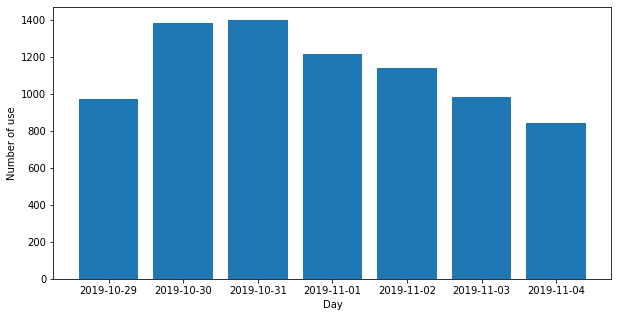

In [24]:
import matplotlib.pyplot as plt

print(result)
result_used = list()
result_distance = list()

for res in result:
    result_used.append(res.get("used"))
    result_distance.append(res.get("distance"))
    

x = days
y = result_used
plt.figure(figsize=(10,5))
plt.bar(x, y)
plt.ylabel("Number of use")
plt.xlabel("Day")
plt.title("")
#plt.xticks(np.arange(len(days)), [day[5:] for day in days])
plt.show()

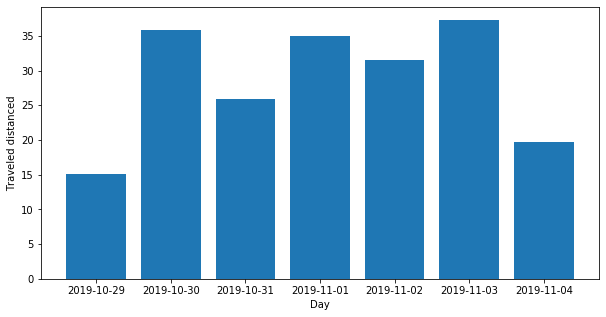

In [26]:
x = days
y = result_distance
plt.figure(figsize=(10,5))
plt.bar(x, y)
plt.ylabel("Traveled distanced")
plt.xlabel("Day")
plt.title("")
#plt.xticks(np.arange(len(days)), [day[5:] for day in days])
plt.show()